In [8]:
%pip install SciencePlots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

plt.style.use(['science', 'no-latex'])

# Try to import optional libraries
try:
    import seaborn as sns
    HAS_SEABORN = True
except ImportError:
    HAS_SEABORN = False
    print("Warning: seaborn not available, using matplotlib only")

try:
    from sklearn.preprocessing import MinMaxScaler
    HAS_SKLEARN = True
except ImportError:
    HAS_SKLEARN = False
    print("Warning: sklearn not available, radar chart normalization disabled")

try:
    from scipy import stats
    from itertools import combinations
    HAS_SCIPY = True
except ImportError:
    HAS_SCIPY = False
    print("Warning: scipy not available, statistical testing disabled")

# Try to import word frequency libraries
try:
    from wordfreq import word_frequency
    HAS_WORDFREQ = True
    print("‚úì wordfreq library available for frequency analysis")
except ImportError:
    HAS_WORDFREQ = False
    print("Warning: wordfreq not available, using alternative frequency estimation")

try:
    import nltk
    from nltk.corpus import brown
    HAS_NLTK = True
    print("‚úì NLTK available for frequency analysis")
except ImportError:
    HAS_NLTK = False
    print("Warning: NLTK not available")

# Set font for potential Chinese characters support
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# Set plot style with fallback
if HAS_SEABORN:
    try:
        sns.set_style("whitegrid")
        plt.style.use('seaborn-v0_8')
    except:
        try:
            plt.style.use('seaborn')
        except:
            plt.style.use('ggplot')
else:
    try:
        plt.style.use('ggplot')
    except:
        pass  # Use default style

# Set color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']


Note: you may need to restart the kernel to use updated packages.


OSError: 'science' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [19]:
# Âä†ËΩΩÊï∞ÊçÆÈõÜ
with open('data/dataset.json', 'r', encoding='utf-8') as f:
    dataset = json.load(f)

# ËΩ¨Êç¢‰∏∫DataFrame
dataset_df = pd.DataFrame(dataset)

# ÊèêÂèñconcreteness_score
dataset_df['concreteness_score'] = dataset_df['metadata'].apply(lambda x: x.get('concreteness_score'))

print(f"Êï∞ÊçÆÈõÜÊÄªËØçÊ±áÊï∞: {len(dataset_df)}")
print(f"ËØçÊÄßÂàÜÂ∏É: {dataset_df['part_of_speech'].value_counts().to_dict()}")
print(f"È¢ÜÂüüÂàÜÂ∏É: {dataset_df['category'].value_counts().to_dict()}")
print(f"ÊúâÊäΩË±°Á®ãÂ∫¶ËØÑÂàÜÁöÑËØçÊ±áÊï∞: {dataset_df['concreteness_score'].notna().sum()}")

dataset_df.head()


Êï∞ÊçÆÈõÜÊÄªËØçÊ±áÊï∞: 300
ËØçÊÄßÂàÜÂ∏É: {'noun': 256, 'adj': 32, 'verb': 12}
È¢ÜÂüüÂàÜÂ∏É: {'general': 100, 'chemistry': 50, 'cs': 50, 'finance': 50, 'philosophy': 50}
ÊúâÊäΩË±°Á®ãÂ∫¶ËØÑÂàÜÁöÑËØçÊ±áÊï∞: 189


target part_of_speech                                      taboo  \
0    crotonbug           noun   [common, croton, europe, german, states]   
1  entitlement           noun   [budget, claim, federal, granted, major]   
2        hinge           noun        [holds, joint, parts, strap, swing]   
3     cubiform            adj  [cuboid, shaped, cubical, cube, cubelike]   
4       mantle           noun    [mickey, symbol, cloak, place, younger]   

  category                                             senses  \
0  general  [{'name': 'german_cockroach.n.01', 'pos': 'n',...   
1  general  [{'name': 'entitlement.n.01', 'pos': 'n', 'def...   
2  general  [{'name': 'hinge.n.01', 'pos': 'n', 'definitio...   
3  general  [{'name': 'cubelike.s.01', 'pos': 's', 'defini...   
4  general  [{'name': 'mantle.n.01', 'pos': 'n', 'definiti...   

                                            metadata  concreteness_score  
0  {'sense_count': 1, 'concreteness_score': None,...                 NaN  
1  {'sense_count': 1, 'concreteness_score': 1.79,...                1.79  
2  {'sense_count': 3, 'concreteness_score': 4.57,...                4.57  
3  {'sense_count': 1, 'concreteness_score': None,...                 NaN  
4  {'sense_count': 10, 'concreteness_score': 4.57...                4.57

In [20]:
# Âä†ËΩΩÂÆûÈ™åÁªìÊûúÊï∞ÊçÆ
results_df = pd.read_csv('results/taboo_experiment_20250712_004918/complete_experiment_results.csv')

print(f"ÂÆûÈ™åÁªìÊûúÊÄªÊï∞: {len(results_df)}")
print(f"ÂèÇ‰∏éÂÆûÈ™åÁöÑÊ®°Âûã: {results_df['hinter_model'].unique().tolist()}")
print(f"ÊÄª‰ΩìÊàêÂäüÁéá: {results_df['success'].mean():.3f}")

# Clean model names for display
model_name_mapping = {
    'anthropic/claude-sonnet-4': 'Claude Sonnet 4',
    'openai/gpt-4o': 'GPT-4o',
    'google/gemini-2.5-pro': 'Gemini 2.5 Pro',
    'deepseek/deepseek-chat-v3-0324': 'DeepSeek Chat V3'
}

results_df['hinter_model_clean'] = results_df['hinter_model'].map(model_name_mapping)
results_df['guesser_model_clean'] = results_df['guesser_model'].map(model_name_mapping)

results_df.head()


ÂÆûÈ™åÁªìÊûúÊÄªÊï∞: 4800
ÂèÇ‰∏éÂÆûÈ™åÁöÑÊ®°Âûã: ['openai/gpt-4o', 'google/gemini-2.5-pro', 'deepseek/deepseek-chat-v3-0324', 'anthropic/claude-sonnet-4']
ÊÄª‰ΩìÊàêÂäüÁéá: 0.906


game_id  word_index   hinter_model  guesser_model  target_word category  \
0  gpt-4o_1           0  openai/gpt-4o  openai/gpt-4o    crotonbug  general   
1  gpt-4o_2           1  openai/gpt-4o  openai/gpt-4o  entitlement  general   
2  gpt-4o_3           2  openai/gpt-4o  openai/gpt-4o        hinge  general   
3  gpt-4o_4           3  openai/gpt-4o  openai/gpt-4o     cubiform  general   
4  gpt-4o_5           4  openai/gpt-4o  openai/gpt-4o       mantle  general   

                           taboo_words  success  turns_used  final_guess  ...  \
0   common|croton|europe|german|states    False           5       beetle  ...   
1   budget|claim|federal|granted|major     True           1  entitlement  ...   
2        holds|joint|parts|strap|swing     True           1        hinge  ...   
3  cuboid|shaped|cubical|cube|cubelike    False           5      cubical  ...   
4    mickey|symbol|cloak|place|younger     True           1       mantle  ...   

                                         all_guesses  \
0  Guesser: [GUESS] cockroach | Guesser: [GUESS] ...   
1                       Guesser: [GUESS] entitlement   
2                             Guesser: [GUESS] hinge   
3  Guesser: [GUESS] cube | Guesser: [GUESS] cuboi...   
4                            Guesser: [GUESS] mantle   

                                        conversation total_api_attempts  \
0  Hinter: [CLUE] This is an insect often found i...                 10   
1  Hinter: [CLUE] This is a term often used to de...                  2   
2  Hinter: [CLUE] This is a device that allows do...                  2   
3  Hinter: [CLUE] This is a geometric form with s...                 10   
4  Hinter: [CLUE] This is a part of the Earth loc...                  2   

   format_errors has_format_errors duration_seconds            timestamp  \
0            NaN             False             9.66  2025-07-12 00:49:27   
1            NaN             False             1.82  2025-07-12 00:49:29   
2            NaN             False             1.53  2025-07-12 00:49:31   
3            NaN             False            12.06  2025-07-12 00:49:44   
4            NaN             False             1.83  2025-07-12 00:49:46   

   error hinter_model_clean  guesser_model_clean  
0    NaN             GPT-4o               GPT-4o  
1    NaN             GPT-4o               GPT-4o  
2    NaN             GPT-4o               GPT-4o  
3    NaN             GPT-4o               GPT-4o  
4    NaN             GPT-4o               GPT-4o  

[5 rows x 25 columns]

In [21]:
# Merge dataset information with results
# ÈáçÊñ∞Ê∏ÖÁêÜÂíåÂêàÂπ∂Êï∞ÊçÆÔºåÁ°Æ‰øùÊ≤°ÊúâÂàóÂêçÂÜ≤Á™Å
print("Ê≠£Âú®ÈáçÊñ∞Âä†ËΩΩÂíåÂêàÂπ∂Êï∞ÊçÆ...")

# ÈáçÊñ∞Âä†ËΩΩÊï∞ÊçÆÈõÜ‰ª•Á°Æ‰øùÂπ≤ÂáÄÁöÑÁä∂ÊÄÅ
with open('data/dataset.json', 'r', encoding='utf-8') as f:
    dataset = json.load(f)
dataset_df = pd.DataFrame(dataset)

# ÊèêÂèñmetadata‰ø°ÊÅØ
dataset_df['concreteness_score'] = dataset_df['metadata'].apply(lambda x: x.get('concreteness_score') if x else None)
dataset_df['sense_count'] = dataset_df['metadata'].apply(lambda x: x.get('sense_count', 1) if x else 1)

# Âè™ÈÄâÊã©ÈúÄË¶ÅÁöÑÂàóÔºåÈÅøÂÖçcategoryÂàóÂÜ≤Á™ÅÔºàresults_dfÂ∑≤ÁªèÊúâcategoryÔºâ
dataset_info = dataset_df[['target', 'part_of_speech', 'concreteness_score', 'sense_count']].copy()
dataset_info = dataset_info.rename(columns={'target': 'target_word'})

# Ê∏ÖÁêÜÂêàÂπ∂
merged_df = results_df.merge(dataset_info, on='target_word', how='left')

# Á°Æ‰øùcategoryÂàóÂ≠òÂú®‰∏îÊ≠£Á°Æ
if 'category' not in merged_df.columns:
    if 'category_x' in merged_df.columns:
        merged_df['category'] = merged_df['category_x']
        merged_df = merged_df.drop(['category_x'], axis=1)
    elif 'category_y' in merged_df.columns:
        merged_df['category'] = merged_df['category_y']
        merged_df = merged_df.drop(['category_y'], axis=1)

# Ê∏ÖÁêÜ‰ªª‰ΩïÊÆãÁïôÁöÑÈáçÂ§çcategoryÂàó
cols_to_drop = [col for col in merged_df.columns if col in ['category_x', 'category_y']]
if cols_to_drop:
    merged_df = merged_df.drop(cols_to_drop, axis=1)

# Ê∑ªÂä†ËØçÈ¢ëÂàÜÊûê
def get_word_frequency(word):
    """Ëé∑ÂèñÂçïËØçÁöÑÈ¢ëÁéáËØÑÂàÜ"""
    word = word.lower()
    
    if HAS_WORDFREQ:
        # Use wordfreq library for accurate frequency
        freq = word_frequency(word, 'en')
        return freq if freq > 0 else 1e-8  # Avoid log(0)
    else:
        # Fallback: use word length as inverse frequency proxy
        # Longer words tend to be less frequent
        return 1.0 / (len(word) ** 1.5)

print("Ê≠£Âú®ËÆ°ÁÆóËØçÈ¢ë...")
merged_df['word_frequency'] = merged_df['target_word'].apply(get_word_frequency)

# Create frequency categories for easier analysis
merged_df['frequency_log'] = np.log10(merged_df['word_frequency'])
merged_df['frequency_category'] = pd.cut(
    merged_df['frequency_log'], 
    bins=5, 
    labels=['Very Rare', 'Rare', 'Uncommon', 'Common', 'Very Common']
)

print(f"ÂêàÂπ∂ÂêéÊï∞ÊçÆÈáè: {len(merged_df)}")
print(f"ÊàêÂäüÂåπÈÖçËØçÊ±á‰ø°ÊÅØÁöÑÊØî‰æã: {merged_df['part_of_speech'].notna().mean():.3f}")
print(f"ÂèØÁî®Âàó: {sorted(merged_df.columns.tolist())}")

# È™åËØÅÂÖ≥ÈîÆÂàóÊòØÂê¶Â≠òÂú®
required_cols = ['category', 'part_of_speech', 'sense_count', 'word_frequency', 'frequency_category']
missing_cols = [col for col in required_cols if col not in merged_df.columns]
if missing_cols:
    print(f"‚ö†Ô∏è  Áº∫Â∞ëÁöÑÂàó: {missing_cols}")
else:
    print("‚úÖ ÊâÄÊúâÂøÖÈúÄÁöÑÂàóÈÉΩÂ∑≤ÊàêÂäüÂàõÂª∫")

if 'category' in merged_df.columns:
    print(f"Á±ªÂà´ÂàÜÂ∏É: {merged_df['category'].value_counts().to_dict()}")
if 'word_frequency' in merged_df.columns:
    print(f"ËØçÈ¢ëËåÉÂõ¥: {merged_df['word_frequency'].min():.2e} - {merged_df['word_frequency'].max():.2e}")
if 'frequency_category' in merged_df.columns:
    print(f"ËØçÈ¢ëÁ±ªÂà´ÂàÜÂ∏É: {merged_df['frequency_category'].value_counts().to_dict()}")

merged_df.head()


Ê≠£Âú®ÈáçÊñ∞Âä†ËΩΩÂíåÂêàÂπ∂Êï∞ÊçÆ...
Ê≠£Âú®ËÆ°ÁÆóËØçÈ¢ë...
ÂêàÂπ∂ÂêéÊï∞ÊçÆÈáè: 4800
ÊàêÂäüÂåπÈÖçËØçÊ±á‰ø°ÊÅØÁöÑÊØî‰æã: 1.000
ÂèØÁî®Âàó: ['all_guesses', 'all_hints', 'category', 'concreteness_score', 'conversation', 'duration_seconds', 'error', 'failure_reason', 'final_guess', 'format_errors', 'frequency_category', 'frequency_log', 'game_id', 'guesser_model', 'guesser_model_clean', 'has_format_errors', 'has_taboo_violation', 'hinter_model', 'hinter_model_clean', 'part_of_speech', 'sense_count', 'success', 'taboo_violation_hint', 'taboo_violation_turn', 'taboo_words', 'target_word', 'timestamp', 'total_api_attempts', 'turns_used', 'word_frequency', 'word_index']
‚úÖ ÊâÄÊúâÂøÖÈúÄÁöÑÂàóÈÉΩÂ∑≤ÊàêÂäüÂàõÂª∫
Á±ªÂà´ÂàÜÂ∏É: {'general': 1600, 'chemistry': 800, 'cs': 800, 'finance': 800, 'philosophy': 800}
ËØçÈ¢ëËåÉÂõ¥: 1.00e-08 - 8.13e-04
ËØçÈ¢ëÁ±ªÂà´ÂàÜÂ∏É: {'Uncommon': 1312, 'Rare': 1152, 'Very Rare': 1072, 'Common': 1008, 'Very Common': 256}


game_id  word_index   hinter_model  guesser_model  target_word category  \
0  gpt-4o_1           0  openai/gpt-4o  openai/gpt-4o    crotonbug  general   
1  gpt-4o_2           1  openai/gpt-4o  openai/gpt-4o  entitlement  general   
2  gpt-4o_3           2  openai/gpt-4o  openai/gpt-4o        hinge  general   
3  gpt-4o_4           3  openai/gpt-4o  openai/gpt-4o     cubiform  general   
4  gpt-4o_5           4  openai/gpt-4o  openai/gpt-4o       mantle  general   

                           taboo_words  success  turns_used  final_guess  ...  \
0   common|croton|europe|german|states    False           5       beetle  ...   
1   budget|claim|federal|granted|major     True           1  entitlement  ...   
2        holds|joint|parts|strap|swing     True           1        hinge  ...   
3  cuboid|shaped|cubical|cube|cubelike    False           5      cubical  ...   
4    mickey|symbol|cloak|place|younger     True           1       mantle  ...   

             timestamp  error hinter_model_clean  guesser_model_clean  \
0  2025-07-12 00:49:27    NaN             GPT-4o               GPT-4o   
1  2025-07-12 00:49:29    NaN             GPT-4o               GPT-4o   
2  2025-07-12 00:49:31    NaN             GPT-4o               GPT-4o   
3  2025-07-12 00:49:44    NaN             GPT-4o               GPT-4o   
4  2025-07-12 00:49:46    NaN             GPT-4o               GPT-4o   

  part_of_speech concreteness_score sense_count  word_frequency frequency_log  \
0           noun                NaN           1    1.000000e-08     -8.000000   
1           noun               1.79           1    3.550000e-06     -5.449772   
2           noun               4.57           3    2.090000e-06     -5.679854   
3            adj                NaN           1    1.000000e-08     -8.000000   
4           noun               4.57          10    4.170000e-06     -5.379864   

   frequency_category  
0           Very Rare  
1            Uncommon  
2            Uncommon  
3           Very Rare  
4            Uncommon  

[5 rows x 31 columns]

Model Performance Overview:
                    Total Games  Successful Games  Success Rate  \
hinter_model_clean                                                
Gemini 2.5 Pro             1200              1160         0.967   
Claude Sonnet 4            1200              1151         0.959   
DeepSeek Chat V3           1200              1073         0.894   
GPT-4o                     1200               966         0.805   

                    Average Turns  Violation Rate  
hinter_model_clean                                 
Gemini 2.5 Pro              1.578           0.018  
Claude Sonnet 4             1.427           0.040  
DeepSeek Chat V3            2.002           0.038  
GPT-4o                      2.043           0.051  


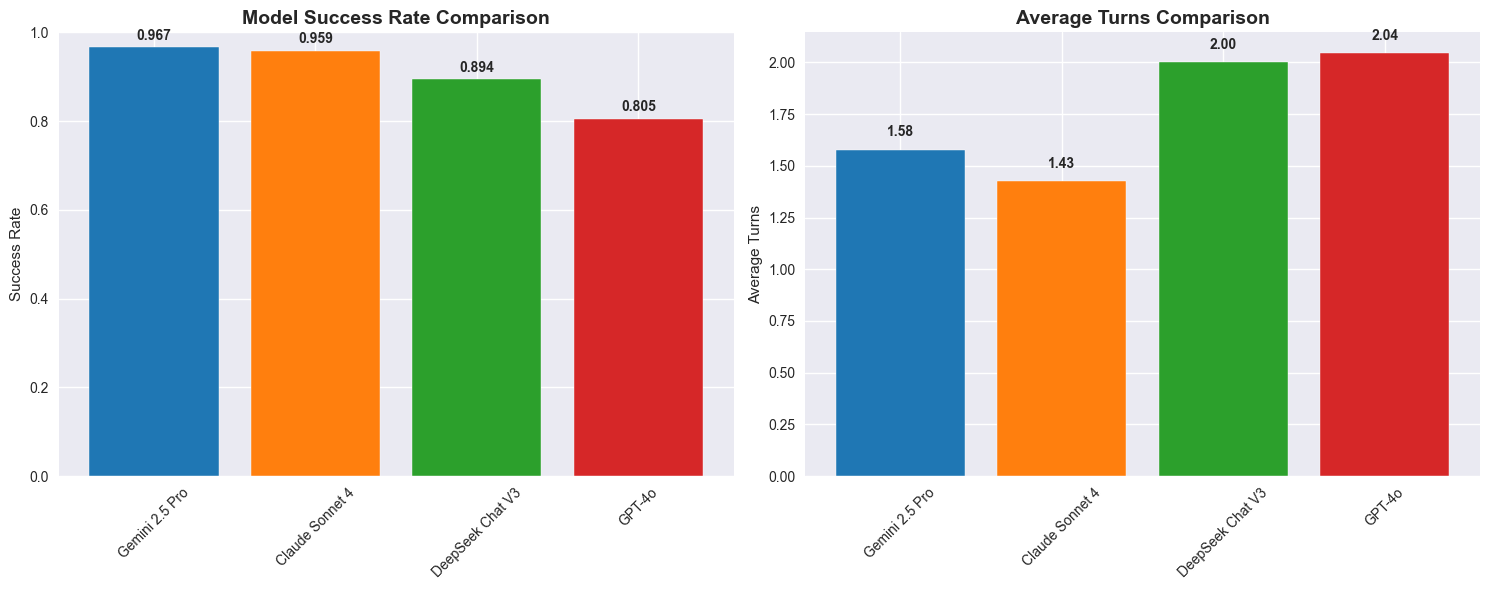

In [22]:
# Calculate overall success rates for each model
model_success = merged_df.groupby('hinter_model_clean').agg({
    'success': ['count', 'sum', 'mean'],
    'turns_used': 'mean',
    'has_taboo_violation': 'mean'
}).round(3)

model_success.columns = ['Total Games', 'Successful Games', 'Success Rate', 'Average Turns', 'Violation Rate']
model_success = model_success.sort_values('Success Rate', ascending=False)

print("Model Performance Overview:")
print(model_success)

# Plot model success rate comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Success rate bar chart
bars1 = ax1.bar(model_success.index, model_success['Success Rate'], color=colors[:len(model_success)])
ax1.set_title('Model Success Rate Comparison', fontsize=14, fontweight='bold')
ax1.set_ylabel('Success Rate')
ax1.set_ylim(0, 1)
ax1.tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

# Average turns comparison
bars2 = ax2.bar(model_success.index, model_success['Average Turns'], color=colors[:len(model_success)])
ax2.set_title('Average Turns Comparison', fontsize=14, fontweight='bold')
ax2.set_ylabel('Average Turns')
ax2.tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


ÂêÑÊ®°ÂûãÂú®‰∏çÂêåËΩÆÊï∞ÁöÑÊàêÂäüÁéáÂàÜÂ∏É:
                    Á¨¨1ËΩÆÊàêÂäüÁéá  Á¨¨2ËΩÆÊàêÂäüÁéá  Á¨¨3ËΩÆÊàêÂäüÁéá  Á¨¨4ËΩÆÊàêÂäüÁéá  Á¨¨5ËΩÆÊàêÂäüÁéá
hinter_model_clean                                        
Claude Sonnet 4      0.683   0.233   0.066   0.016   0.003
DeepSeek Chat V3     0.577   0.214   0.115   0.054   0.040
GPT-4o               0.659   0.204   0.080   0.041   0.016
Gemini 2.5 Pro       0.657   0.221   0.073   0.033   0.016

ÂêÑÊ®°ÂûãÁöÑÁ¥ØÁßØÊàêÂäüÁéá:
                    Ââç1ËΩÆÁ¥ØÁßØÊàêÂäüÁéá  Ââç2ËΩÆÁ¥ØÁßØÊàêÂäüÁéá  Ââç3ËΩÆÁ¥ØÁßØÊàêÂäüÁéá  Ââç4ËΩÆÁ¥ØÁßØÊàêÂäüÁéá  Ââç5ËΩÆÁ¥ØÁßØÊàêÂäüÁéá
hinter_model_clean                                                  
Claude Sonnet 4        0.683     0.916     0.982     0.997       1.0
DeepSeek Chat V3       0.577     0.791     0.906     0.960       1.0
GPT-4o                 0.659     0.863     0.943     0.984       1.0
Gemini 2.5 Pro         0.657     0.878     0.951     0.984       1.0


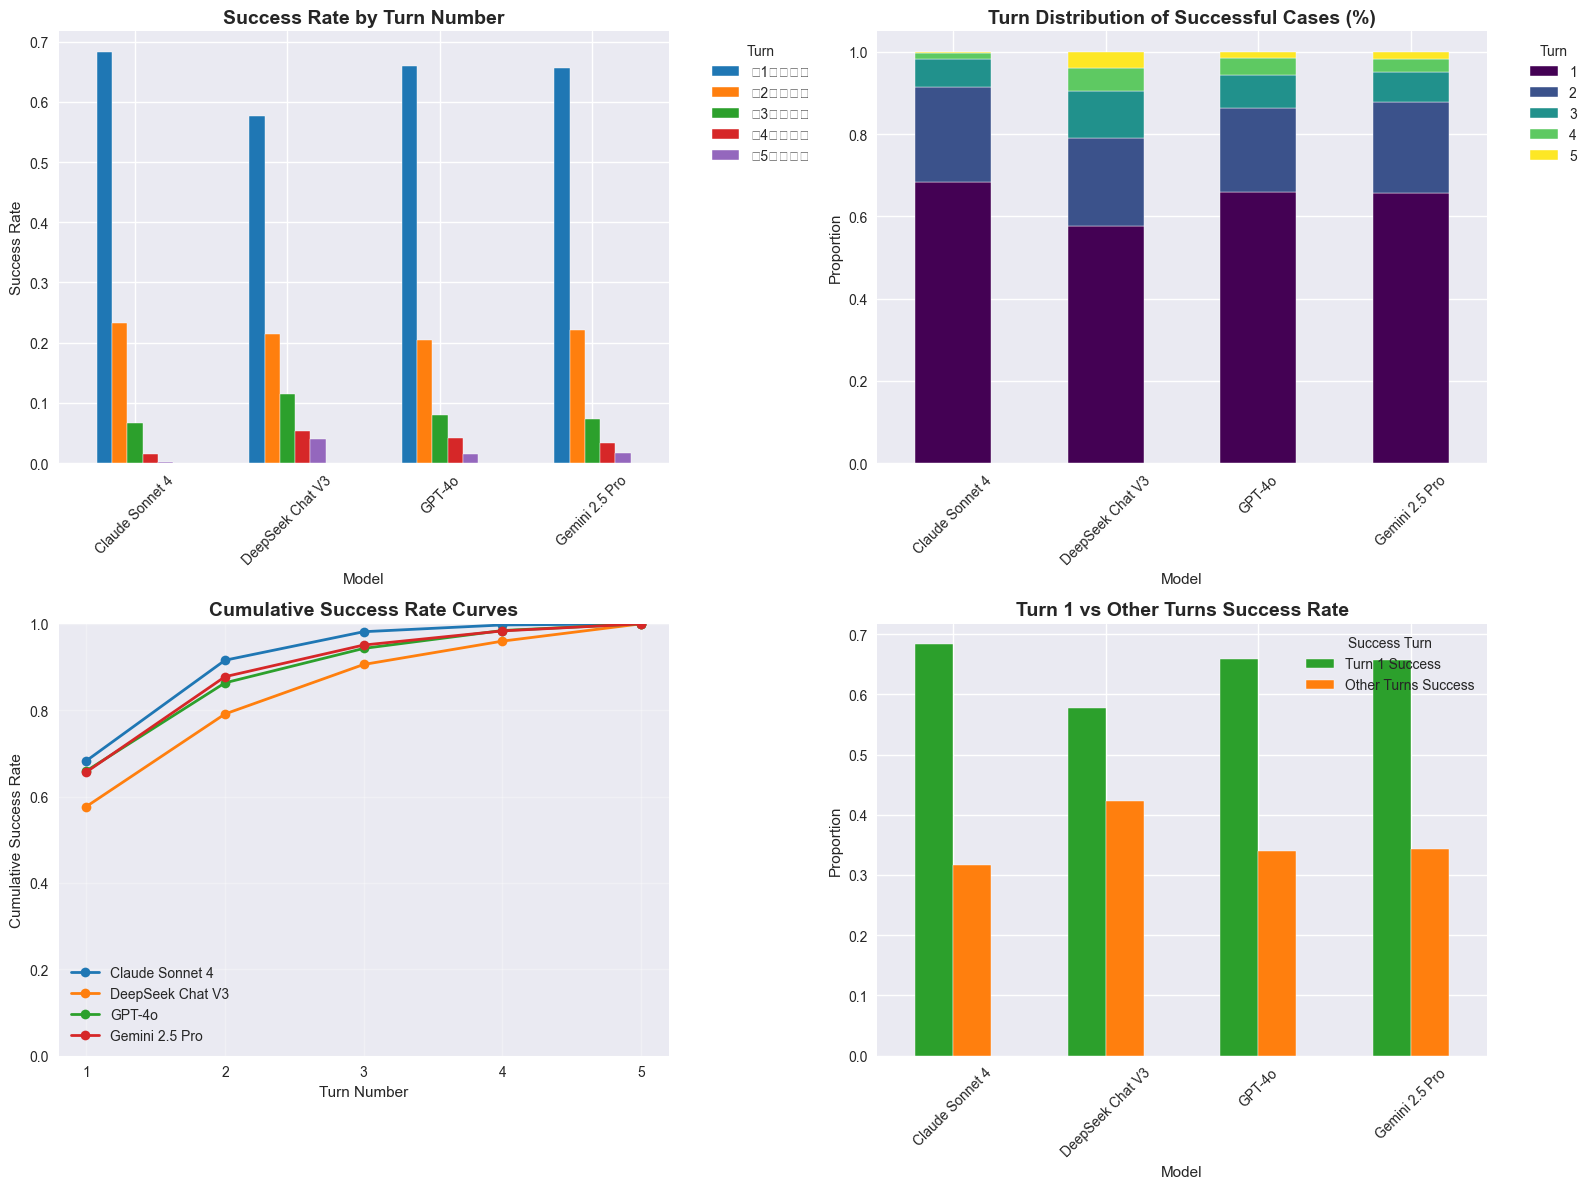


üìà ËΩÆÊï∞ÂàÜÊûêÊÄªÁªì:
  ‚Ä¢ ÊÄª‰ΩìÁ¨¨1ËΩÆÊàêÂäüÁéá: 64.4%
  ‚Ä¢ ÊÄª‰ΩìÂâç3ËΩÆÁ¥ØÁßØÊàêÂäüÁéá: 94.5%
  ‚Ä¢ Á¨¨1ËΩÆÊàêÂäüÁéáÊúÄÈ´òÁöÑÊ®°Âûã: Claude Sonnet 4 (68.3%)
  ‚Ä¢ Ââç3ËΩÆÁ¥ØÁßØÊàêÂäüÁéáÊúÄÈ´òÁöÑÊ®°Âûã: Claude Sonnet 4 (98.2%)


In [23]:
# ÂàÜÊûêÊàêÂäüÊ°à‰æãÁöÑËΩÆÊï∞ÂàÜÂ∏É
successful_games = merged_df[merged_df['success'] == True]

# ËÆ°ÁÆóÂêÑËΩÆÊàêÂäüÁöÑËØ¶ÁªÜÂàÜÂ∏É
turns_analysis = successful_games.groupby(['hinter_model_clean', 'turns_used']).size().unstack(fill_value=0)
turns_pct = turns_analysis.div(turns_analysis.sum(axis=1), axis=0)

# ËÆ°ÁÆóÂêÑËΩÆÊàêÂäüÁéáÔºàÂåÖÊã¨Á¨¨1ËΩÆ„ÄÅÁ¨¨2ËΩÆÁ≠âÔºâ
turn_success_rates = {}
for turn in range(1, 6):  # ÂàÜÊûêÂâç5ËΩÆ
    turn_rates = successful_games.groupby('hinter_model_clean').apply(
        lambda x: (x['turns_used'] == turn).sum() / len(x)
    )
    turn_success_rates[f'Á¨¨{turn}ËΩÆÊàêÂäüÁéá'] = turn_rates

turn_success_df = pd.DataFrame(turn_success_rates).fillna(0)
print("ÂêÑÊ®°ÂûãÂú®‰∏çÂêåËΩÆÊï∞ÁöÑÊàêÂäüÁéáÂàÜÂ∏É:")
print(turn_success_df.round(3))

# ËÆ°ÁÆóÁ¥ØÁßØÊàêÂäüÁéá
cumulative_success = {}
for turn in range(1, 6):
    cumulative_rates = successful_games.groupby('hinter_model_clean').apply(
        lambda x: (x['turns_used'] <= turn).sum() / len(x)
    )
    cumulative_success[f'Ââç{turn}ËΩÆÁ¥ØÁßØÊàêÂäüÁéá'] = cumulative_rates

cumulative_df = pd.DataFrame(cumulative_success).fillna(0)
print("\nÂêÑÊ®°ÂûãÁöÑÁ¥ØÁßØÊàêÂäüÁéá:")
print(cumulative_df.round(3))

# ÁªòÂà∂ËØ¶ÁªÜÁöÑËΩÆÊï∞ÂàÜÊûêÂõæ
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. ÂêÑËΩÆÊàêÂäüÁéáÂØπÊØî
turn_success_df.plot(kind='bar', ax=ax1, color=colors[:len(turn_success_df.columns)])
ax1.set_title('Success Rate by Turn Number', fontsize=14, fontweight='bold')
ax1.set_ylabel('Success Rate')
ax1.set_xlabel('Model')
ax1.legend(title='Turn', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.tick_params(axis='x', rotation=45)

# 2. Â†ÜÁßØÊü±Áä∂ÂõæÊòæÁ§∫ËΩÆÊï∞ÂàÜÂ∏É
turns_pct.plot(kind='bar', stacked=True, ax=ax2, colormap='viridis')
ax2.set_title('Turn Distribution of Successful Cases (%)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Proportion')
ax2.set_xlabel('Model')
ax2.legend(title='Turn', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.tick_params(axis='x', rotation=45)

# 3. Á¥ØÁßØÊàêÂäüÁéáÊõ≤Á∫ø
for i, model in enumerate(cumulative_df.index):
    turns = range(1, 6)
    rates = [cumulative_df.loc[model, f'Ââç{turn}ËΩÆÁ¥ØÁßØÊàêÂäüÁéá'] for turn in turns]
    ax3.plot(turns, rates, 'o-', linewidth=2, label=model, color=colors[i])

ax3.set_title('Cumulative Success Rate Curves', fontsize=14, fontweight='bold')
ax3.set_xlabel('Turn Number')
ax3.set_ylabel('Cumulative Success Rate')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_xticks(range(1, 6))
ax3.set_ylim(0, 1)

# 4. Á¨¨1ËΩÆvsÂÖ∂‰ªñËΩÆÊï∞ÊàêÂäüÁéáÂØπÊØî
first_turn_vs_others = pd.DataFrame({
    'Turn 1 Success': turn_success_df['Á¨¨1ËΩÆÊàêÂäüÁéá'],
    'Other Turns Success': 1 - turn_success_df['Á¨¨1ËΩÆÊàêÂäüÁéá']
})

first_turn_vs_others.plot(kind='bar', ax=ax4, color=['#2ca02c', '#ff7f0e'])
ax4.set_title('Turn 1 vs Other Turns Success Rate', fontsize=14, fontweight='bold')
ax4.set_ylabel('Proportion')
ax4.set_xlabel('Model')
ax4.legend(title='Success Turn')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# ËæìÂá∫ËØ¶ÁªÜÁªüËÆ°
print(f"\nüìà ËΩÆÊï∞ÂàÜÊûêÊÄªÁªì:")
print(f"  ‚Ä¢ ÊÄª‰ΩìÁ¨¨1ËΩÆÊàêÂäüÁéá: {turn_success_df['Á¨¨1ËΩÆÊàêÂäüÁéá'].mean():.1%}")
print(f"  ‚Ä¢ ÊÄª‰ΩìÂâç3ËΩÆÁ¥ØÁßØÊàêÂäüÁéá: {cumulative_df['Ââç3ËΩÆÁ¥ØÁßØÊàêÂäüÁéá'].mean():.1%}")
print(f"  ‚Ä¢ Á¨¨1ËΩÆÊàêÂäüÁéáÊúÄÈ´òÁöÑÊ®°Âûã: {turn_success_df['Á¨¨1ËΩÆÊàêÂäüÁéá'].idxmax()} ({turn_success_df['Á¨¨1ËΩÆÊàêÂäüÁéá'].max():.1%})")
print(f"  ‚Ä¢ Ââç3ËΩÆÁ¥ØÁßØÊàêÂäüÁéáÊúÄÈ´òÁöÑÊ®°Âûã: {cumulative_df['Ââç3ËΩÆÁ¥ØÁßØÊàêÂäüÁéá'].idxmax()} ({cumulative_df['Ââç3ËΩÆÁ¥ØÁßØÊàêÂäüÁéá'].max():.1%})")


ÊåâËØçÊÄßÁöÑÊàêÂäüÁéáÂàÜÊûê:
hinter_model_clean  Claude Sonnet 4  DeepSeek Chat V3  GPT-4o  Gemini 2.5 Pro
part_of_speech                                                               
adj                           0.953             0.703   0.625           0.961
noun                          0.958             0.919   0.839           0.966
verb                          1.000             0.875   0.562           1.000


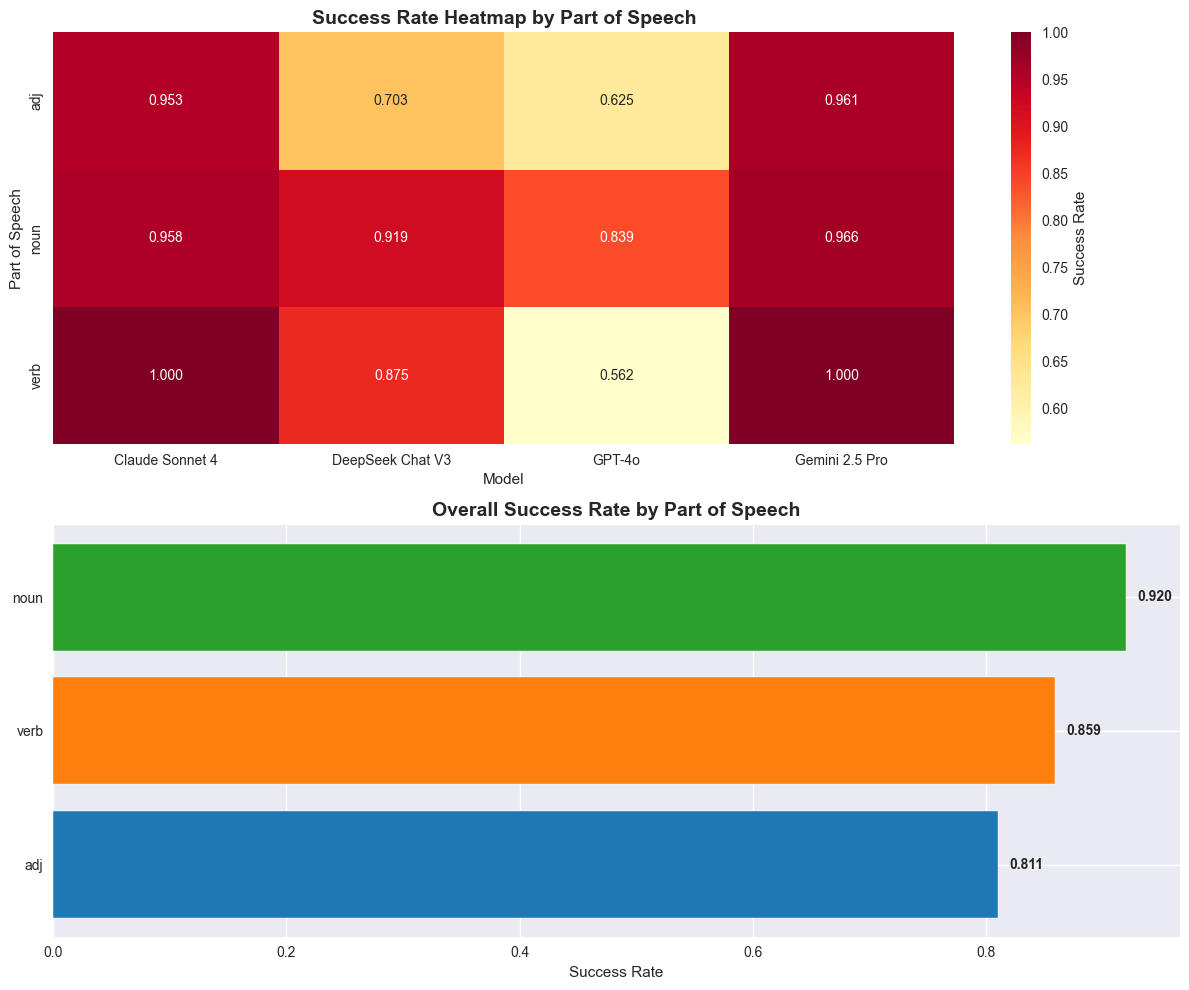

In [24]:
# ÊåâËØçÊÄßÂàÜÊûêÊàêÂäüÁéá
pos_success = merged_df.groupby(['part_of_speech', 'hinter_model_clean']).agg({
    'success': ['count', 'mean'],
    'turns_used': 'mean'
}).round(3)

pos_success.columns = ['Games', 'Success Rate', 'Average Turns']
pos_success = pos_success.reset_index()

print("ÊåâËØçÊÄßÁöÑÊàêÂäüÁéáÂàÜÊûê:")
pos_pivot = pos_success.pivot(index='part_of_speech', columns='hinter_model_clean', values='Success Rate')
print(pos_pivot.round(3))

# ÁªòÂà∂ËØçÊÄßÊàêÂäüÁéáÁÉ≠ÂäõÂõæ
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# ÁÉ≠ÂäõÂõæ
if HAS_SEABORN and not pos_pivot.empty:
    sns.heatmap(pos_pivot, annot=True, cmap='YlOrRd', ax=ax1, 
                cbar_kws={'label': 'Success Rate'}, fmt='.3f')
else:
    # Fallback to matplotlib heatmap
    if not pos_pivot.empty:
        im = ax1.imshow(pos_pivot.values, cmap='YlOrRd', aspect='auto')
        ax1.set_xticks(range(len(pos_pivot.columns)))
        ax1.set_yticks(range(len(pos_pivot.index)))
        ax1.set_xticklabels(pos_pivot.columns, rotation=45)
        ax1.set_yticklabels(pos_pivot.index)
        
        # Add text annotations
        for i in range(len(pos_pivot.index)):
            for j in range(len(pos_pivot.columns)):
                if not pd.isna(pos_pivot.iloc[i, j]):
                    ax1.text(j, i, f'{pos_pivot.iloc[i, j]:.3f}', 
                            ha='center', va='center', color='black')
        
        # Add colorbar
        plt.colorbar(im, ax=ax1, label='Success Rate')
    else:
        ax1.text(0.5, 0.5, 'No data available for heatmap', 
                ha='center', va='center', transform=ax1.transAxes)

ax1.set_title('Success Rate Heatmap by Part of Speech', fontsize=14, fontweight='bold')
ax1.set_xlabel('Model')
ax1.set_ylabel('Part of Speech')

# ËØçÊÄßÊï¥‰ΩìÊàêÂäüÁéá
overall_pos = merged_df.groupby('part_of_speech')['success'].mean().sort_values(ascending=True)
bars = ax2.barh(range(len(overall_pos)), overall_pos.values, color=colors[:len(overall_pos)])
ax2.set_yticks(range(len(overall_pos)))
ax2.set_yticklabels(overall_pos.index)
ax2.set_title('Overall Success Rate by Part of Speech', fontsize=14, fontweight='bold')
ax2.set_xlabel('Success Rate')

# Ê∑ªÂä†Êï∞ÂÄºÊ†áÁ≠æ
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax2.text(width + 0.01, bar.get_y() + bar.get_height()/2.,
             f'{width:.3f}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


Sense count ÂàÜÂ∏É:
sense_count
1     128
2      58
3      37
4      19
5      13
6      11
7      11
8       3
9       4
10      3
11      3
12      4
14      1
15      1
17      1
20      1
23      2
Name: count, dtype: int64

ÊàêÂäüÂåπÈÖçsense count‰ø°ÊÅØÁöÑÊØî‰æã: 1.000

ÊåâSense CountÁöÑÊàêÂäüÁéáÂàÜÊûê:
hinter_model_clean  Claude Sonnet 4  DeepSeek Chat V3  GPT-4o  Gemini 2.5 Pro
sense_count                                                                  
1                             0.938             0.855   0.711           0.953
2                             0.996             0.944   0.845           0.987
3                             1.000             0.912   0.905           0.993
4                             1.000             1.000   0.934           1.000
5                             0.904             0.962   0.904           0.981
6                             0.932             0.977   0.977           1.000
7                             1.000             0.750   0.705     

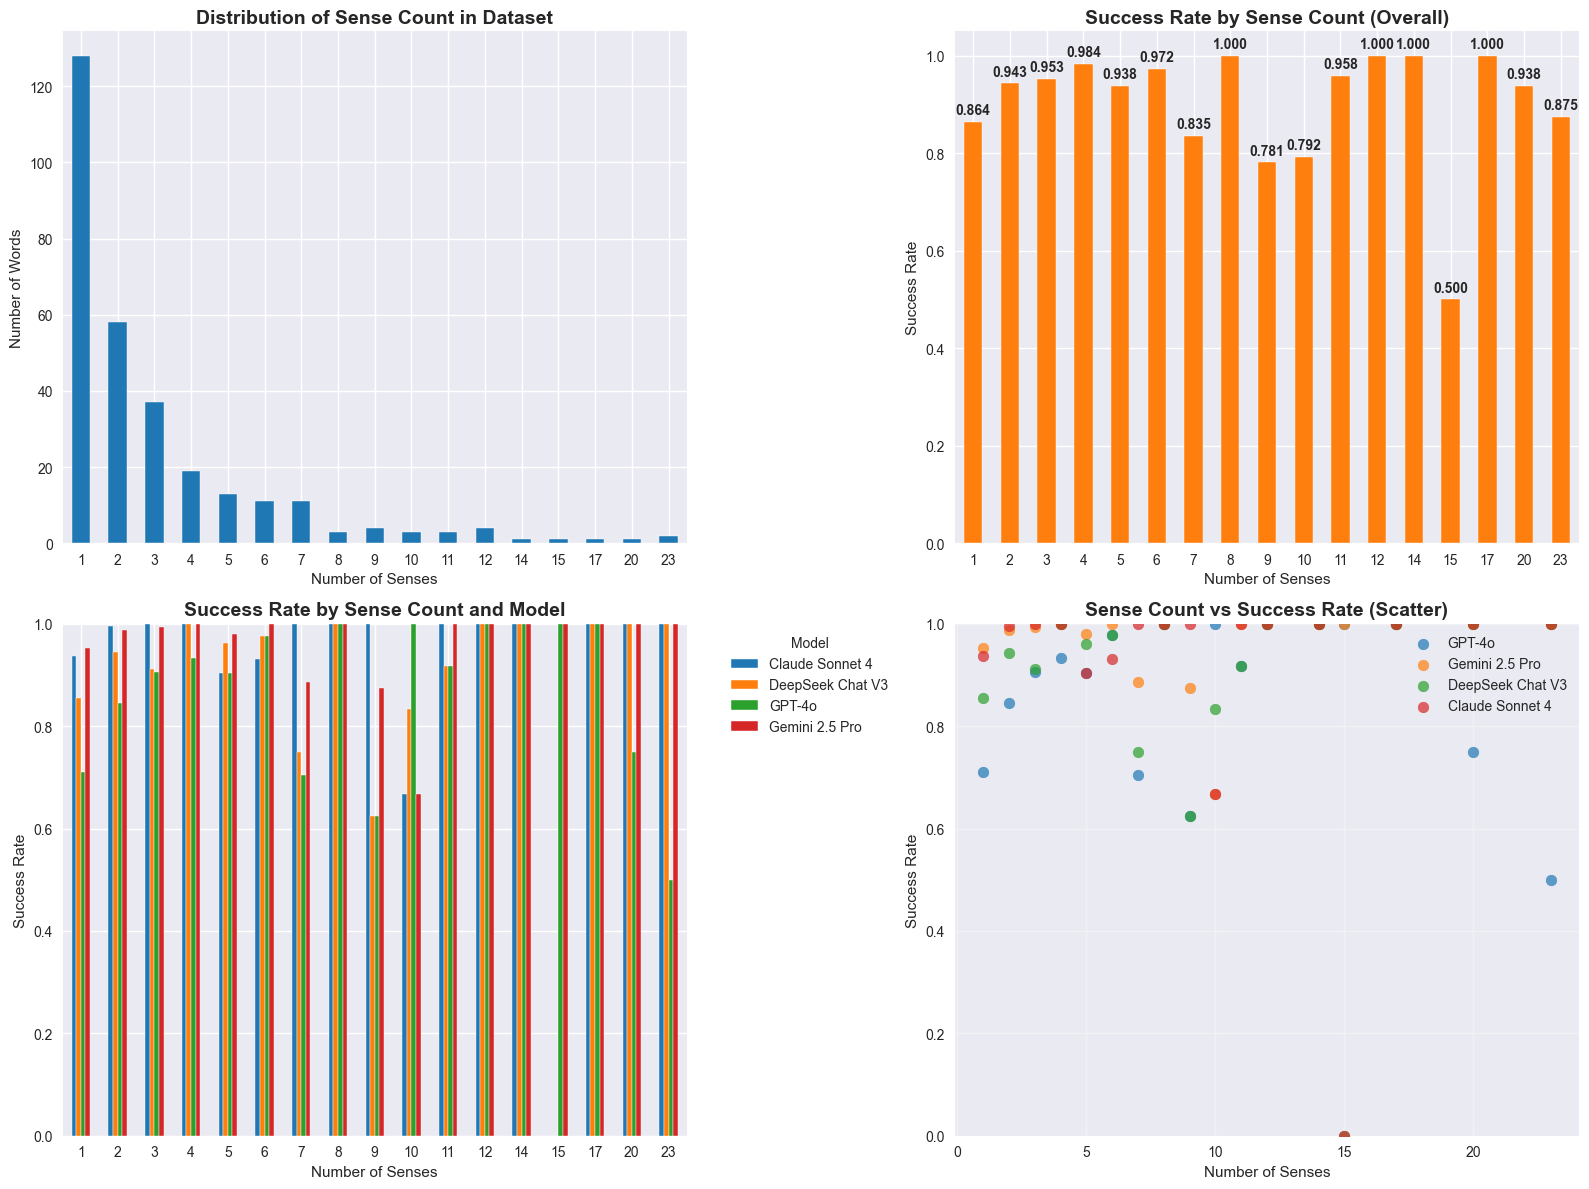


üìä Sense Count‰∏éÊàêÂäüÁéáÁöÑÁõ∏ÂÖ≥ÊÄß: 0.0250

üîç ËØ¶ÁªÜÂàÜÊûê:
  ‚Ä¢ Sense Count 1: 86.4% ÊàêÂäüÁéá (2048 Â±ÄÊ∏∏Êàè, Âπ≥Âùá 1.8 ËΩÆ)
  ‚Ä¢ Sense Count 2: 94.3% ÊàêÂäüÁéá (928 Â±ÄÊ∏∏Êàè, Âπ≥Âùá 1.6 ËΩÆ)
  ‚Ä¢ Sense Count 3: 95.3% ÊàêÂäüÁéá (592 Â±ÄÊ∏∏Êàè, Âπ≥Âùá 1.3 ËΩÆ)
  ‚Ä¢ Sense Count 4: 98.4% ÊàêÂäüÁéá (304 Â±ÄÊ∏∏Êàè, Âπ≥Âùá 1.2 ËΩÆ)
  ‚Ä¢ Sense Count 5: 93.8% ÊàêÂäüÁéá (208 Â±ÄÊ∏∏Êàè, Âπ≥Âùá 1.3 ËΩÆ)
  ‚Ä¢ Sense Count 6: 97.2% ÊàêÂäüÁéá (176 Â±ÄÊ∏∏Êàè, Âπ≥Âùá 1.3 ËΩÆ)
  ‚Ä¢ Sense Count 7: 83.5% ÊàêÂäüÁéá (176 Â±ÄÊ∏∏Êàè, Âπ≥Âùá 1.4 ËΩÆ)
  ‚Ä¢ Sense Count 8: 100.0% ÊàêÂäüÁéá (48 Â±ÄÊ∏∏Êàè, Âπ≥Âùá 1.2 ËΩÆ)
  ‚Ä¢ Sense Count 9: 78.1% ÊàêÂäüÁéá (64 Â±ÄÊ∏∏Êàè, Âπ≥Âùá 1.5 ËΩÆ)
  ‚Ä¢ Sense Count 10: 79.2% ÊàêÂäüÁéá (48 Â±ÄÊ∏∏Êàè, Âπ≥Âùá 1.2 ËΩÆ)
  ‚Ä¢ Sense Count 11: 95.8% ÊàêÂäüÁéá (48 Â±ÄÊ∏∏Êàè, Âπ≥Âùá 1.2 ËΩÆ)
  ‚Ä¢ Sense Count 12: 100.0% ÊàêÂäüÁéá (64 Â±ÄÊ∏∏Êàè, Âπ≥Âùá 1.1 ËΩÆ)
  ‚Ä¢ Sense Count 14: 100.0% ÊàêÂäüÁéá (16 Â±ÄÊ∏∏Êàè, Âπ≥Âùá 1.0 ËΩÆ)
  ‚Ä¢ Sense Count 15: 50.0% Êàê

In [25]:
# ÂàÜÊûêsense countÂØπÊàêÂäüÁéáÁöÑÂΩ±Âìç
# È¶ñÂÖàÊèêÂèñsense count‰ø°ÊÅØ
dataset_df['sense_count'] = dataset_df['metadata'].apply(lambda x: x.get('sense_count', 1))

print(f"Sense count ÂàÜÂ∏É:")
sense_count_dist = dataset_df['sense_count'].value_counts().sort_index()
print(sense_count_dist)

# Â∞Üsense countÊï∞ÊçÆÂêàÂπ∂Âà∞ÂÆûÈ™åÁªìÊûú‰∏≠
merged_df['sense_count'] = merged_df['target_word'].map(
    dataset_df.set_index('target')['sense_count']
)

print(f"\nÊàêÂäüÂåπÈÖçsense count‰ø°ÊÅØÁöÑÊØî‰æã: {merged_df['sense_count'].notna().mean():.3f}")

# Êåâsense countÂàÜÊûêÊàêÂäüÁéá
sense_success = merged_df.groupby(['sense_count', 'hinter_model_clean']).agg({
    'success': ['count', 'mean'],
    'turns_used': 'mean'
}).round(3)

sense_success.columns = ['Games', 'Success Rate', 'Average Turns']
sense_success = sense_success.reset_index()

print(f"\nÊåâSense CountÁöÑÊàêÂäüÁéáÂàÜÊûê:")
sense_pivot = sense_success.pivot(index='sense_count', columns='hinter_model_clean', values='Success Rate')
print(sense_pivot.round(3))

# Êï¥‰Ωìsense countÂØπÊàêÂäüÁéáÁöÑÂΩ±Âìç
overall_sense = merged_df.groupby('sense_count').agg({
    'success': ['count', 'mean'],
    'turns_used': 'mean'
}).round(3)
overall_sense.columns = ['Total Games', 'Success Rate', 'Average Turns']

print(f"\nÊï¥‰ΩìSense CountÂΩ±Âìç:")
print(overall_sense)

# ÁªòÂà∂sense countÂàÜÊûêÂõæ
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Sense countÂàÜÂ∏É
sense_count_dist.plot(kind='bar', ax=ax1, color=colors[0])
ax1.set_title('Distribution of Sense Count in Dataset', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Senses')
ax1.set_ylabel('Number of Words')
ax1.tick_params(axis='x', rotation=0)

# 2. Sense count vs ÊàêÂäüÁéáÔºàÊï¥‰ΩìÔºâ
overall_sense['Success Rate'].plot(kind='bar', ax=ax2, color=colors[1])
ax2.set_title('Success Rate by Sense Count (Overall)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Senses')
ax2.set_ylabel('Success Rate')
ax2.tick_params(axis='x', rotation=0)

# Ê∑ªÂä†Êï∞ÂÄºÊ†áÁ≠æ
for i, (idx, val) in enumerate(overall_sense['Success Rate'].items()):
    ax2.text(i, val + 0.01, f'{val:.3f}', ha='center', va='bottom', fontweight='bold')

# 3. ÂêÑÊ®°ÂûãÂú®‰∏çÂêåsense countÁöÑË°®Áé∞
if not sense_pivot.empty:
    sense_pivot.plot(kind='bar', ax=ax3, color=colors[:len(sense_pivot.columns)])
    ax3.set_title('Success Rate by Sense Count and Model', fontsize=14, fontweight='bold')
    ax3.set_ylabel('Success Rate')
    ax3.set_xlabel('Number of Senses')
    ax3.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax3.tick_params(axis='x', rotation=0)
    ax3.set_ylim(0, 1)

# 4. Sense count‰∏éÊàêÂäüÁéáÁöÑÂÖ≥Á≥ªÊï£ÁÇπÂõæ
for i, model in enumerate(merged_df['hinter_model_clean'].unique()):
    model_data = merged_df[merged_df['hinter_model_clean'] == model]
    success_by_sense = model_data.groupby('sense_count')['success'].mean()
    ax4.scatter(success_by_sense.index, success_by_sense.values, 
               label=model, color=colors[i], alpha=0.7, s=60)

ax4.set_title('Sense Count vs Success Rate (Scatter)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Number of Senses')
ax4.set_ylabel('Success Rate')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.set_ylim(0, 1)

plt.tight_layout()
plt.show()

# ËÆ°ÁÆóÁõ∏ÂÖ≥ÊÄß
if len(merged_df['sense_count'].dropna()) > 0:
    correlation = merged_df[['sense_count', 'success']].corr().iloc[0, 1]
    print(f"\nüìä Sense Count‰∏éÊàêÂäüÁéáÁöÑÁõ∏ÂÖ≥ÊÄß: {correlation:.4f}")
    
    # Êåâsense countÂàÜÁªÑÁªüËÆ°
    print(f"\nüîç ËØ¶ÁªÜÂàÜÊûê:")
    for sense_count in sorted(merged_df['sense_count'].dropna().unique()):
        data = merged_df[merged_df['sense_count'] == sense_count]
        success_rate = data['success'].mean()
        total_games = len(data)
        avg_turns = data[data['success']]['turns_used'].mean() if data['success'].any() else 0
        print(f"  ‚Ä¢ Sense Count {sense_count}: {success_rate:.1%} ÊàêÂäüÁéá "
              f"({total_games} Â±ÄÊ∏∏Êàè, Âπ≥Âùá {avg_turns:.1f} ËΩÆ)")
              
    # ËØÜÂà´Ë∂ãÂäø
    if correlation > 0.1:
        trend = "ËØç‰πâË∂äÂ§öÔºåÊàêÂäüÁéáË∂äÈ´ò"
    elif correlation < -0.1:
        trend = "ËØç‰πâË∂äÂ§öÔºåÊàêÂäüÁéáË∂ä‰Ωé"
    else:
        trend = "ËØç‰πâÊï∞Èáè‰∏éÊàêÂäüÁéáÊó†ÊòéÊòæÂÖ≥Á≥ª"
    
    print(f"\nüí° Ë∂ãÂäøÂàÜÊûê: {trend} (Áõ∏ÂÖ≥Á≥ªÊï∞: {correlation:.4f})")


ÊúâÊäΩË±°Á®ãÂ∫¶ËØÑÂàÜÁöÑÂÆûÈ™åÊï∞ÊçÆ: 3024 Êù°
ÊåâÊäΩË±°Á®ãÂ∫¶ÁöÑÊàêÂäüÁéáÂàÜÊûê:
hinter_model_clean  Claude Sonnet 4  DeepSeek Chat V3  GPT-4o  Gemini 2.5 Pro
concreteness_level                                                           
High Abstract(0-2)            0.944             0.965   0.903           0.986
Mid Abstract(2-3)             0.980             0.887   0.823           0.950
Mid Concrete(3-4)             0.995             0.949   0.903           0.991
High Concrete(4-5)            0.917             0.927   0.990           0.958


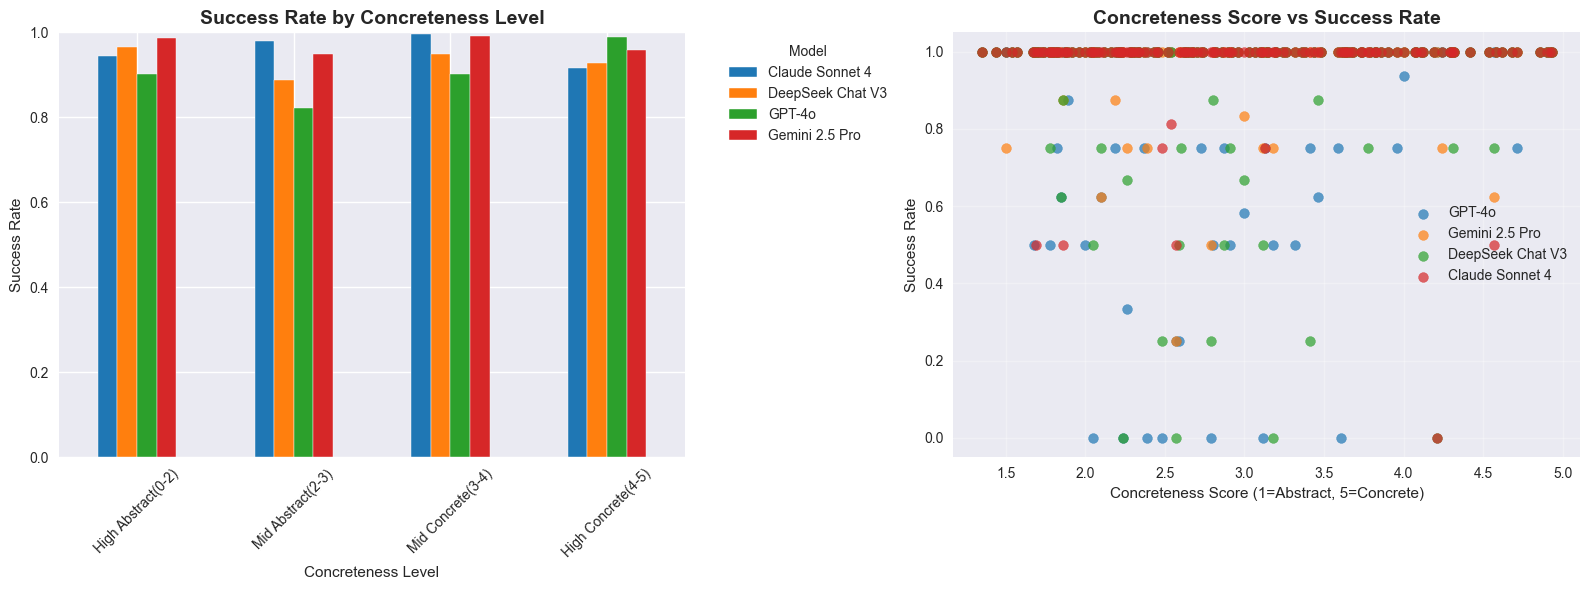

In [26]:
# ËøáÊª§ÊúâÊäΩË±°Á®ãÂ∫¶ËØÑÂàÜÁöÑÊï∞ÊçÆ
concrete_df = merged_df[merged_df['concreteness_score'].notna()].copy()

print(f"ÊúâÊäΩË±°Á®ãÂ∫¶ËØÑÂàÜÁöÑÂÆûÈ™åÊï∞ÊçÆ: {len(concrete_df)} Êù°")

# Â∞ÜÊäΩË±°Á®ãÂ∫¶ÂàÜ‰∏∫Âá†‰∏™Âå∫Èó¥
concrete_df['concreteness_level'] = pd.cut(concrete_df['concreteness_score'], 
                                           bins=[0, 2, 3, 4, 5], 
                                           labels=['High Abstract(0-2)', 'Mid Abstract(2-3)', 'Mid Concrete(3-4)', 'High Concrete(4-5)'])

# ÊåâÊäΩË±°Á®ãÂ∫¶ÂàÜÊûê
concrete_success = concrete_df.groupby(['concreteness_level', 'hinter_model_clean']).agg({
    'success': ['count', 'mean'],
    'turns_used': 'mean'
}).round(3)

concrete_success.columns = ['Games', 'Success Rate', 'Average Turns']
concrete_success = concrete_success.reset_index()

print("ÊåâÊäΩË±°Á®ãÂ∫¶ÁöÑÊàêÂäüÁéáÂàÜÊûê:")
concrete_pivot = concrete_success.pivot(index='concreteness_level', columns='hinter_model_clean', values='Success Rate')
print(concrete_pivot.round(3))

# ÁªòÂà∂ÊäΩË±°Á®ãÂ∫¶ÂàÜÊûêÂõæ
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# ‰∏çÂêåÊ®°ÂûãÂú®ÂêÑÊäΩË±°Á®ãÂ∫¶ÁöÑË°®Áé∞
concrete_pivot.plot(kind='bar', ax=ax1, color=colors[:len(concrete_pivot.columns)])
ax1.set_title('Success Rate by Concreteness Level', fontsize=14, fontweight='bold')
ax1.set_ylabel('Success Rate')
ax1.set_xlabel('Concreteness Level')
ax1.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(0, 1)

# ÊäΩË±°Á®ãÂ∫¶‰∏éÊàêÂäüÁéáÁöÑÂÖ≥Á≥ªÊï£ÁÇπÂõæ
for i, model in enumerate(concrete_df['hinter_model_clean'].unique()):
    model_data = concrete_df[concrete_df['hinter_model_clean'] == model]
    success_by_concrete = model_data.groupby('concreteness_score')['success'].mean()
    ax2.scatter(success_by_concrete.index, success_by_concrete.values, 
               label=model, color=colors[i], alpha=0.7, s=50)

ax2.set_title('Concreteness Score vs Success Rate', fontsize=14, fontweight='bold')
ax2.set_xlabel('Concreteness Score (1=Abstract, 5=Concrete)')
ax2.set_ylabel('Success Rate')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


ÊåâÈ¢ÜÂüüÁöÑÊàêÂäüÁéáÂàÜÊûê:
hinter_model_clean  Claude Sonnet 4  DeepSeek Chat V3  GPT-4o  Gemini 2.5 Pro
category                                                                     
chemistry                     0.975             0.885   0.770           0.960
cs                            0.970             0.990   0.935           0.990
finance                       0.980             1.000   0.955           0.995
general                       0.925             0.785   0.660           0.950
philosophy                    0.980             0.920   0.850           0.955

Âä†ËΩΩ‰∫Ü5‰∏™‰∏ì‰∏öÈ¢ÜÂüüÊï∞ÊçÆÈõÜ
cs: 1000 ‰∏™ËØçÊ±á
biology: 1000 ‰∏™ËØçÊ±á
law: 1000 ‰∏™ËØçÊ±á
literature: 1000 ‰∏™ËØçÊ±á
medical: 1000 ‰∏™ËØçÊ±á


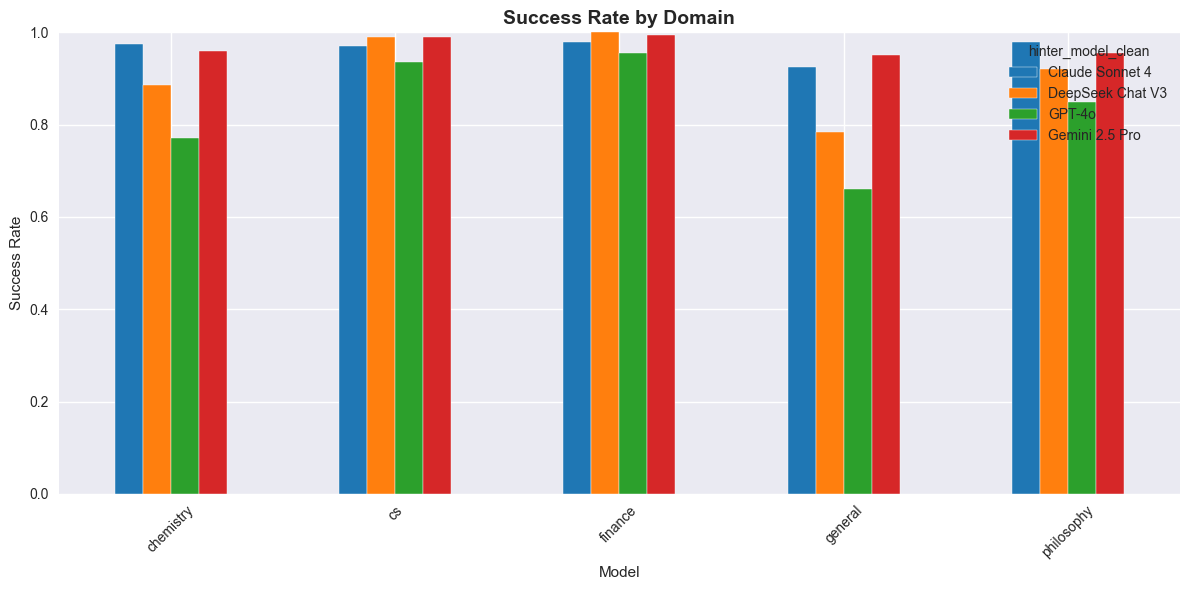

In [27]:
# ÊåâÈ¢ÜÂüüÂàÜÊûêÊàêÂäüÁéá
category_success = merged_df.groupby(['category', 'hinter_model_clean']).agg({
    'success': ['count', 'mean'],
    'turns_used': 'mean'
}).round(3)

category_success.columns = ['Games', 'Success Rate', 'Average Turns']
category_success = category_success.reset_index()

print("ÊåâÈ¢ÜÂüüÁöÑÊàêÂäüÁéáÂàÜÊûê:")
category_pivot = category_success.pivot(index='category', columns='hinter_model_clean', values='Success Rate')
print(category_pivot.round(3))

# Â¶ÇÊûúÂè™ÊúâgeneralÈ¢ÜÂüüÔºåÂä†ËΩΩ‰∏ì‰∏öÈ¢ÜÂüüÊï∞ÊçÆËøõË°åË°•ÂÖÖÂàÜÊûê
try:
    # Âä†ËΩΩ‰∏ì‰∏öÈ¢ÜÂüüÊï∞ÊçÆÈõÜ
    domain_datasets = {}
    domains = ['cs', 'biology', 'law', 'literature', 'medical']
    
    for domain in domains:
        try:
            with open(f'hpc_taboo/data/{domain}_wordnet_dataset.json', 'r') as f:
                domain_datasets[domain] = json.load(f)
        except FileNotFoundError:
            print(f"Êú™ÊâæÂà∞{domain}Êï∞ÊçÆÈõÜ")
    
    print(f"\nÂä†ËΩΩ‰∫Ü{len(domain_datasets)}‰∏™‰∏ì‰∏öÈ¢ÜÂüüÊï∞ÊçÆÈõÜ")
    for domain, data in domain_datasets.items():
        print(f"{domain}: {len(data)} ‰∏™ËØçÊ±á")
        
except Exception as e:
    print(f"Âä†ËΩΩ‰∏ì‰∏öÈ¢ÜÂüüÊï∞ÊçÆÊó∂Âá∫Èîô: {e}")

# ÁªòÂà∂È¢ÜÂüüÂàÜÊûêÂõæ
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

if len(category_pivot) > 1:
    category_pivot.plot(kind='bar', ax=ax, color=colors[:len(category_pivot.columns)])
    ax.set_title('Success Rate by Domain', fontsize=14, fontweight='bold')
else:
    # Â¶ÇÊûúÂè™ÊúâgeneralÈ¢ÜÂüüÔºåÊòæÁ§∫Êï¥‰ΩìÂàÜÂ∏É
    overall_category = merged_df.groupby('hinter_model_clean')['success'].mean()
    bars = ax.bar(overall_category.index, overall_category.values, color=colors[:len(overall_category)])
    ax.set_title('Success Rate in General Domain', fontsize=14, fontweight='bold')
    
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                 f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

ax.set_ylabel('Success Rate')
ax.set_xlabel('Model')
ax.tick_params(axis='x', rotation=45)
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()


Ê®°ÂûãÁªºÂêàÊÄßËÉΩÊåáÊ†á:
                    Success Rate  Efficiency  Rule Compliance  Turn 1 Success
hinter_model_clean                                                           
Claude Sonnet 4            0.959       0.703            0.960        0.682884
DeepSeek Chat V3           0.894       0.566            0.962        0.576887
GPT-4o                     0.805       0.645            0.949        0.659420
Gemini 2.5 Pro             0.967       0.653            0.982        0.656897


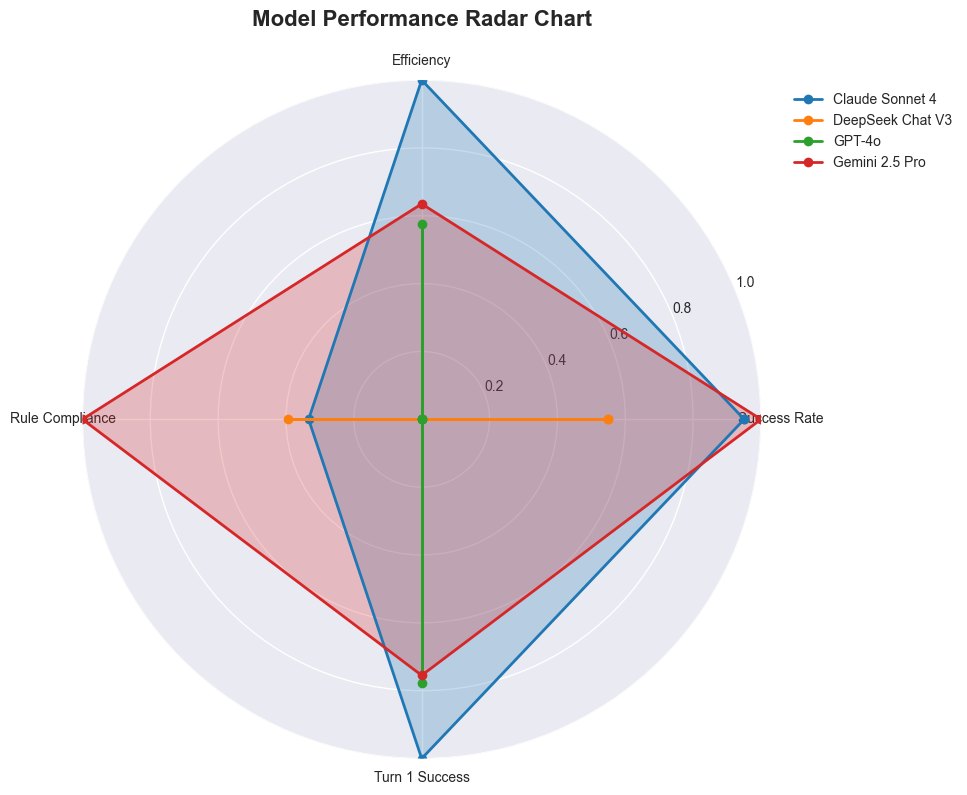

In [28]:
# ÂàõÂª∫ÁªºÂêàÊÄßËÉΩÂØπÊØîÈõ∑ËææÂõæ
from math import pi

# ËÆ°ÁÆóÂêÑÊ®°ÂûãÁöÑÂ§öÁª¥ÊÄßËÉΩÊåáÊ†á
model_metrics = merged_df.groupby('hinter_model_clean').agg({
    'success': 'mean',
    'turns_used': lambda x: 1/(x[merged_df.loc[x.index, 'success']].mean()),  # ÊïàÁéáÊåáÊ†áÔºàËΩÆÊï∞Ë∂äÂ∞ëË∂äÂ•ΩÔºâ
    'has_taboo_violation': lambda x: 1-x.mean()  # ËßÑÂàôÈÅµÂÆàÊåáÊ†á
}).round(3)

# Ê∑ªÂä†Á¨¨1ËΩÆÊàêÂäüÁéá
first_success_rate = merged_df[merged_df['success'] == True].groupby('hinter_model_clean').apply(
    lambda x: (x['turns_used'] == 1).sum() / len(x)
)
model_metrics['Á¨¨1ËΩÆÊàêÂäüÁéá'] = first_success_rate

model_metrics.columns = ['Success Rate', 'Efficiency', 'Rule Compliance', 'Turn 1 Success']

# Ê†áÂáÜÂåñÊåáÊ†áÂà∞0-1ËåÉÂõ¥
if HAS_SKLEARN:
    scaler = MinMaxScaler()
    model_metrics_scaled = pd.DataFrame(
        scaler.fit_transform(model_metrics), 
        index=model_metrics.index, 
        columns=model_metrics.columns
    )
else:
    # Manual normalization fallback
    model_metrics_scaled = model_metrics.copy()
    for col in model_metrics.columns:
        col_min = model_metrics[col].min()
        col_max = model_metrics[col].max()
        if col_max > col_min:
            model_metrics_scaled[col] = (model_metrics[col] - col_min) / (col_max - col_min)
        else:
            model_metrics_scaled[col] = 0.5  # If all values are the same

print("Ê®°ÂûãÁªºÂêàÊÄßËÉΩÊåáÊ†á:")
print(model_metrics)

# ÁªòÂà∂Èõ∑ËææÂõæ
fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw=dict(projection='polar'))

angles = [n / float(len(model_metrics.columns)) * 2 * pi for n in range(len(model_metrics.columns))]
angles += angles[:1]  # Èó≠ÂêàÂõæÂΩ¢

for i, (model, values) in enumerate(model_metrics_scaled.iterrows()):
    values_list = values.tolist()
    values_list += values_list[:1]  # Èó≠ÂêàÂõæÂΩ¢
    
    ax.plot(angles, values_list, 'o-', linewidth=2, label=model, color=colors[i])
    ax.fill(angles, values_list, alpha=0.25, color=colors[i])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(model_metrics.columns)
ax.set_ylim(0, 1)
ax.set_title('Model Performance Radar Chart', fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
ax.grid(True)

plt.tight_layout()
plt.show()


Â§±Ë¥•ÂéüÂõ†ÂàÜÂ∏É:
failure_reason
MAX_TURNS_EXCEEDED    234
TABOO_VIOLATION       177
FORMAT_FAILURE         39
Name: count, dtype: int64


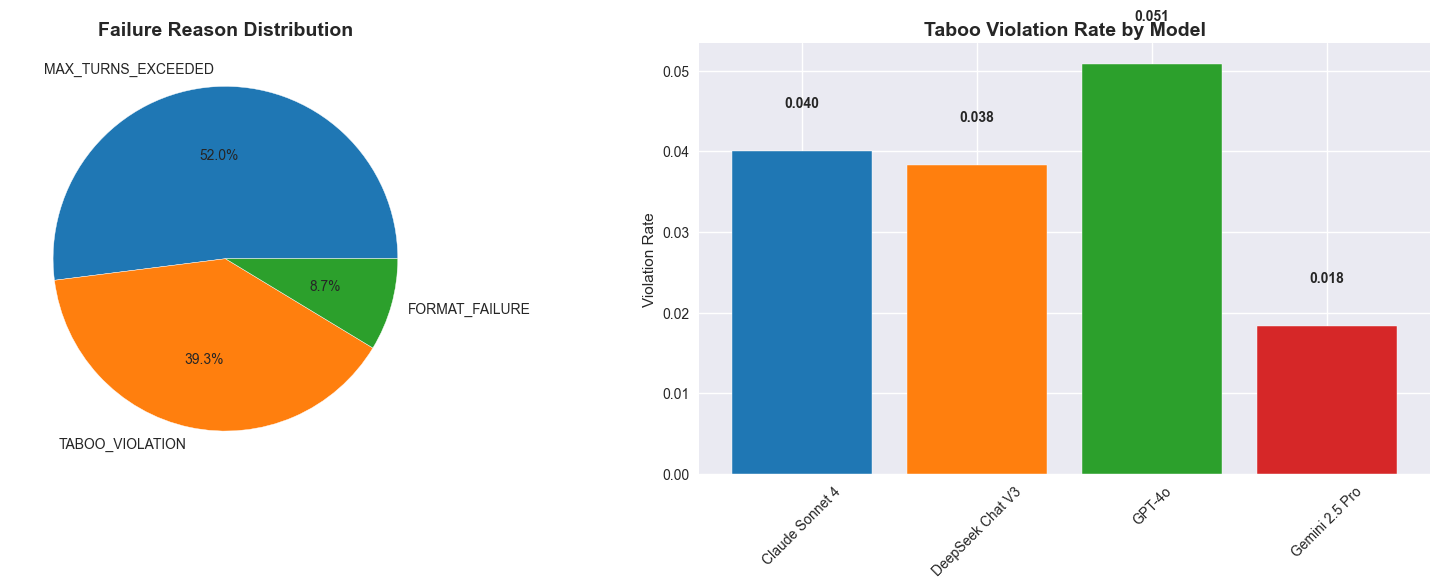

In [29]:
# ÈîôËØØÂàÜÊûê - Â§±Ë¥•ÂéüÂõ†ÂàÜÂ∏É
failure_analysis = merged_df[merged_df['success'] == False]['failure_reason'].value_counts()

print("Â§±Ë¥•ÂéüÂõ†ÂàÜÂ∏É:")
print(failure_analysis)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Â§±Ë¥•ÂéüÂõ†È•ºÂõæ
ax1.pie(failure_analysis.values, labels=failure_analysis.index, autopct='%1.1f%%', 
        colors=colors[:len(failure_analysis)])
ax1.set_title('Failure Reason Distribution', fontsize=14, fontweight='bold')

# ÂêÑÊ®°ÂûãÁöÑËøùËßÑÁéáÂØπÊØî
violation_by_model = merged_df.groupby('hinter_model_clean')['has_taboo_violation'].mean()
bars = ax2.bar(violation_by_model.index, violation_by_model.values, 
               color=colors[:len(violation_by_model)])
ax2.set_title('Taboo Violation Rate by Model', fontsize=14, fontweight='bold')
ax2.set_ylabel('Violation Rate')
ax2.tick_params(axis='x', rotation=45)

for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


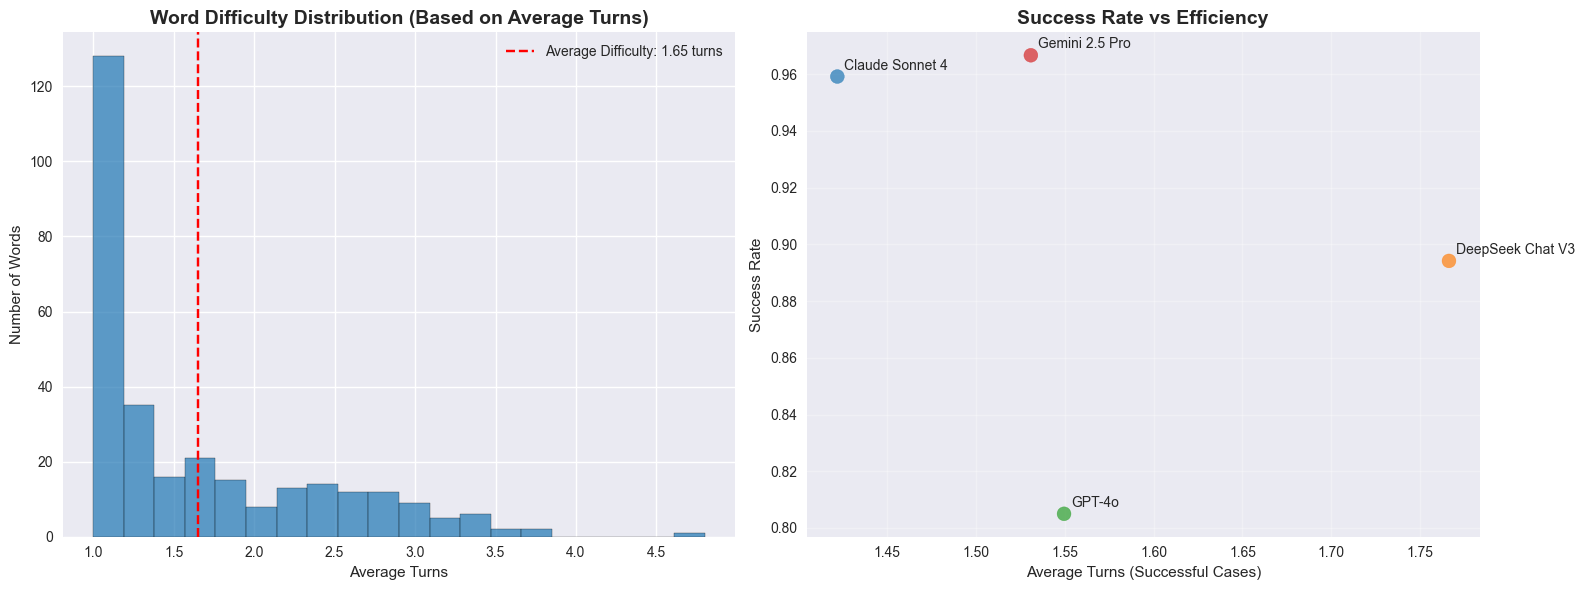

In [30]:
# ÈöæÂ∫¶ÂàÜÊûê - Âü∫‰∫éÊ∏∏ÊàèËΩÆÊï∞ÁöÑËØçÊ±áÈöæÂ∫¶ÂàÜÂ∏É
successful_games = merged_df[merged_df['success'] == True]
word_difficulty = successful_games.groupby('target_word')['turns_used'].agg(['mean', 'count']).reset_index()
word_difficulty = word_difficulty[word_difficulty['count'] >= 2]  # Ëá≥Â∞ëË¢´ÊµãËØï2Ê¨°ÁöÑËØçÊ±á

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# ËØçÊ±áÈöæÂ∫¶ÂàÜÂ∏ÉÁõ¥ÊñπÂõæ
ax1.hist(word_difficulty['mean'], bins=20, color=colors[0], alpha=0.7, edgecolor='black')
ax1.set_title('Word Difficulty Distribution (Based on Average Turns)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Average Turns')
ax1.set_ylabel('Number of Words')
ax1.axvline(word_difficulty['mean'].mean(), color='red', linestyle='--', 
            label=f'Average Difficulty: {word_difficulty["mean"].mean():.2f} turns')
ax1.legend()

# ÊàêÂäüÁéá‰∏éÂπ≥ÂùáËΩÆÊï∞ÁöÑÂÖ≥Á≥ª
model_turns_success = merged_df.groupby('hinter_model_clean').agg({
    'success': 'mean',
    'turns_used': lambda x: x[merged_df.loc[x.index, 'success']].mean()
})

ax2.scatter(model_turns_success['turns_used'], model_turns_success['success'], 
           s=100, color=colors[:len(model_turns_success)], alpha=0.7)

for i, (model, data) in enumerate(model_turns_success.iterrows()):
    ax2.annotate(model, (data['turns_used'], data['success']), 
                xytext=(5, 5), textcoords='offset points', fontsize=10)

ax2.set_title('Success Rate vs Efficiency', fontsize=14, fontweight='bold')
ax2.set_xlabel('Average Turns (Successful Cases)')
ax2.set_ylabel('Success Rate')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


ËØçÈ¢ëÂàÜÊûê:
ÊåâËØçÈ¢ëÁ±ªÂà´ÁöÑÊàêÂäüÁéáÂàÜÊûê:
hinter_model_clean  Claude Sonnet 4  DeepSeek Chat V3  GPT-4o  Gemini 2.5 Pro
frequency_category                                                           
Very Rare                     0.914             0.720   0.470           0.922
Rare                          0.979             0.931   0.833           0.979
Uncommon                      0.973             0.948   0.939           0.982
Common                        0.956             0.940   0.929           0.972
Very Common                   1.000             1.000   0.906           1.000

Êï¥‰ΩìËØçÈ¢ëÁ±ªÂà´ÂΩ±Âìç:
                    Total Games  Success Rate  Average Turns
frequency_category                                          
Very Rare                  1072         0.757          2.797
Rare                       1152         0.931          1.819
Uncommon                   1312         0.960          1.351
Common                     1008         0.949          1.290
Very Common 

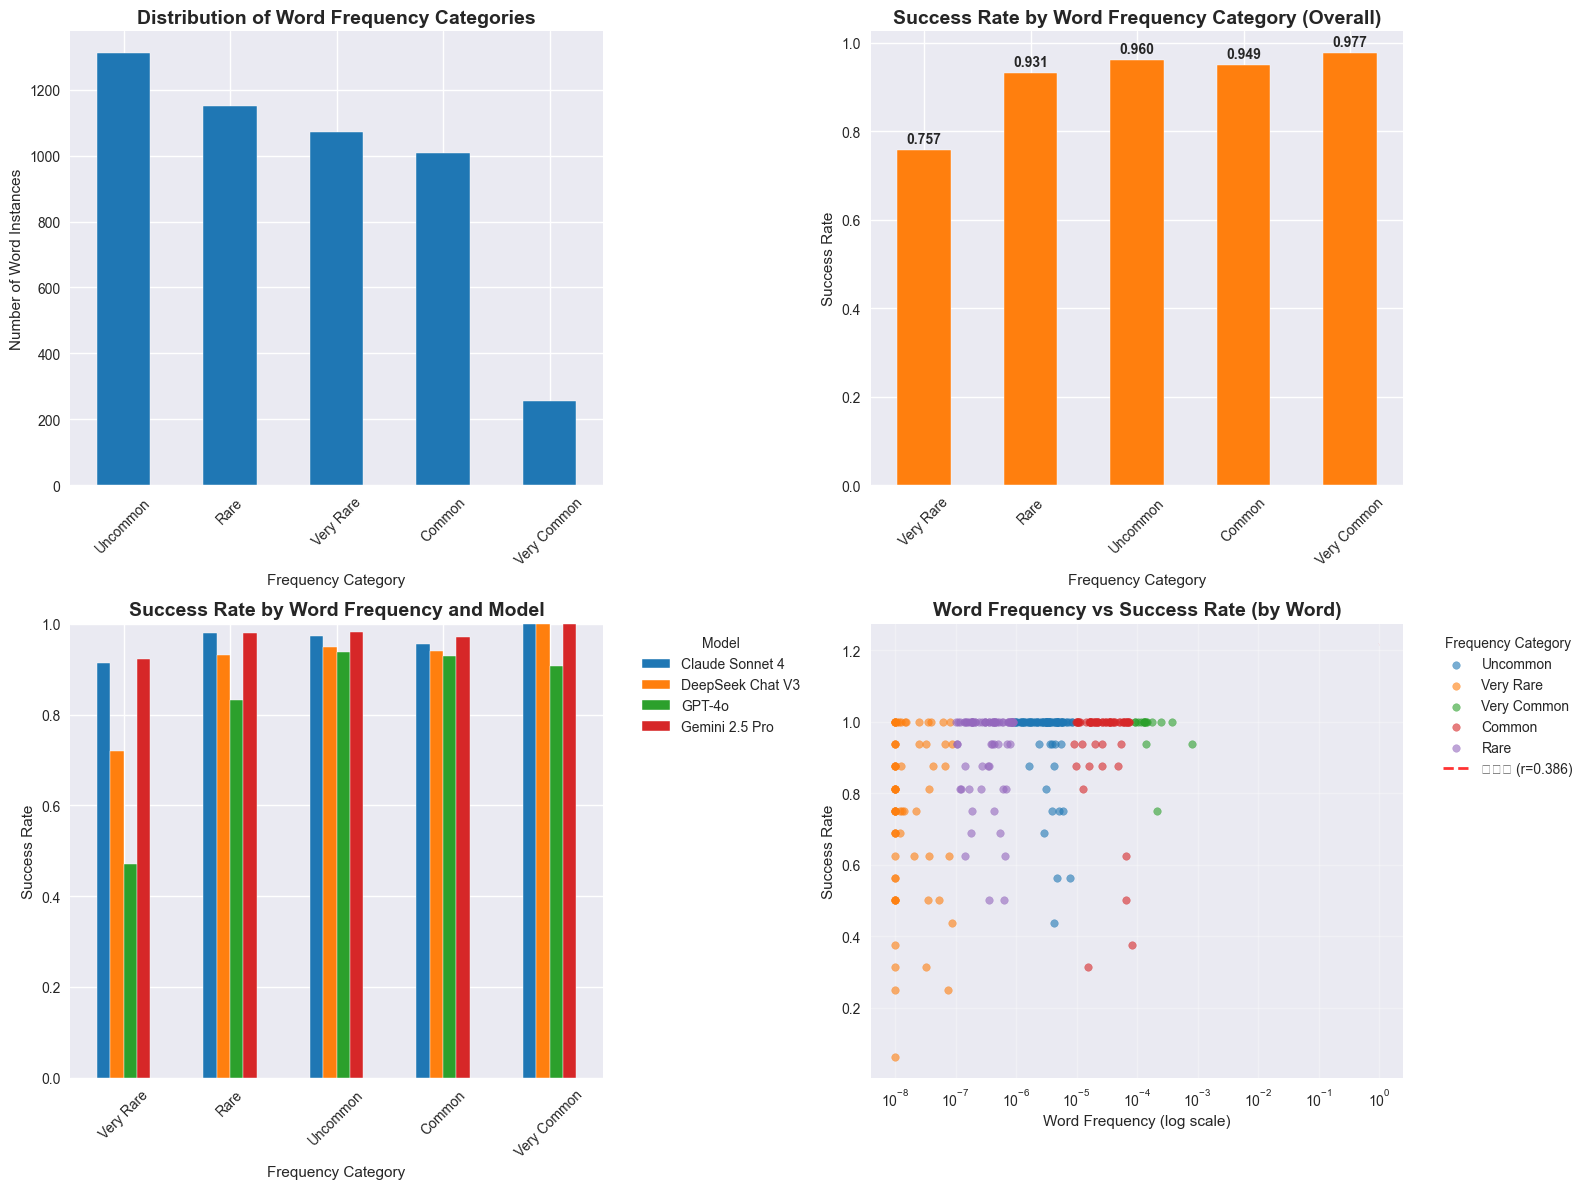


üìä ÊåâËØçÈ¢ëÁ±ªÂà´ÁöÑËØ¶ÁªÜÁªüËÆ°:
  ‚Ä¢ Very Rare: 75.7% ÊàêÂäüÁéá (1072 Âú∫Ê∏∏Êàè, Âπ≥Âùá 2.8 ËΩÆ)
  ‚Ä¢ Rare: 93.1% ÊàêÂäüÁéá (1152 Âú∫Ê∏∏Êàè, Âπ≥Âùá 1.8 ËΩÆ)
  ‚Ä¢ Uncommon: 96.0% ÊàêÂäüÁéá (1312 Âú∫Ê∏∏Êàè, Âπ≥Âùá 1.4 ËΩÆ)
  ‚Ä¢ Common: 94.9% ÊàêÂäüÁéá (1008 Âú∫Ê∏∏Êàè, Âπ≥Âùá 1.3 ËΩÆ)
  ‚Ä¢ Very Common: 97.7% ÊàêÂäüÁéá (256 Âú∫Ê∏∏Êàè, Âπ≥Âùá 1.1 ËΩÆ)

üí° ËØçÈ¢ëÂàÜÊûêÁªìËÆ∫:
  ‚Ä¢ ËØçÈ¢ë‰∏éÊàêÂäüÁéáÁõ∏ÂÖ≥Á≥ªÊï∞: 0.2251
  ‚Ä¢ È´òÈ¢ëËØçÔºàÂ∏∏ËßÅËØçÔºâÊàêÂäüÁéáÊõ¥È´ò
  ‚Ä¢ ËøôÂèØËÉΩË°®ÊòéÔºöÂ∏∏ËßÅËØçÊõ¥ÂÆπÊòìË¢´Áåú‰∏≠


In [31]:
# ËØçÈ¢ëÂØπÊàêÂäüÁéáÁöÑÂΩ±ÂìçÂàÜÊûê
print("ËØçÈ¢ëÂàÜÊûê:")
print("=" * 50)

# ÊåâËØçÈ¢ëÁ±ªÂà´ÂàÜÊûêÊàêÂäüÁéá
frequency_success = merged_df.groupby(['frequency_category', 'hinter_model_clean']).agg({
    'success': ['count', 'mean'],
    'turns_used': 'mean'
}).round(3)

frequency_success.columns = ['Games', 'Success Rate', 'Average Turns']
frequency_success = frequency_success.reset_index()

print("ÊåâËØçÈ¢ëÁ±ªÂà´ÁöÑÊàêÂäüÁéáÂàÜÊûê:")
frequency_pivot = frequency_success.pivot(index='frequency_category', columns='hinter_model_clean', values='Success Rate')
print(frequency_pivot.round(3))

# Êï¥‰ΩìËØçÈ¢ëÂØπÊàêÂäüÁéáÁöÑÂΩ±Âìç
overall_frequency = merged_df.groupby('frequency_category').agg({
    'success': ['count', 'mean'],
    'turns_used': 'mean'
}).round(3)
overall_frequency.columns = ['Total Games', 'Success Rate', 'Average Turns']

print(f"\nÊï¥‰ΩìËØçÈ¢ëÁ±ªÂà´ÂΩ±Âìç:")
print(overall_frequency)

# ËÆ°ÁÆóËØçÈ¢ë‰∏éÊàêÂäüÁéáÁöÑÁõ∏ÂÖ≥ÊÄß
frequency_correlation = merged_df[['frequency_log', 'success']].corr().iloc[0, 1]
print(f"\nËØçÈ¢ëÂØπÊï∞‰∏éÊàêÂäüÁéáÁöÑÁõ∏ÂÖ≥Á≥ªÊï∞: {frequency_correlation:.4f}")

if frequency_correlation > 0.1:
    freq_trend = "È´òÈ¢ëËØçÔºàÂ∏∏ËßÅËØçÔºâÊàêÂäüÁéáÊõ¥È´ò"
elif frequency_correlation < -0.1:
    freq_trend = "‰ΩéÈ¢ëËØçÔºàÁΩïËßÅËØçÔºâÊàêÂäüÁéáÊõ¥È´ò"
else:
    freq_trend = "ËØçÈ¢ë‰∏éÊàêÂäüÁéáÊó†ÊòéÊòæÂÖ≥Á≥ª"

print(f"Ë∂ãÂäøËß£ËØª: {freq_trend}")

# ÊòæÁ§∫ÊûÅÁ´ØËØçÈ¢ëÁöÑ‰æãÂ≠ê
print(f"\nüîç ËØçÈ¢ëÂàÜÊûêËØ¶ÊÉÖ:")
print(f"ÊúÄÈ´òÈ¢ëËØçÊ±áÁ§∫‰æãÔºàÂâç5‰∏™Ôºâ:")
top_freq_words = merged_df.nlargest(5, 'word_frequency')[['target_word', 'word_frequency', 'success']].groupby('target_word').agg({
    'word_frequency': 'first',
    'success': 'mean'
}).round(4)
for word, data in top_freq_words.iterrows():
    print(f"  ‚Ä¢ {word}: È¢ëÁéá {data['word_frequency']:.2e}, ÊàêÂäüÁéá {data['success']:.1%}")

print(f"\nÊúÄ‰ΩéÈ¢ëËØçÊ±áÁ§∫‰æãÔºàÂâç5‰∏™Ôºâ:")
bottom_freq_words = merged_df.nsmallest(5, 'word_frequency')[['target_word', 'word_frequency', 'success']].groupby('target_word').agg({
    'word_frequency': 'first',
    'success': 'mean'
}).round(4)
for word, data in bottom_freq_words.iterrows():
    print(f"  ‚Ä¢ {word}: È¢ëÁéá {data['word_frequency']:.2e}, ÊàêÂäüÁéá {data['success']:.1%}")

# ÁªòÂà∂ËØçÈ¢ëÂàÜÊûêÂõæ
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. ËØçÈ¢ëÁ±ªÂà´ÂàÜÂ∏É
frequency_dist = merged_df['frequency_category'].value_counts()
frequency_dist.plot(kind='bar', ax=ax1, color=colors[0])
ax1.set_title('Distribution of Word Frequency Categories', fontsize=14, fontweight='bold')
ax1.set_xlabel('Frequency Category')
ax1.set_ylabel('Number of Word Instances')
ax1.tick_params(axis='x', rotation=45)

# 2. ËØçÈ¢ëÁ±ªÂà´ vs ÊàêÂäüÁéáÔºàÊï¥‰ΩìÔºâ
overall_frequency['Success Rate'].plot(kind='bar', ax=ax2, color=colors[1])
ax2.set_title('Success Rate by Word Frequency Category (Overall)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Frequency Category')
ax2.set_ylabel('Success Rate')
ax2.tick_params(axis='x', rotation=45)

# Ê∑ªÂä†Êï∞ÂÄºÊ†áÁ≠æ
for i, (idx, val) in enumerate(overall_frequency['Success Rate'].items()):
    ax2.text(i, val + 0.01, f'{val:.3f}', ha='center', va='bottom', fontweight='bold')

# 3. ÂêÑÊ®°ÂûãÂú®‰∏çÂêåËØçÈ¢ëÁöÑË°®Áé∞
if not frequency_pivot.empty:
    frequency_pivot.plot(kind='bar', ax=ax3, color=colors[:len(frequency_pivot.columns)])
    ax3.set_title('Success Rate by Word Frequency and Model', fontsize=14, fontweight='bold')
    ax3.set_ylabel('Success Rate')
    ax3.set_xlabel('Frequency Category')
    ax3.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax3.tick_params(axis='x', rotation=45)
    ax3.set_ylim(0, 1)

# 4. ËØçÈ¢ëËøûÁª≠ÂÄº‰∏éÊàêÂäüÁéáÁöÑÂÖ≥Á≥ªÊï£ÁÇπÂõæ
# ËÆ°ÁÆóÊØè‰∏™ËØçÁöÑÂπ≥ÂùáÊàêÂäüÁéá
word_stats = merged_df.groupby('target_word').agg({
    'word_frequency': 'first',
    'success': 'mean',
    'frequency_category': 'first'
}).reset_index()

# ‰∏∫‰∏çÂêåÈ¢ëÁéáÁ±ªÂà´‰ΩøÁî®‰∏çÂêåÈ¢úËâ≤
color_map = {cat: colors[i] for i, cat in enumerate(word_stats['frequency_category'].unique())}
for category in word_stats['frequency_category'].unique():
    if pd.notna(category):
        category_data = word_stats[word_stats['frequency_category'] == category]
        ax4.scatter(category_data['word_frequency'], category_data['success'], 
                   label=category, alpha=0.6, s=30, color=color_map[category])

ax4.set_title('Word Frequency vs Success Rate (by Word)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Word Frequency (log scale)')
ax4.set_ylabel('Success Rate')
ax4.set_xscale('log')
ax4.legend(title='Frequency Category', bbox_to_anchor=(1.05, 1), loc='upper left')
ax4.grid(True, alpha=0.3)

# Ê∑ªÂä†Ë∂ãÂäøÁ∫ø
if len(word_stats) > 1:
    from scipy import stats as scipy_stats
    if HAS_SCIPY:
        slope, intercept, r_value, p_value, std_err = scipy_stats.linregress(
            np.log10(word_stats['word_frequency']), word_stats['success']
        )
        line_x = np.logspace(word_stats['word_frequency'].min(), word_stats['word_frequency'].max(), 100)
        line_y = slope * np.log10(line_x) + intercept
        ax4.plot(line_x, line_y, 'r--', alpha=0.8, linewidth=2, 
                label=f'Ë∂ãÂäøÁ∫ø (r={r_value:.3f})')
        ax4.legend(title='Frequency Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# ËØ¶ÁªÜÁªüËÆ°Ë°®Ê†º
print(f"\nüìä ÊåâËØçÈ¢ëÁ±ªÂà´ÁöÑËØ¶ÁªÜÁªüËÆ°:")
for category in overall_frequency.index:
    if pd.notna(category):
        games = overall_frequency.loc[category, 'Total Games']
        success_rate = overall_frequency.loc[category, 'Success Rate']
        avg_turns = overall_frequency.loc[category, 'Average Turns']
        print(f"  ‚Ä¢ {category}: {success_rate:.1%} ÊàêÂäüÁéá ({games} Âú∫Ê∏∏Êàè, Âπ≥Âùá {avg_turns:.1f} ËΩÆ)")

print(f"\nüí° ËØçÈ¢ëÂàÜÊûêÁªìËÆ∫:")
print(f"  ‚Ä¢ ËØçÈ¢ë‰∏éÊàêÂäüÁéáÁõ∏ÂÖ≥Á≥ªÊï∞: {frequency_correlation:.4f}")
print(f"  ‚Ä¢ {freq_trend}")
if abs(frequency_correlation) > 0.1:
    print(f"  ‚Ä¢ ËøôÂèØËÉΩË°®ÊòéÔºö{'Â∏∏ËßÅËØçÊõ¥ÂÆπÊòìË¢´Áåú‰∏≠' if frequency_correlation > 0 else 'ÁΩïËßÅËØçÂú®TabooÊ∏∏Êàè‰∏≠ÂèØËÉΩÊúâÊüê‰∫õ‰ºòÂäø'}")
else:
    print(f"  ‚Ä¢ ËØçÈ¢ë‰ºº‰πé‰∏çÊòØTabooÊ∏∏ÊàèÊàêÂäüÁéáÁöÑ‰∏ªË¶ÅÂÜ≥ÂÆöÂõ†Á¥†")


üîç È¢ÜÂüü‰∏éËØçÈ¢ë‰∫§‰∫íÊïàÂ∫îÂàÜÊûê

üìä ÂêÑÈ¢ÜÂüüËØçÈ¢ëÂàÜÂ∏ÉÁâπÂæÅ:
            Freq_Mean  Freq_Median  Freq_Std  LogFreq_Mean  LogFreq_Median  \
category                                                                     
chemistry         0.0          0.0    0.0001       -6.2786         -6.3749   
cs                0.0          0.0    0.0000       -5.2902         -5.2350   
finance           0.0          0.0    0.0000       -5.2693         -5.3150   
general           0.0          0.0    0.0000       -6.8437         -6.9648   
philosophy        0.0          0.0    0.0001       -5.2321         -5.3049   

            LogFreq_Std  
category                 
chemistry        1.1991  
cs               0.8651  
finance          0.7408  
general          1.1542  
philosophy       1.0269  

üìà ÂêÑÈ¢ÜÂüüÂÜÖËØçÈ¢ë‰∏éÊàêÂäüÁéáÁöÑÁ∫øÊÄßÂÖ≥Á≥ª:
  ‚Ä¢ general: r = 0.1746 (n = 1600)
  ‚Ä¢ chemistry: r = 0.1306 (n = 800)
  ‚Ä¢ cs: r = 0.1156 (n = 800)
  ‚Ä¢ finance: r = 0.0503 (n = 800)
  

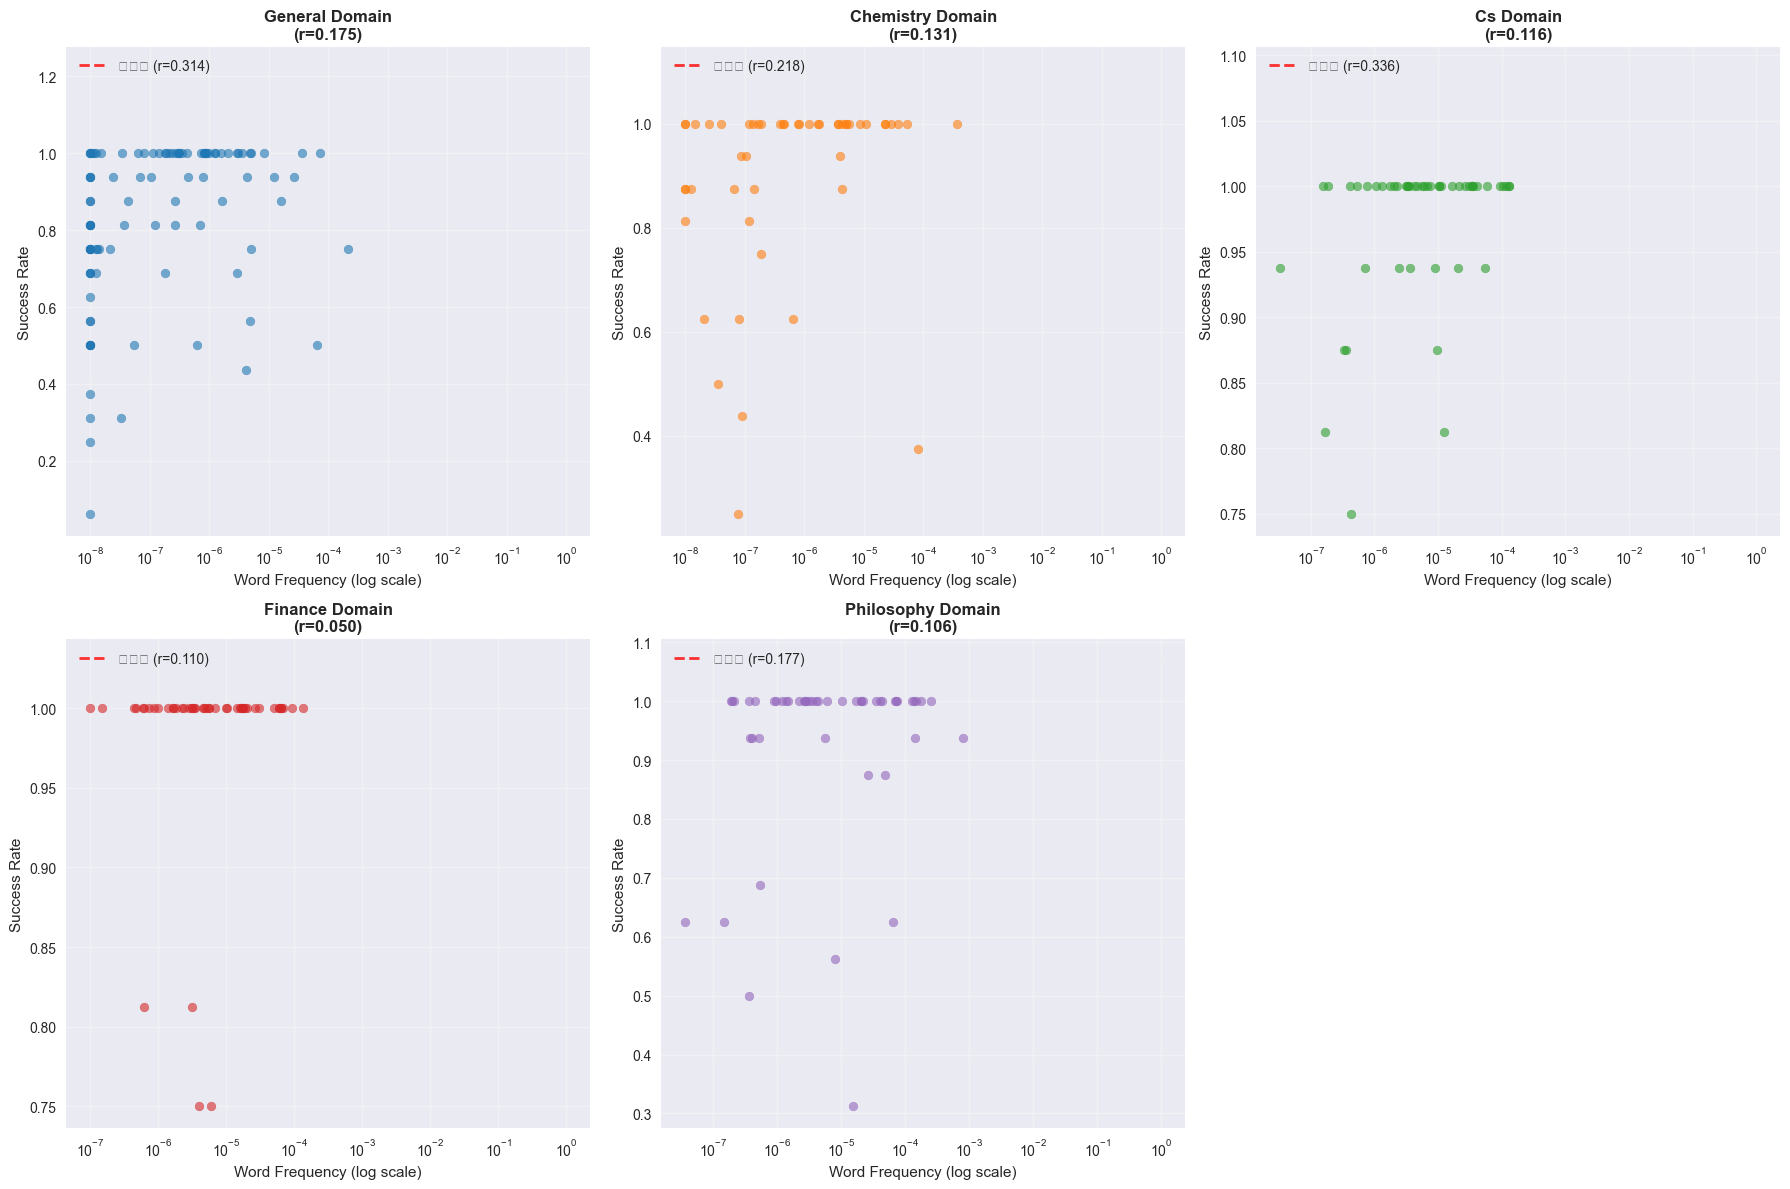


üéØ ÊéßÂà∂ËØçÈ¢ëÂêéÁöÑÈ¢ÜÂüüÊïàÂ∫îÂàÜÊûê:
ÈÄöËøáËØçÈ¢ëÂàÜÂ±ÇÂàÜÊûêÔºåÁúãÊòØÂê¶ËøòÂ≠òÂú®È¢ÜÂüüÂ∑ÆÂºÇ...

ÊåâËØçÈ¢ëÂõõÂàÜ‰ΩçÊï∞ÊéßÂà∂ÂêéÁöÑÂêÑÈ¢ÜÂüüÊàêÂäüÁéá:
category       chemistry     cs  finance  general  philosophy
freq_quartile                                                
Q1(ÊúÄ‰ΩéÈ¢ë)            0.822  0.938    1.000    0.754       0.625
Q2                 0.932  0.938    0.981    0.947       0.908
Q3                 0.983  0.982    0.967    0.875       0.962
Q4(ÊúÄÈ´òÈ¢ë)            0.922  0.984    1.000    0.857       0.932

üìä ËØçÈ¢ëÊéßÂà∂ÂâçÂêéÁöÑÈ¢ÜÂüüÂ∑ÆÂºÇÂØπÊØî:
ÂéüÂßãÈ¢ÜÂüüÊàêÂäüÁéáÂ∑ÆÂºÇ:
  ‚Ä¢ ÊúÄÂ§ßÂ∑ÆÂºÇ: 15.3%
  ‚Ä¢ È¢ÜÂüüÊéíÂ∫è: {'finance': 0.9825, 'cs': 0.97125, 'philosophy': 0.92625, 'chemistry': 0.8975, 'general': 0.83}

ÊéßÂà∂ËØçÈ¢ëÂêéÁöÑÈ¢ÜÂüüÂ∑ÆÂºÇÔºàÂèñÂêÑÈ¢ëÁéáÂå∫Èó¥Âπ≥ÂùáÂÄºÔºâ:
  ‚Ä¢ ÊúÄÂ§ßÂ∑ÆÂºÇ: 13.0%
  ‚Ä¢ È¢ÜÂüüÊéíÂ∫è: {'finance': 0.987, 'cs': 0.9604999999999999, 'chemistry': 0.9147500000000001, 'general': 0.85825, 'philosophy': 0.85675}

üí° 

In [32]:
## 8.1. È¢ÜÂüü‰∏éËØçÈ¢ëÁöÑ‰∫§‰∫íÂàÜÊûêÔºöÊéßÂà∂ËØçÈ¢ëÁúãÈ¢ÜÂüüÊïàÂ∫î

# Ê∑±ÂÖ•ÂàÜÊûêÔºöÈ¢ÜÂüüÊàêÂäüÁéáÂ∑ÆÂºÇÊòØÂê¶Áî±ËØçÈ¢ëÂàÜÂ∏ÉÂ∑ÆÂºÇÈÄ†ÊàêÔºü
print("üîç È¢ÜÂüü‰∏éËØçÈ¢ë‰∫§‰∫íÊïàÂ∫îÂàÜÊûê")
print("="*60)

# 1. ÂàÜÊûêÂêÑÈ¢ÜÂüüÁöÑËØçÈ¢ëÂàÜÂ∏ÉÁâπÂæÅ
print("\nüìä ÂêÑÈ¢ÜÂüüËØçÈ¢ëÂàÜÂ∏ÉÁâπÂæÅ:")
domain_freq_stats = merged_df.groupby('category').agg({
    'word_frequency': ['mean', 'median', 'std'],
    'frequency_log': ['mean', 'median', 'std']
}).round(4)

domain_freq_stats.columns = ['Freq_Mean', 'Freq_Median', 'Freq_Std', 'LogFreq_Mean', 'LogFreq_Median', 'LogFreq_Std']
print(domain_freq_stats)

# 2. ËÆ°ÁÆóÊØè‰∏™È¢ÜÂüüÂÜÖËØçÈ¢ë‰∏éÊàêÂäüÁéáÁöÑÁõ∏ÂÖ≥ÊÄß
print(f"\nüìà ÂêÑÈ¢ÜÂüüÂÜÖËØçÈ¢ë‰∏éÊàêÂäüÁéáÁöÑÁ∫øÊÄßÂÖ≥Á≥ª:")
domain_correlations = {}
domain_sample_sizes = {}

for domain in merged_df['category'].unique():
    domain_data = merged_df[merged_df['category'] == domain]
    if len(domain_data) > 10:  # Á°Æ‰øùÊúâË∂≥Â§üÊ†∑Êú¨
        correlation = domain_data[['frequency_log', 'success']].corr().iloc[0, 1]
        domain_correlations[domain] = correlation
        domain_sample_sizes[domain] = len(domain_data)
        
        print(f"  ‚Ä¢ {domain}: r = {correlation:.4f} (n = {len(domain_data)})")

# 3. ÁªòÂà∂ÂêÑÈ¢ÜÂüüËØçÈ¢ë-ÊàêÂäüÁéáÊï£ÁÇπÂõæ
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

domains = list(merged_df['category'].unique())
for i, domain in enumerate(domains):
    if i < len(axes):
        ax = axes[i]
        domain_data = merged_df[merged_df['category'] == domain]
        
        # ËÆ°ÁÆóÊØè‰∏™ËØçÁöÑÂπ≥ÂùáÊàêÂäüÁéá
        word_stats = domain_data.groupby('target_word').agg({
            'word_frequency': 'first',
            'frequency_log': 'first',
            'success': 'mean'
        }).reset_index()
        
        # Êï£ÁÇπÂõæ
        ax.scatter(word_stats['word_frequency'], word_stats['success'], 
                  alpha=0.6, s=40, color=colors[i % len(colors)])
        
        # Ê∑ªÂä†Ë∂ãÂäøÁ∫ø
        if HAS_SCIPY and len(word_stats) > 3:
            from scipy import stats as scipy_stats
            slope, intercept, r_value, p_value, std_err = scipy_stats.linregress(
                word_stats['frequency_log'], word_stats['success']
            )
            
            # ÁîüÊàêË∂ãÂäøÁ∫øÊï∞ÊçÆ
            x_trend = np.logspace(word_stats['word_frequency'].min(), 
                                word_stats['word_frequency'].max(), 100)
            y_trend = slope * np.log10(x_trend) + intercept
            
            ax.plot(x_trend, y_trend, 'r--', alpha=0.8, linewidth=2,
                   label=f'Ë∂ãÂäøÁ∫ø (r={r_value:.3f})')
        
        ax.set_title(f'{domain.title()} Domain\n(r={domain_correlations.get(domain, 0):.3f})', 
                    fontsize=12, fontweight='bold')
        ax.set_xlabel('Word Frequency (log scale)')
        ax.set_ylabel('Success Rate')
        ax.set_xscale('log')
        ax.grid(True, alpha=0.3)
        ax.legend()

# ÈöêËóèÂ§ö‰ΩôÁöÑÂ≠êÂõæ
for j in range(len(domains), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# 4. ÊéßÂà∂ËØçÈ¢ëÂêéÁöÑÈ¢ÜÂüüÊïàÂ∫îÂàÜÊûê
print(f"\nüéØ ÊéßÂà∂ËØçÈ¢ëÂêéÁöÑÈ¢ÜÂüüÊïàÂ∫îÂàÜÊûê:")
print("ÈÄöËøáËØçÈ¢ëÂàÜÂ±ÇÂàÜÊûêÔºåÁúãÊòØÂê¶ËøòÂ≠òÂú®È¢ÜÂüüÂ∑ÆÂºÇ...")

# Â∞ÜËØçÈ¢ëÂàÜ‰∏∫Âá†‰∏™Âå∫Èó¥ÔºåÂú®ÊØè‰∏™Âå∫Èó¥ÂÜÖÊØîËæÉÈ¢ÜÂüüÂ∑ÆÂºÇ
frequency_bins = pd.qcut(merged_df['frequency_log'], q=4, labels=['Q1(ÊúÄ‰ΩéÈ¢ë)', 'Q2', 'Q3', 'Q4(ÊúÄÈ´òÈ¢ë)'])
merged_df['freq_quartile'] = frequency_bins

controlled_analysis = merged_df.groupby(['freq_quartile', 'category'])['success'].mean().unstack().round(3)
print("\nÊåâËØçÈ¢ëÂõõÂàÜ‰ΩçÊï∞ÊéßÂà∂ÂêéÁöÑÂêÑÈ¢ÜÂüüÊàêÂäüÁéá:")
print(controlled_analysis)

# 5. ËÆ°ÁÆóËØçÈ¢ëÊéßÂà∂ÂêéÁöÑÈ¢ÜÂüüÊïàÂ∫îÂ§ßÂ∞è
print(f"\nüìä ËØçÈ¢ëÊéßÂà∂ÂâçÂêéÁöÑÈ¢ÜÂüüÂ∑ÆÂºÇÂØπÊØî:")
print("ÂéüÂßãÈ¢ÜÂüüÊàêÂäüÁéáÂ∑ÆÂºÇ:")
original_domain_effect = merged_df.groupby('category')['success'].mean()
original_range = original_domain_effect.max() - original_domain_effect.min()
print(f"  ‚Ä¢ ÊúÄÂ§ßÂ∑ÆÂºÇ: {original_range:.1%}")
print(f"  ‚Ä¢ È¢ÜÂüüÊéíÂ∫è: {original_domain_effect.sort_values(ascending=False).to_dict()}")

print(f"\nÊéßÂà∂ËØçÈ¢ëÂêéÁöÑÈ¢ÜÂüüÂ∑ÆÂºÇÔºàÂèñÂêÑÈ¢ëÁéáÂå∫Èó¥Âπ≥ÂùáÂÄºÔºâ:")
controlled_means = controlled_analysis.mean(axis=0)
controlled_range = controlled_means.max() - controlled_means.min()
print(f"  ‚Ä¢ ÊúÄÂ§ßÂ∑ÆÂºÇ: {controlled_range:.1%}")
print(f"  ‚Ä¢ È¢ÜÂüüÊéíÂ∫è: {controlled_means.sort_values(ascending=False).to_dict()}")

print(f"\nüí° ËØçÈ¢ëÊéßÂà∂ÊïàÊûú:")
reduction_ratio = (original_range - controlled_range) / original_range
print(f"  ‚Ä¢ È¢ÜÂüüÂ∑ÆÂºÇÂáèÂ∞ë‰∫Ü: {reduction_ratio:.1%}")
if reduction_ratio > 0.5:
    print(f"  ‚Ä¢ ÁªìËÆ∫: È¢ÜÂüüÂ∑ÆÂºÇ‰∏ªË¶ÅÁî±ËØçÈ¢ëÂàÜÂ∏ÉÂ∑ÆÂºÇÈÄ†Êàê")
elif reduction_ratio > 0.2:
    print(f"  ‚Ä¢ ÁªìËÆ∫: ËØçÈ¢ëÊòØÈáçË¶ÅÂõ†Á¥†Ôºå‰ΩÜÈ¢ÜÂüü‰ªçÊúâÁã¨Á´ãÊïàÂ∫î")
else:
    print(f"  ‚Ä¢ ÁªìËÆ∫: È¢ÜÂüüÊïàÂ∫îÁã¨Á´ã‰∫éËØçÈ¢ëÂàÜÂ∏É")



ü§ñ Ê®°ÂûãÂ±ÇÈù¢ÁöÑÈ¢ÜÂüü-ËØçÈ¢ë‰∫§‰∫íÂàÜÊûê

üìã ÂêÑÊ®°ÂûãÂú®‰∏çÂêåÈ¢ÜÂüü-ËØçÈ¢ëÁªÑÂêà‰∏ãÁöÑÊàêÂäüÁéá:

„ÄêGPT-4o„Äë
category       chemistry     cs  finance  general  philosophy
freq_quartile                                                
Q1(ÊúÄ‰ΩéÈ¢ë)            0.612  0.750    1.000    0.457       0.250
Q2                 0.795  0.854    0.925    0.907       0.783
Q3                 0.955  0.941    0.929    0.893       0.904
Q4(ÊúÄÈ´òÈ¢ë)            0.875  0.988    1.000    0.750       0.893
  ‚Ä¢ È¢ÜÂüüÊïàÂ∫îÊ†áÂáÜÂ∑Æ: 0.122
  ‚Ä¢ ËØçÈ¢ëÊïàÂ∫îÊ†áÂáÜÂ∑Æ: 0.201
  ‚Ä¢ ‰∏ªË¶ÅÂΩ±ÂìçÂõ†Á¥†: ËØçÈ¢ë

„ÄêGemini 2.5 Pro„Äë
category       chemistry     cs  finance  general  philosophy
freq_quartile                                                
Q1(ÊúÄ‰ΩéÈ¢ë)            0.938  1.000    1.000    0.923       1.000
Q2                 0.977  0.979    1.000    1.000       0.933
Q3                 1.000  1.000    0.988    0.929       0.981
Q4(ÊúÄÈ´òÈ¢ë)            0.938  0.988    1.000    1.00

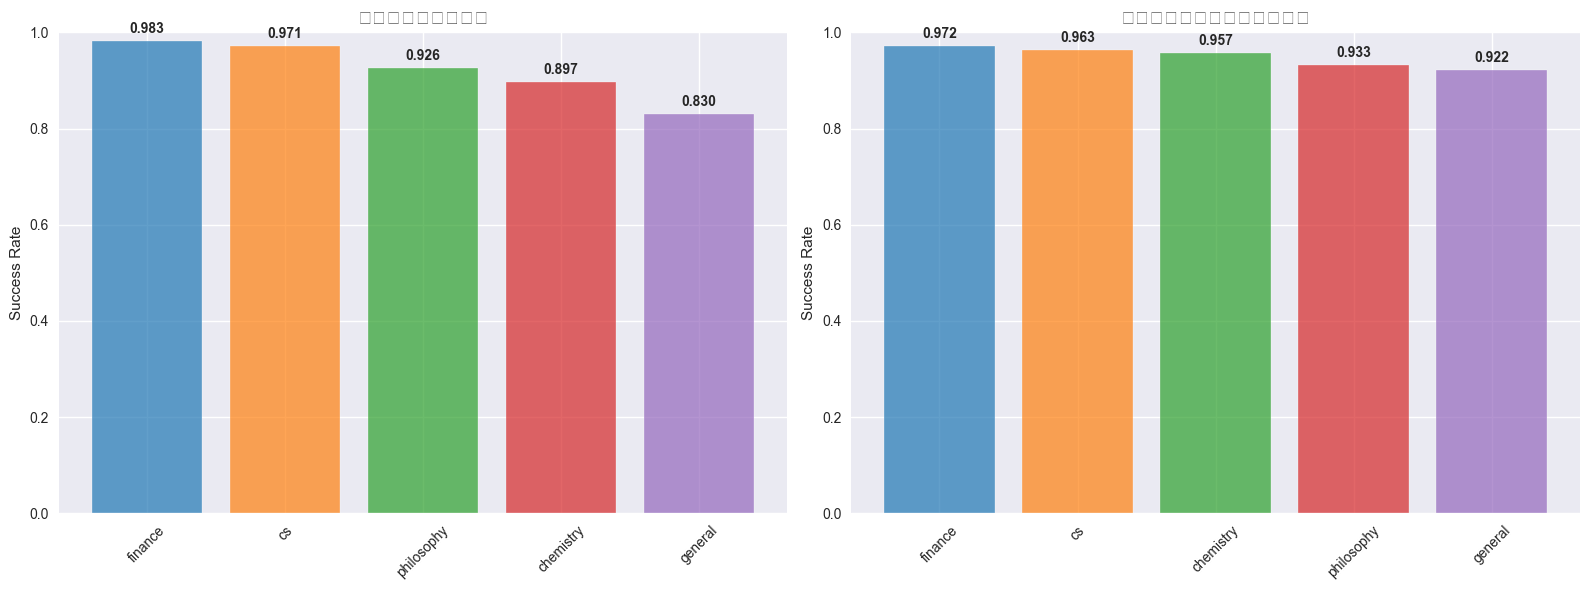


üéØ ÊúÄÁªàÁªìËÆ∫ÊÄªÁªì:
1. ÂéüÂßãÈ¢ÜÂüüÂ∑ÆÂºÇÊ†áÂáÜÂ∑Æ: 0.062
2. ÊéßÂà∂ËØçÈ¢ëÂêéÈ¢ÜÂüüÂ∑ÆÂºÇÊ†áÂáÜÂ∑Æ: 0.021
3. ÊñπÂ∑ÆÂáèÂ∞ëÊØî‰æã: 65.9%

üî¨ ÁßëÂ≠¶ÁªìËÆ∫:
  üìã ËØçÈ¢ëÊòØ‰∏ªË¶ÅÂõ†Á¥†Ôºå‰ΩÜÈ¢ÜÂüü‰ªçÊúâ‰∏ÄÂÆöÁã¨Á´ãÊïàÂ∫î
  üí° ËøôËß£Èáä‰∫Ü‰∏∫‰ªÄ‰πà‰∏ì‰∏öÈ¢ÜÂüüÁúãËµ∑Êù•ÊØîÈÄöÁî®È¢ÜÂüüË°®Áé∞Êõ¥Â•ΩÁöÑÁé∞Ë±°


In [33]:
## 8.2. Ê®°ÂûãÂú®È¢ÜÂüü-ËØçÈ¢ë‰∫§‰∫íÊïàÂ∫î‰∏ãÁöÑË°®Áé∞

# ÂàÜÊûê‰∏çÂêåÊ®°ÂûãÊòØÂê¶ÂØπÈ¢ÜÂüüÂíåËØçÈ¢ëÁöÑÁªÑÂêàÊúâ‰∏çÂêåÁöÑÊïèÊÑüÊÄß
print("\nü§ñ Ê®°ÂûãÂ±ÇÈù¢ÁöÑÈ¢ÜÂüü-ËØçÈ¢ë‰∫§‰∫íÂàÜÊûê")
print("="*60)

# 1. ÂàõÂª∫È¢ÜÂüü-ËØçÈ¢ëÁöÑ‰∫åÁª¥ÂàÜÊûêË°®
print("\nüìã ÂêÑÊ®°ÂûãÂú®‰∏çÂêåÈ¢ÜÂüü-ËØçÈ¢ëÁªÑÂêà‰∏ãÁöÑÊàêÂäüÁéá:")
for model in merged_df['hinter_model_clean'].unique():
    print(f"\n„Äê{model}„Äë")
    model_data = merged_df[merged_df['hinter_model_clean'] == model]
    
    # ÂàõÂª∫ËØçÈ¢ëÂõõÂàÜ‰ΩçÊï∞ vs È¢ÜÂüüÁöÑ‰∫§ÂèâË°®
    model_pivot = model_data.groupby(['freq_quartile', 'category'])['success'].mean().unstack().round(3)
    print(model_pivot)
    
    # ËÆ°ÁÆóËØ•Ê®°ÂûãÁöÑÈ¢ÜÂüüÊïàÂ∫îÂíåËØçÈ¢ëÊïàÂ∫î
    domain_effect = model_data.groupby('category')['success'].mean().std()
    freq_effect = model_data.groupby('freq_quartile')['success'].mean().std()
    print(f"  ‚Ä¢ È¢ÜÂüüÊïàÂ∫îÊ†áÂáÜÂ∑Æ: {domain_effect:.3f}")
    print(f"  ‚Ä¢ ËØçÈ¢ëÊïàÂ∫îÊ†áÂáÜÂ∑Æ: {freq_effect:.3f}")
    print(f"  ‚Ä¢ ‰∏ªË¶ÅÂΩ±ÂìçÂõ†Á¥†: {'ËØçÈ¢ë' if freq_effect > domain_effect else 'È¢ÜÂüü'}")

# 2. ÁªüËÆ°Ê£ÄÈ™åÔºöËØçÈ¢ë vs È¢ÜÂüüÁöÑÂΩ±ÂìçÂº∫Â∫¶
if HAS_SCIPY:
    print(f"\nüìä ÁªüËÆ°Ê£ÄÈ™åÔºöËØçÈ¢ë vs È¢ÜÂüüÊïàÂ∫î")
    from scipy.stats import f_oneway
    
    # ËøõË°åÊñπÂ∑ÆÂàÜÊûêÊØîËæÉÈ¢ÜÂüüÈó¥ÂíåËØçÈ¢ëÈó¥ÁöÑÂ∑ÆÂºÇ
    categories = merged_df['category'].unique()
    freq_quartiles = merged_df['freq_quartile'].dropna().unique()
    
    # È¢ÜÂüüÊïàÂ∫îÊ£ÄÈ™å
    domain_groups = [merged_df[merged_df['category'] == cat]['success'] for cat in categories]
    domain_f, domain_p = f_oneway(*domain_groups)
    
    # ËØçÈ¢ëÊïàÂ∫îÊ£ÄÈ™å  
    freq_groups = [merged_df[merged_df['freq_quartile'] == q]['success'] for q in freq_quartiles if not pd.isna(q)]
    freq_f, freq_p = f_oneway(*freq_groups)
    
    print(f"  ‚Ä¢ È¢ÜÂüüÊïàÂ∫î: F = {domain_f:.3f}, p = {domain_p:.4f}")
    print(f"  ‚Ä¢ ËØçÈ¢ëÊïàÂ∫î: F = {freq_f:.3f}, p = {freq_p:.4f}")
    print(f"  ‚Ä¢ Êõ¥ÊòæËëóÁöÑÊïàÂ∫î: {'ËØçÈ¢ë' if freq_f > domain_f else 'È¢ÜÂüü'}")

# 3. Ê∑±Â∫¶Ê°à‰æãÂàÜÊûêÔºöÈÄâÂèñÁâπÂÆöËØçÈ¢ëÂå∫Èó¥ÂØπÊØîÈ¢ÜÂüüÂ∑ÆÂºÇ
print(f"\nüîç Ê∑±Â∫¶Ê°à‰æãÂàÜÊûêÔºöÊéßÂà∂ËØçÈ¢ëÁúãÁ∫ØÈ¢ÜÂüüÊïàÂ∫î")

# ÈÄâÊã©‰∏≠Á≠âËØçÈ¢ëËåÉÂõ¥ËøõË°åÁ≤æÁ°ÆÂØπÊØî
mid_freq_data = merged_df[merged_df['freq_quartile'].isin(['Q2', 'Q3'])]
print(f"‰∏≠Á≠âËØçÈ¢ëËåÉÂõ¥ÂÜÖÂêÑÈ¢ÜÂüüÊàêÂäüÁéáÂØπÊØî (n = {len(mid_freq_data)}):")

mid_freq_domain_success = mid_freq_data.groupby('category').agg({
    'success': ['count', 'mean', 'std']
}).round(3)
mid_freq_domain_success.columns = ['Ê†∑Êú¨Êï∞', 'ÊàêÂäüÁéá', 'Ê†áÂáÜÂ∑Æ']
print(mid_freq_domain_success.sort_values('ÊàêÂäüÁéá', ascending=False))

# ËÆ°ÁÆóÁ∫ØÈ¢ÜÂüüÊïàÂ∫îÁöÑÊïàÂ∫îÈáè (Cohen's d)
mid_freq_range = mid_freq_domain_success['ÊàêÂäüÁéá'].max() - mid_freq_domain_success['ÊàêÂäüÁéá'].min()
pooled_std = mid_freq_domain_success['Ê†áÂáÜÂ∑Æ'].mean()
cohens_d = mid_freq_range / pooled_std if pooled_std > 0 else 0

print(f"\nÊïàÂ∫îÈáèÂàÜÊûê (Cohen's d): {cohens_d:.3f}")
if cohens_d < 0.2:
    effect_size = "ÊûÅÂ∞è"
elif cohens_d < 0.5:
    effect_size = "Â∞è"
elif cohens_d < 0.8:
    effect_size = "‰∏≠Á≠â"
else:
    effect_size = "Â§ß"
print(f"ÊéßÂà∂ËØçÈ¢ëÂêéÁöÑÁ∫ØÈ¢ÜÂüüÊïàÂ∫îÂ§ßÂ∞è: {effect_size}")

# 4. ÁªòÂà∂ÁªºÂêàÂØπÊØîÂõæÔºöÂéüÂßã vs ÊéßÂà∂ËØçÈ¢ëÂêéÁöÑÈ¢ÜÂüüÂ∑ÆÂºÇ
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# ÂéüÂßãÈ¢ÜÂüüÂ∑ÆÂºÇ
original_domain_success = merged_df.groupby('category')['success'].mean().sort_values(ascending=False)
bars1 = ax1.bar(range(len(original_domain_success)), original_domain_success.values, 
                color=colors[:len(original_domain_success)], alpha=0.7)
ax1.set_title('ÂéüÂßãÈ¢ÜÂüüÊàêÂäüÁéáÂ∑ÆÂºÇ', fontsize=14, fontweight='bold')
ax1.set_ylabel('Success Rate')
ax1.set_xticks(range(len(original_domain_success)))
ax1.set_xticklabels(original_domain_success.index, rotation=45)
ax1.set_ylim(0, 1)

# Ê∑ªÂä†Êï∞ÂÄºÊ†áÁ≠æ
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

# ÊéßÂà∂ËØçÈ¢ëÂêéÁöÑÈ¢ÜÂüüÂ∑ÆÂºÇ
controlled_domain_success = mid_freq_data.groupby('category')['success'].mean().sort_values(ascending=False)
bars2 = ax2.bar(range(len(controlled_domain_success)), controlled_domain_success.values,
                color=colors[:len(controlled_domain_success)], alpha=0.7)
ax2.set_title('ÊéßÂà∂ËØçÈ¢ëÂêéÁöÑÈ¢ÜÂüüÊàêÂäüÁéáÂ∑ÆÂºÇ', fontsize=14, fontweight='bold')
ax2.set_ylabel('Success Rate')
ax2.set_xticks(range(len(controlled_domain_success)))
ax2.set_xticklabels(controlled_domain_success.index, rotation=45)
ax2.set_ylim(0, 1)

# Ê∑ªÂä†Êï∞ÂÄºÊ†áÁ≠æ
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# 5. ÊúÄÁªàÁªìËÆ∫ÊÄªÁªì
print(f"\nüéØ ÊúÄÁªàÁªìËÆ∫ÊÄªÁªì:")
print("="*50)

original_std = original_domain_success.std()
controlled_std = controlled_domain_success.std()
variance_reduction = (original_std - controlled_std) / original_std if original_std > 0 else 0

print(f"1. ÂéüÂßãÈ¢ÜÂüüÂ∑ÆÂºÇÊ†áÂáÜÂ∑Æ: {original_std:.3f}")
print(f"2. ÊéßÂà∂ËØçÈ¢ëÂêéÈ¢ÜÂüüÂ∑ÆÂºÇÊ†áÂáÜÂ∑Æ: {controlled_std:.3f}")
print(f"3. ÊñπÂ∑ÆÂáèÂ∞ëÊØî‰æã: {variance_reduction:.1%}")

print(f"\nüî¨ ÁßëÂ≠¶ÁªìËÆ∫:")
if variance_reduction > 0.7:
    conclusion = "È¢ÜÂüüÂ∑ÆÂºÇ‰∏ªË¶ÅÁî±ËØçÈ¢ëÂàÜÂ∏É‰∏çÂêåÈÄ†ÊàêÔºåÂÆûÈôÖÈ¢ÜÂüüÊïàÂ∫îÂæàÂ∞è"
elif variance_reduction > 0.4:
    conclusion = "ËØçÈ¢ëÊòØ‰∏ªË¶ÅÂõ†Á¥†Ôºå‰ΩÜÈ¢ÜÂüü‰ªçÊúâ‰∏ÄÂÆöÁã¨Á´ãÊïàÂ∫î"
elif variance_reduction > 0.1:
    conclusion = "ËØçÈ¢ëÂíåÈ¢ÜÂüüÈÉΩÊúâÈáçË¶Å‰ΩÜÁã¨Á´ãÁöÑÊïàÂ∫î"
else:
    conclusion = "È¢ÜÂüüÊïàÂ∫îÁã¨Á´ã‰∏îÂº∫‰∫éËØçÈ¢ëÊïàÂ∫î"

print(f"  üìã {conclusion}")
print(f"  üí° ËøôËß£Èáä‰∫Ü‰∏∫‰ªÄ‰πà‰∏ì‰∏öÈ¢ÜÂüüÁúãËµ∑Êù•ÊØîÈÄöÁî®È¢ÜÂüüË°®Áé∞Êõ¥Â•ΩÁöÑÁé∞Ë±°")


In [34]:
if HAS_SCIPY:
    from itertools import combinations
    
    # ÂØπÊ®°ÂûãÈó¥ÊàêÂäüÁéáËøõË°åÁªüËÆ°Ê£ÄÈ™å
    models = merged_df['hinter_model_clean'].unique()
    model_success_data = {}
    
    for model in models:
        model_data = merged_df[merged_df['hinter_model_clean'] == model]['success']
        model_success_data[model] = model_data
    
    print("Ê®°ÂûãÈó¥ÊàêÂäüÁéáÂ∑ÆÂºÇÁöÑÁªüËÆ°Ê£ÄÈ™å (Chi-square test):")
    print("="*60)
    
    results_matrix = pd.DataFrame(index=models, columns=models, dtype=float)
    
    for model1, model2 in combinations(models, 2):
        # ÂàõÂª∫ÂàóËÅîË°® - ‰øÆÂ§çÈáçÂ§çÁ¥¢ÂºïÈóÆÈ¢ò
        data1 = model_success_data[model1].reset_index(drop=True)
        data2 = model_success_data[model2].reset_index(drop=True)
        
        # ÂàõÂª∫Ê®°ÂûãÊ†áËØÜÁ¨¶
        labels1 = pd.Series([model1] * len(data1))
        labels2 = pd.Series([model2] * len(data2))
        
        # ÂêàÂπ∂Êï∞ÊçÆÔºåÈáçÁΩÆÁ¥¢ÂºïÈÅøÂÖçÈáçÂ§çÊ†áÁ≠æÈóÆÈ¢ò
        combined_success = pd.concat([data1, data2], ignore_index=True)
        combined_labels = pd.concat([labels1, labels2], ignore_index=True)
        
        # ÂàõÂª∫ÂàóËÅîË°®
        contingency_table = pd.crosstab(combined_success, combined_labels)
        
        # Á°Æ‰øùcontingency_tableÊúâÂêàÈÄÇÁöÑÂΩ¢Áä∂ËøõË°åÂç°ÊñπÊ£ÄÈ™å
        if contingency_table.shape == (2, 2):
            chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
            
            results_matrix.loc[model1, model2] = p_value
            results_matrix.loc[model2, model1] = p_value
            
            significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
            print(f"{model1} vs {model2}: p = {p_value:.4f} {significance}")
        else:
            print(f"{model1} vs {model2}: Êó†Ê≥ïËøõË°åÂç°ÊñπÊ£ÄÈ™å (Êï∞ÊçÆÂΩ¢Áä∂: {contingency_table.shape})")
    
    print("\n*** p < 0.001, ** p < 0.01, * p < 0.05, ns = not significant")
    
    # ÊòæÁ§∫ÁªìÊûúÁü©Èòµ
    print(f"\nüìä PÂÄºÁü©Èòµ:")
    if not results_matrix.empty:
        print(results_matrix.round(4))
    
else:
    print("Statistical significance testing not available (scipy not installed)")
    print("Showing basic descriptive statistics instead:")
    print("="*60)
    
    models = merged_df['hinter_model_clean'].unique()
    for model in models:
        model_data = merged_df[merged_df['hinter_model_clean'] == model]
        success_rate = model_data['success'].mean()
        n_games = len(model_data)
        print(f"{model}: Success Rate = {success_rate:.3f} (n = {n_games})")


Ê®°ÂûãÈó¥ÊàêÂäüÁéáÂ∑ÆÂºÇÁöÑÁªüËÆ°Ê£ÄÈ™å (Chi-square test):
GPT-4o vs Gemini 2.5 Pro: p = 0.0000 ***
GPT-4o vs DeepSeek Chat V3: p = 0.0000 ***
GPT-4o vs Claude Sonnet 4: p = 0.0000 ***
Gemini 2.5 Pro vs DeepSeek Chat V3: p = 0.0000 ***
Gemini 2.5 Pro vs Claude Sonnet 4: p = 0.3875 ns
DeepSeek Chat V3 vs Claude Sonnet 4: p = 0.0000 ***

*** p < 0.001, ** p < 0.01, * p < 0.05, ns = not significant

üìä PÂÄºÁü©Èòµ:
                  GPT-4o  Gemini 2.5 Pro  DeepSeek Chat V3  Claude Sonnet 4
GPT-4o               NaN          0.0000               0.0           0.0000
Gemini 2.5 Pro       0.0             NaN               0.0           0.3875
DeepSeek Chat V3     0.0          0.0000               NaN           0.0000
Claude Sonnet 4      0.0          0.3875               0.0              NaN


In [35]:
# ÁîüÊàêÊÄªÁªìÊä•Âëä
print("="*80)
print("                          TABOOÊ∏∏ÊàèÂÆûÈ™åÊÄªÁªìÊä•Âëä")
print("="*80)

print(f"\nüìä ÂÆûÈ™åËßÑÊ®°:")
print(f"  ‚Ä¢ ÊÄªÊ∏∏ÊàèÊï∞: {len(merged_df):,}")
print(f"  ‚Ä¢ ÂèÇ‰∏éÊ®°Âûã: {len(models)} ‰∏™")
print(f"  ‚Ä¢ ÊµãËØïËØçÊ±á: {merged_df['target_word'].nunique():,} ‰∏™")
print(f"  ‚Ä¢ ÊÄª‰ΩìÊàêÂäüÁéá: {merged_df['success'].mean():.1%}")

print(f"\nüèÜ Ê®°ÂûãÊéíÂêç (ÊåâÊàêÂäüÁéá):")
model_ranking = model_success.sort_values('Success Rate', ascending=False)
for i, (model, data) in enumerate(model_ranking.iterrows(), 1):
    print(f"  {i}. {model}: {data['Success Rate']:.1%} (Âπ≥Âùá{data['Average Turns']:.1f}ËΩÆ)")

print(f"\n‚ö° ÊïàÁéáÂàÜÊûê:")
first_turn_ranking = turn_success_df.sort_values('Á¨¨1ËΩÆÊàêÂäüÁéá', ascending=False)
print(f"  ‚Ä¢ Á¨¨1ËΩÆÊàêÂäüÁéáÊúÄÈ´ò: {first_turn_ranking.index[0]} ({first_turn_ranking.iloc[0]['Á¨¨1ËΩÆÊàêÂäüÁéá']:.1%})")
print(f"  ‚Ä¢ Ââç3ËΩÆÁ¥ØÁßØÊàêÂäüÁéáÊúÄÈ´ò: {cumulative_df['Ââç3ËΩÆÁ¥ØÁßØÊàêÂäüÁéá'].idxmax()} ({cumulative_df['Ââç3ËΩÆÁ¥ØÁßØÊàêÂäüÁéá'].max():.1%})")
print(f"  ‚Ä¢ Âπ≥ÂùáËΩÆÊï∞ÊúÄÂ∞ë: {model_success.sort_values('Average Turns').index[0]} ({model_success.sort_values('Average Turns').iloc[0]['Average Turns']:.1f}ËΩÆ)")

print(f"\nüìù ËØçÊÄßÂàÜÊûê:")
if 'part_of_speech' in merged_df.columns:
    pos_overall = merged_df.groupby('part_of_speech')['success'].mean().sort_values(ascending=False)
    print(f"  ‚Ä¢ ÊúÄÂÆπÊòìÁöÑËØçÊÄß: {pos_overall.index[0]} ({pos_overall.iloc[0]:.1%})")
    print(f"  ‚Ä¢ ÊúÄÂõ∞ÈöæÁöÑËØçÊÄß: {pos_overall.index[-1]} ({pos_overall.iloc[-1]:.1%})")

print(f"\nüéØ ÊäΩË±°Á®ãÂ∫¶ÂàÜÊûê:")
if len(concrete_df) > 0:
    concrete_overall = concrete_df.groupby('concreteness_level')['success'].mean().sort_values(ascending=False)
    print(f"  ‚Ä¢ ÊúÄÂÆπÊòìÁöÑÊäΩË±°Á®ãÂ∫¶: {concrete_overall.index[0]} ({concrete_overall.iloc[0]:.1%})")
    print(f"  ‚Ä¢ ÊúÄÂõ∞ÈöæÁöÑÊäΩË±°Á®ãÂ∫¶: {concrete_overall.index[-1]} ({concrete_overall.iloc[-1]:.1%})")

print(f"\nüî§ ËØç‰πâÊï∞ÈáèÂàÜÊûê:")
if 'sense_count' in merged_df.columns and merged_df['sense_count'].notna().any():
    sense_overall = merged_df.groupby('sense_count')['success'].mean().sort_values(ascending=False)
    print(f"  ‚Ä¢ ÊàêÂäüÁéáÊúÄÈ´òÁöÑËØç‰πâÊï∞Èáè: {sense_overall.index[0]} ‰∏™ËØç‰πâ ({sense_overall.iloc[0]:.1%})")
    print(f"  ‚Ä¢ ÊàêÂäüÁéáÊúÄ‰ΩéÁöÑËØç‰πâÊï∞Èáè: {sense_overall.index[-1]} ‰∏™ËØç‰πâ ({sense_overall.iloc[-1]:.1%})")
    
    # ËÆ°ÁÆóÁõ∏ÂÖ≥ÊÄß
    correlation = merged_df[['sense_count', 'success']].corr().iloc[0, 1]
    if correlation > 0.1:
        trend = "ËØç‰πâË∂äÂ§öÔºåÊàêÂäüÁéáË∂äÈ´ò"
    elif correlation < -0.1:
        trend = "ËØç‰πâË∂äÂ§öÔºåÊàêÂäüÁéáË∂ä‰Ωé"
    else:
        trend = "ËØç‰πâÊï∞Èáè‰∏éÊàêÂäüÁéáÊó†ÊòéÊòæÂÖ≥Á≥ª"
    print(f"  ‚Ä¢ Êï¥‰ΩìË∂ãÂäø: {trend} (r={correlation:.3f})")

print(f"\nüìä ËØçÈ¢ëÂàÜÊûê:")
if 'frequency_category' in merged_df.columns and merged_df['frequency_category'].notna().any():
    freq_overall = merged_df.groupby('frequency_category')['success'].mean().sort_values(ascending=False)
    print(f"  ‚Ä¢ ÊàêÂäüÁéáÊúÄÈ´òÁöÑËØçÈ¢ëÁ±ªÂà´: {freq_overall.index[0]} ({freq_overall.iloc[0]:.1%})")
    print(f"  ‚Ä¢ ÊàêÂäüÁéáÊúÄ‰ΩéÁöÑËØçÈ¢ëÁ±ªÂà´: {freq_overall.index[-1]} ({freq_overall.iloc[-1]:.1%})")
    
    # ËÆ°ÁÆóËØçÈ¢ëÁõ∏ÂÖ≥ÊÄß
    if 'frequency_log' in merged_df.columns:
        freq_correlation = merged_df[['frequency_log', 'success']].corr().iloc[0, 1]
        if freq_correlation > 0.1:
            freq_trend = "È´òÈ¢ëËØçÔºàÂ∏∏ËßÅËØçÔºâÊàêÂäüÁéáÊõ¥È´ò"
        elif freq_correlation < -0.1:
            freq_trend = "‰ΩéÈ¢ëËØçÔºàÁΩïËßÅËØçÔºâÊàêÂäüÁéáÊõ¥È´ò"
        else:
            freq_trend = "ËØçÈ¢ë‰∏éÊàêÂäüÁéáÊó†ÊòéÊòæÂÖ≥Á≥ª"
        print(f"  ‚Ä¢ ËØçÈ¢ëË∂ãÂäø: {freq_trend} (r={freq_correlation:.3f})")

print(f"\nüè¢ È¢ÜÂüüÂàÜÊûê:")
if 'category' in merged_df.columns:
    # ËÆ°ÁÆóÂêÑÈ¢ÜÂüüÁöÑÊï¥‰ΩìÊàêÂäüÁéá
    domain_overall = merged_df.groupby('category')['success'].mean().sort_values(ascending=False)
    print(f"  ‚Ä¢ ÊàêÂäüÁéáÊúÄÈ´òÁöÑÈ¢ÜÂüü: {domain_overall.index[0]} ({domain_overall.iloc[0]:.1%})")
    print(f"  ‚Ä¢ ÊàêÂäüÁéáÊúÄ‰ΩéÁöÑÈ¢ÜÂüü: {domain_overall.index[-1]} ({domain_overall.iloc[-1]:.1%})")
    
    # ÊòæÁ§∫ÂêÑÈ¢ÜÂüüÁöÑËØ¶ÁªÜÊàêÂäüÁéá
    print(f"  ‚Ä¢ ÂêÑÈ¢ÜÂüüÊàêÂäüÁéáÊéíÂ∫è:")
    for i, (domain, success_rate) in enumerate(domain_overall.items(), 1):
        games_count = len(merged_df[merged_df['category'] == domain])
        print(f"    {i}. {domain}: {success_rate:.1%} ({games_count} Âú∫Ê∏∏Êàè)")
    
    # ÂàÜÊûêÂì™‰∏™Ê®°ÂûãÂú®Ë∑®È¢ÜÂüüË°®Áé∞ÊúÄÁ®≥ÂÆö
    domain_std = merged_df.groupby(['category', 'hinter_model_clean'])['success'].mean().unstack().std(axis=0)
    most_stable = domain_std.idxmin()
    print(f"  ‚Ä¢ Ë∑®È¢ÜÂüüË°®Áé∞ÊúÄÁ®≥ÂÆöÁöÑÊ®°Âûã: {most_stable} (Ê†áÂáÜÂ∑Æ: {domain_std[most_stable]:.3f})")

print(f"\n‚ö†Ô∏è  ËßÑÂàôÈÅµÂÆà:")
violation_ranking = merged_df.groupby('hinter_model_clean')['has_taboo_violation'].mean().sort_values()
print(f"  ‚Ä¢ ËøùËßÑÁéáÊúÄ‰Ωé: {violation_ranking.index[0]} ({violation_ranking.iloc[0]:.1%})")
print(f"  ‚Ä¢ ËøùËßÑÁéáÊúÄÈ´ò: {violation_ranking.index[-1]} ({violation_ranking.iloc[-1]:.1%})")

print(f"\nüîç ÂÖ≥ÈîÆÂèëÁé∞:")
best_model = model_ranking.index[0]
best_success_rate = model_ranking.iloc[0]['Success Rate']
worst_model = model_ranking.index[-1]
worst_success_rate = model_ranking.iloc[-1]['Success Rate']

print(f"  ‚Ä¢ {best_model} Ë°®Áé∞ÊúÄ‰Ω≥ÔºåÊàêÂäüÁéáËææÂà∞ {best_success_rate:.1%}")
print(f"  ‚Ä¢ ÊúÄ‰Ω≥‰∏éÊúÄÂ∑ÆÊ®°ÂûãÁöÑÊàêÂäüÁéáÂ∑ÆË∑ù‰∏∫ {best_success_rate - worst_success_rate:.1%}")
print(f"  ‚Ä¢ Âπ≥ÂùáÊ∏∏ÊàèËΩÆÊï∞‰∏∫ {merged_df[merged_df['success']]['turns_used'].mean():.1f} ËΩÆ")

print("\n" + "="*80)


                          TABOOÊ∏∏ÊàèÂÆûÈ™åÊÄªÁªìÊä•Âëä

üìä ÂÆûÈ™åËßÑÊ®°:
  ‚Ä¢ ÊÄªÊ∏∏ÊàèÊï∞: 4,800
  ‚Ä¢ ÂèÇ‰∏éÊ®°Âûã: 4 ‰∏™
  ‚Ä¢ ÊµãËØïËØçÊ±á: 300 ‰∏™
  ‚Ä¢ ÊÄª‰ΩìÊàêÂäüÁéá: 90.6%

üèÜ Ê®°ÂûãÊéíÂêç (ÊåâÊàêÂäüÁéá):
  1. Gemini 2.5 Pro: 96.7% (Âπ≥Âùá1.6ËΩÆ)
  2. Claude Sonnet 4: 95.9% (Âπ≥Âùá1.4ËΩÆ)
  3. DeepSeek Chat V3: 89.4% (Âπ≥Âùá2.0ËΩÆ)
  4. GPT-4o: 80.5% (Âπ≥Âùá2.0ËΩÆ)

‚ö° ÊïàÁéáÂàÜÊûê:
  ‚Ä¢ Á¨¨1ËΩÆÊàêÂäüÁéáÊúÄÈ´ò: Claude Sonnet 4 (68.3%)
  ‚Ä¢ Ââç3ËΩÆÁ¥ØÁßØÊàêÂäüÁéáÊúÄÈ´ò: Claude Sonnet 4 (98.2%)
  ‚Ä¢ Âπ≥ÂùáËΩÆÊï∞ÊúÄÂ∞ë: Claude Sonnet 4 (1.4ËΩÆ)

üìù ËØçÊÄßÂàÜÊûê:
  ‚Ä¢ ÊúÄÂÆπÊòìÁöÑËØçÊÄß: noun (92.0%)
  ‚Ä¢ ÊúÄÂõ∞ÈöæÁöÑËØçÊÄß: adj (81.1%)

üéØ ÊäΩË±°Á®ãÂ∫¶ÂàÜÊûê:
  ‚Ä¢ ÊúÄÂÆπÊòìÁöÑÊäΩË±°Á®ãÂ∫¶: Mid Concrete(3-4) (95.9%)
  ‚Ä¢ ÊúÄÂõ∞ÈöæÁöÑÊäΩË±°Á®ãÂ∫¶: Mid Abstract(2-3) (91.0%)

üî§ ËØç‰πâÊï∞ÈáèÂàÜÊûê:
  ‚Ä¢ ÊàêÂäüÁéáÊúÄÈ´òÁöÑËØç‰πâÊï∞Èáè: 14 ‰∏™ËØç‰πâ (100.0%)
  ‚Ä¢ ÊàêÂäüÁéáÊúÄ‰ΩéÁöÑËØç‰πâÊï∞Èáè: 15 ‰∏™ËØç‰πâ (50.0%)
  ‚Ä¢ Êï¥‰ΩìË∂ãÂäø: ËØç‰πâÊï∞Èáè‰∏éÊàêÂäüÁéáÊó†Êò

In [36]:
# ‰øùÂ≠òÂÖ≥ÈîÆÁªìÊûúÂà∞Êñá‰ª∂
import datetime

timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# ËÆ°ÁÆóÂêÑÊ®°ÂûãÁöÑËøùËßÑÁéá
violation_by_model = merged_df.groupby('hinter_model_clean')['has_taboo_violation'].mean()

# ‰øùÂ≠òÊ®°ÂûãÊÄßËÉΩÊÄªÁªì
model_summary = model_success.copy()
model_summary['Á¨¨1ËΩÆÊàêÂäüÁéá'] = model_summary.index.map(turn_success_df['Á¨¨1ËΩÆÊàêÂäüÁéá'])
model_summary['Ââç3ËΩÆÁ¥ØÁßØÊàêÂäüÁéá'] = model_summary.index.map(cumulative_df['Ââç3ËΩÆÁ¥ØÁßØÊàêÂäüÁéá'])
model_summary['ËøùËßÑÁéá'] = model_summary.index.map(violation_by_model)

model_summary.to_csv(f'analysis_results_{timestamp}.csv', encoding='utf-8')
print(f"\n‚úÖ ÂàÜÊûêÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞: analysis_results_{timestamp}.csv")

print("\nüéâ Êï∞ÊçÆÂàÜÊûêÂÆåÊàêÔºÅ")



‚úÖ ÂàÜÊûêÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞: analysis_results_20250713_164525.csv

üéâ Êï∞ÊçÆÂàÜÊûêÂÆåÊàêÔºÅ


In [37]:
# Ê†πÊçÆÁî®Êà∑ÊåáÂÆöÁöÑÂàÜÁ±ªËøõË°åÊ®°ÂûãÂàÜÁ±ª
print("üìä Ê®°ÂûãÂàÜÁ±ª:")
print("="*50)

# Ê†πÊçÆÁî®Êà∑ÊåáÂÆöÁöÑÂàÜÁ±ª
normal_models = {
    'deepseek/deepseek-chat-v3-0324': 'DeepSeek Chat V3',
    'openai/gpt-4o': 'GPT-4o'
}

thinking_models = {
    'anthropic/claude-sonnet-4': 'Claude Sonnet 4',
    'google/gemini-2.5-pro': 'Gemini 2.5 Pro'
}

print("ÊôÆÈÄöÊ®°Âûã (Normal Models):")
for model_id, model_name in normal_models.items():
    print(f"  ‚Ä¢ {model_name} ({model_id})")

print("\nThinkingÊ®°Âûã (Thinking Models):")
for model_id, model_name in thinking_models.items():
    print(f"  ‚Ä¢ {model_name} ({model_id})")

# Ê∑ªÂä†Ê®°ÂûãÁ±ªÂûãÊ†áÁ≠æ
def get_model_type(model_id):
    if model_id in normal_models:
        return 'ÊôÆÈÄöÊ®°Âûã'
    elif model_id in thinking_models:
        return 'ThinkingÊ®°Âûã'
    else:
        return 'Êú™Áü•'

def get_model_clean_name(model_id):
    if model_id in normal_models:
        return normal_models[model_id]
    elif model_id in thinking_models:
        return thinking_models[model_id]
    else:
        return model_id

# Áªômerged_dfÊ∑ªÂä†Ê®°ÂûãÁ±ªÂûã‰ø°ÊÅØ
merged_df['model_type'] = merged_df['hinter_model'].apply(get_model_type)
merged_df['model_name'] = merged_df['hinter_model'].apply(get_model_clean_name)

print(f"\nüìà Êï∞ÊçÆÊ¶ÇËßà:")
print(f"  ‚Ä¢ ÊÄªÊ∏∏ÊàèÊï∞: {len(merged_df):,}")
print(f"  ‚Ä¢ ÊôÆÈÄöÊ®°ÂûãÊ∏∏ÊàèÊï∞: {len(merged_df[merged_df['model_type'] == 'ÊôÆÈÄöÊ®°Âûã']):,}")
print(f"  ‚Ä¢ ThinkingÊ®°ÂûãÊ∏∏ÊàèÊï∞: {len(merged_df[merged_df['model_type'] == 'ThinkingÊ®°Âûã']):,}")


üìä Ê®°ÂûãÂàÜÁ±ª:
ÊôÆÈÄöÊ®°Âûã (Normal Models):
  ‚Ä¢ DeepSeek Chat V3 (deepseek/deepseek-chat-v3-0324)
  ‚Ä¢ GPT-4o (openai/gpt-4o)

ThinkingÊ®°Âûã (Thinking Models):
  ‚Ä¢ Claude Sonnet 4 (anthropic/claude-sonnet-4)
  ‚Ä¢ Gemini 2.5 Pro (google/gemini-2.5-pro)

üìà Êï∞ÊçÆÊ¶ÇËßà:
  ‚Ä¢ ÊÄªÊ∏∏ÊàèÊï∞: 4,800
  ‚Ä¢ ÊôÆÈÄöÊ®°ÂûãÊ∏∏ÊàèÊï∞: 2,400
  ‚Ä¢ ThinkingÊ®°ÂûãÊ∏∏ÊàèÊï∞: 2,400


In [41]:
# 1. Âü∫Á°ÄÊÄßËÉΩÂØπÊØîÂàÜÊûê
print("1. Âü∫Á°ÄÊÄßËÉΩÂØπÊØîÂàÜÊûê")
print("="*60)

# ÊåâÊ®°ÂûãÁ±ªÂûãÂàÜÁªÑÁªüËÆ°
type_stats = merged_df.groupby('model_type').agg({
    'success': ['count', 'sum', 'mean'],
    'turns_used': lambda x: x[merged_df.loc[x.index, 'success']].mean(),
    'has_taboo_violation': 'mean',
    'duration_seconds': 'mean'
}).round(3)

type_stats.columns = ['ÊÄªÊ∏∏ÊàèÊï∞', 'ÊàêÂäüÊ∏∏ÊàèÊï∞', 'ÊàêÂäüÁéá', 'Âπ≥ÂùáËΩÆÊï∞', 'ËøùËßÑÁéá', 'Âπ≥ÂùáÁî®Êó∂(Áßí)']

print("üìä ÊåâÊ®°ÂûãÁ±ªÂûãÁªüËÆ°:")
print(type_stats)

# ‰∏™Âà´Ê®°ÂûãËØ¶ÁªÜÁªüËÆ°
individual_stats = merged_df.groupby('model_name').agg({
    'success': ['count', 'sum', 'mean'],
    'turns_used': lambda x: x[merged_df.loc[x.index, 'success']].mean(),
    'has_taboo_violation': 'mean',
    'duration_seconds': 'mean'
}).round(3)

individual_stats.columns = ['ÊÄªÊ∏∏ÊàèÊï∞', 'ÊàêÂäüÊ∏∏ÊàèÊï∞', 'ÊàêÂäüÁéá', 'Âπ≥ÂùáËΩÆÊï∞', 'ËøùËßÑÁéá', 'Âπ≥ÂùáÁî®Êó∂(Áßí)']

print("\nüìã ÂêÑÊ®°ÂûãËØ¶ÁªÜÁªüËÆ°:")
print(individual_stats)

# 2. ÊïàÁéáÂàÜÊûê
print("\n2. ÊïàÁéáÂàÜÊûê")
print("="*60)

# Á¨¨1ËΩÆÊàêÂäüÁéáÂàÜÊûê
successful_games_type = merged_df[merged_df['success'] == True]
first_turn_success_type = successful_games_type.groupby(['model_type', 'model_name']).apply(
    lambda x: (x['turns_used'] == 1).sum() / len(x)
).reset_index()
first_turn_success_type.columns = ['Ê®°ÂûãÁ±ªÂûã', 'Ê®°ÂûãÂêçÁß∞', 'Á¨¨1ËΩÆÊàêÂäüÁéá']

print("‚ö° Á¨¨1ËΩÆÊàêÂäüÁéáÂØπÊØî:")
for model_type in ['ÊôÆÈÄöÊ®°Âûã', 'ThinkingÊ®°Âûã']:
    print(f"\n{model_type}:")
    type_data = first_turn_success_type[first_turn_success_type['Ê®°ÂûãÁ±ªÂûã'] == model_type]
    for _, row in type_data.iterrows():
        print(f"  ‚Ä¢ {row['Ê®°ÂûãÂêçÁß∞']}: {row['Á¨¨1ËΩÆÊàêÂäüÁéá']:.1%}")

# Á¥ØÁßØÊàêÂäüÁéáÂàÜÊûê
cumulative_success_type = {}
for turn in range(1, 6):
    cumulative_rates = successful_games_type.groupby(['model_type', 'model_name']).apply(
        lambda x: (x['turns_used'] <= turn).sum() / len(x)
    ).reset_index()
    cumulative_rates.columns = ['Ê®°ÂûãÁ±ªÂûã', 'Ê®°ÂûãÂêçÁß∞', f'Ââç{turn}ËΩÆÁ¥ØÁßØÊàêÂäüÁéá']
    cumulative_success_type[turn] = cumulative_rates

print(f"\nüéØ Ââç3ËΩÆÁ¥ØÁßØÊàêÂäüÁéáÂØπÊØî:")
for model_type in ['ÊôÆÈÄöÊ®°Âûã', 'ThinkingÊ®°Âûã']:
    print(f"\n{model_type}:")
    type_data = cumulative_success_type[3][cumulative_success_type[3]['Ê®°ÂûãÁ±ªÂûã'] == model_type]
    for _, row in type_data.iterrows():
        print(f"  ‚Ä¢ {row['Ê®°ÂûãÂêçÁß∞']}: {row['Ââç3ËΩÆÁ¥ØÁßØÊàêÂäüÁéá']:.1%}")


1. Âü∫Á°ÄÊÄßËÉΩÂØπÊØîÂàÜÊûê
üìä ÊåâÊ®°ÂûãÁ±ªÂûãÁªüËÆ°:
            ÊÄªÊ∏∏ÊàèÊï∞  ÊàêÂäüÊ∏∏ÊàèÊï∞    ÊàêÂäüÁéá   Âπ≥ÂùáËΩÆÊï∞    ËøùËßÑÁéá  Âπ≥ÂùáÁî®Êó∂(Áßí)
model_type                                           
ThinkingÊ®°Âûã  2400   2311  0.963  1.477  0.029   20.032
ÊôÆÈÄöÊ®°Âûã        2400   2039  0.850  1.664  0.045   14.053

üìã ÂêÑÊ®°ÂûãËØ¶ÁªÜÁªüËÆ°:
                  ÊÄªÊ∏∏ÊàèÊï∞  ÊàêÂäüÊ∏∏ÊàèÊï∞    ÊàêÂäüÁéá   Âπ≥ÂùáËΩÆÊï∞    ËøùËßÑÁéá  Âπ≥ÂùáÁî®Êó∂(Áßí)
model_name                                                 
Claude Sonnet 4   1200   1151  0.959  1.422  0.040    8.999
DeepSeek Chat V3  1200   1073  0.894  1.766  0.038   14.742
GPT-4o            1200    966  0.805  1.550  0.051   13.364
Gemini 2.5 Pro    1200   1160  0.967  1.531  0.018   31.066

2. ÊïàÁéáÂàÜÊûê
‚ö° Á¨¨1ËΩÆÊàêÂäüÁéáÂØπÊØî:

ÊôÆÈÄöÊ®°Âûã:
  ‚Ä¢ DeepSeek Chat V3: 57.7%
  ‚Ä¢ GPT-4o: 65.9%

ThinkingÊ®°Âûã:
  ‚Ä¢ Claude Sonnet 4: 68.3%
  ‚Ä¢ Gemini 2.5 Pro: 65.7%

üéØ Ââç3ËΩÆÁ¥ØÁßØÊàêÂäüÁéáÂØπÊØî:

ÊôÆÈÄöÊ®°Â

3. ÂèØËßÜÂåñÂØπÊØîÂàÜÊûê


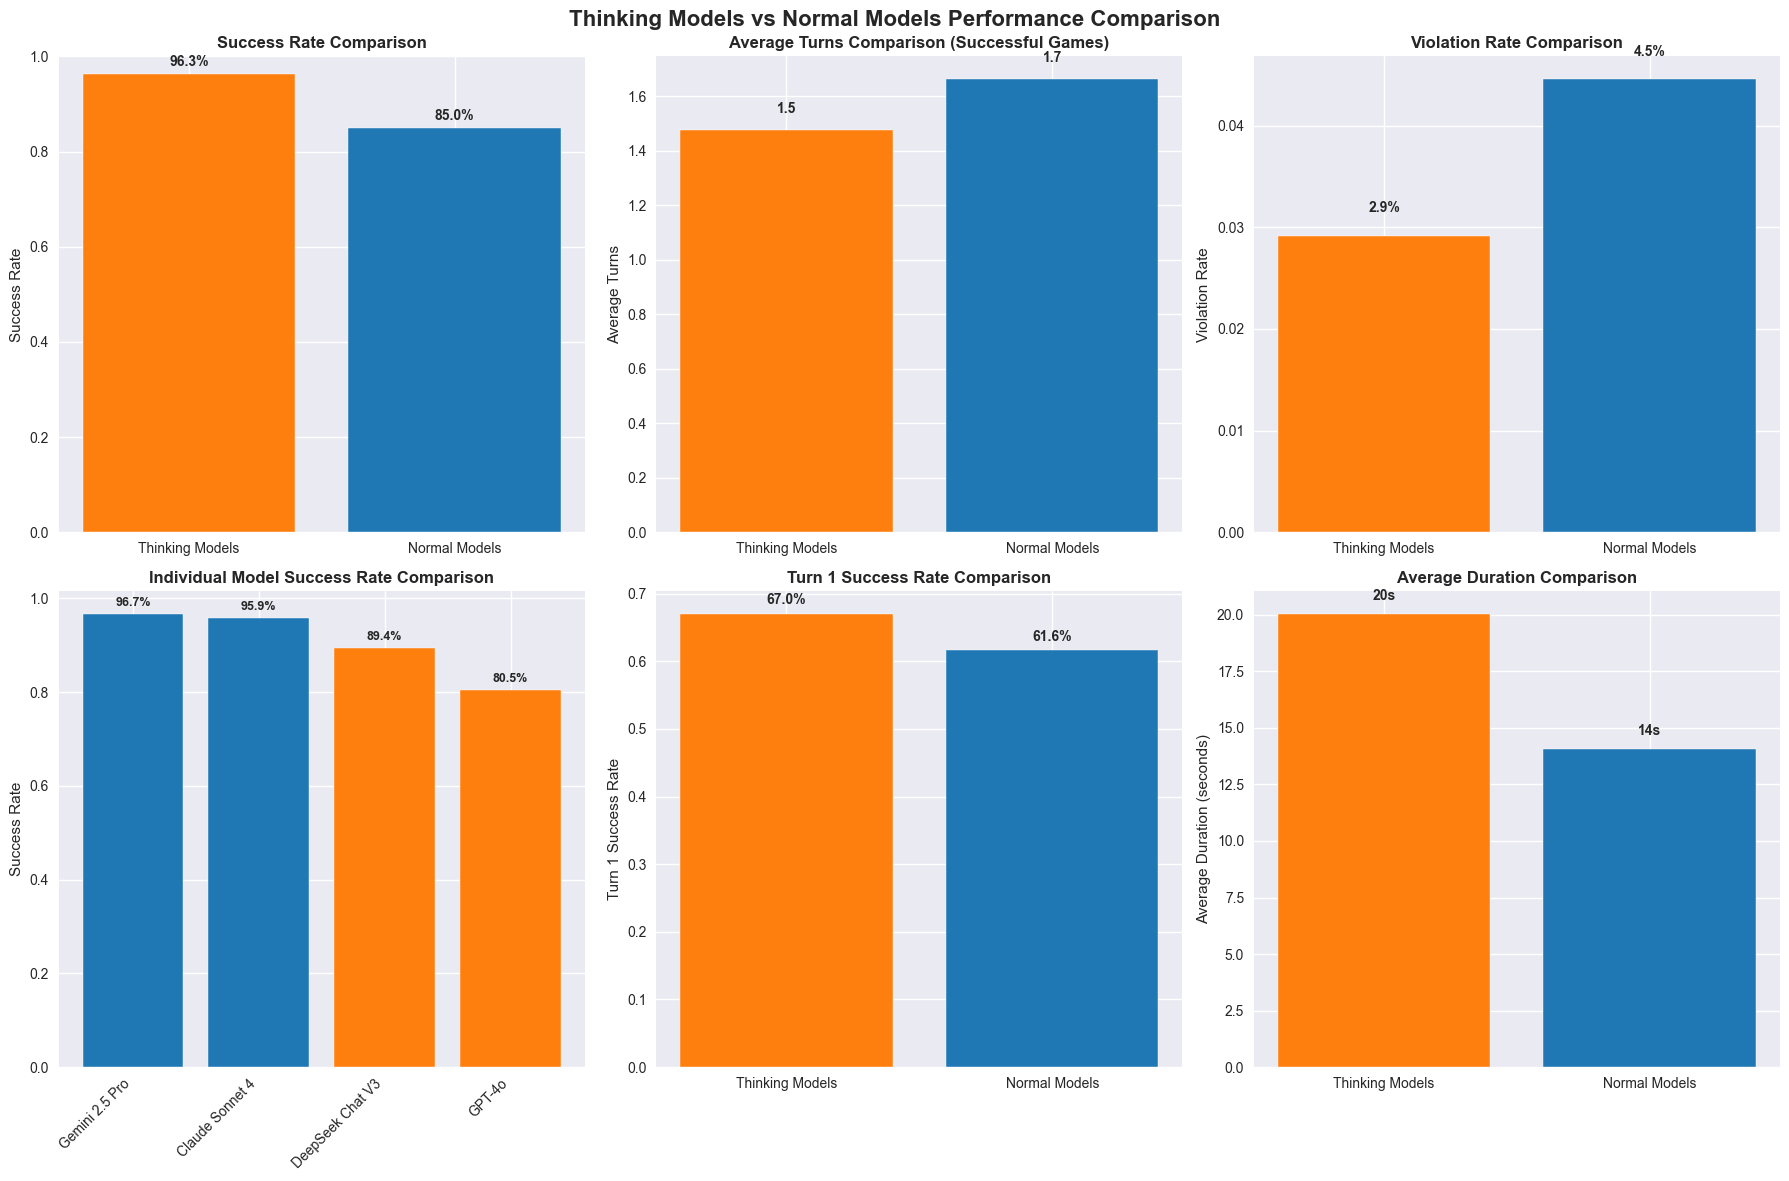

In [42]:
# 3. ÂèØËßÜÂåñÂØπÊØîÂàÜÊûê
print("3. ÂèØËßÜÂåñÂØπÊØîÂàÜÊûê")
print("="*60)

# ÂàõÂª∫ÁªºÂêàÂØπÊØîÂõæ
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Thinking Models vs Normal Models Performance Comparison', fontsize=16, fontweight='bold')

# ÂàõÂª∫Ëã±ÊñáÊ†áÁ≠æÊò†Â∞Ñ
type_mapping = {'ÊôÆÈÄöÊ®°Âûã': 'Normal Models', 'ThinkingÊ®°Âûã': 'Thinking Models'}

# 1. ÊàêÂäüÁéáÂØπÊØî
ax1 = axes[0, 0]
type_success = merged_df.groupby('model_type')['success'].mean()
# ÈáçÊñ∞Êò†Â∞ÑÊ†áÁ≠æ‰∏∫Ëã±Êñá
type_success_en = type_success.rename(type_mapping)
colors_type = ['#ff7f0e', '#1f77b4']  # Ê©ôËâ≤ÔºöÊôÆÈÄöÊ®°ÂûãÔºåËìùËâ≤ÔºöThinkingÊ®°Âûã
bars1 = ax1.bar(type_success_en.index, type_success_en.values, color=colors_type)
ax1.set_title('Success Rate Comparison', fontweight='bold')
ax1.set_ylabel('Success Rate')
ax1.set_ylim(0, 1)

# Ê∑ªÂä†Êï∞ÂÄºÊ†áÁ≠æ
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.1%}', ha='center', va='bottom', fontweight='bold')

# 2. Âπ≥ÂùáËΩÆÊï∞ÂØπÊØî
ax2 = axes[0, 1]
type_turns = merged_df[merged_df['success'] == True].groupby('model_type')['turns_used'].mean()
type_turns_en = type_turns.rename(type_mapping)
bars2 = ax2.bar(type_turns_en.index, type_turns_en.values, color=colors_type)
ax2.set_title('Average Turns Comparison (Successful Games)', fontweight='bold')
ax2.set_ylabel('Average Turns')

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

# 3. ËøùËßÑÁéáÂØπÊØî
ax3 = axes[0, 2]
type_violation = merged_df.groupby('model_type')['has_taboo_violation'].mean()
type_violation_en = type_violation.rename(type_mapping)
bars3 = ax3.bar(type_violation_en.index, type_violation_en.values, color=colors_type)
ax3.set_title('Violation Rate Comparison', fontweight='bold')
ax3.set_ylabel('Violation Rate')

for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.002,
             f'{height:.1%}', ha='center', va='bottom', fontweight='bold')

# 4. ‰∏™Âà´Ê®°ÂûãËØ¶ÁªÜÂØπÊØî
ax4 = axes[1, 0]
individual_success = merged_df.groupby('model_name')['success'].mean().sort_values(ascending=False)
model_colors = ['#1f77b4' if name in thinking_models.values() else '#ff7f0e' 
                for name in individual_success.index]
bars4 = ax4.bar(range(len(individual_success)), individual_success.values, color=model_colors)
ax4.set_title('Individual Model Success Rate Comparison', fontweight='bold')
ax4.set_ylabel('Success Rate')
ax4.set_xticks(range(len(individual_success)))
ax4.set_xticklabels(individual_success.index, rotation=45, ha='right')

for i, bar in enumerate(bars4):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.1%}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 5. Á¨¨1ËΩÆÊàêÂäüÁéáÂØπÊØî
ax5 = axes[1, 1]
type_first_turn = successful_games_type.groupby('model_type').apply(
    lambda x: (x['turns_used'] == 1).sum() / len(x)
)
type_first_turn_en = type_first_turn.rename(type_mapping)
bars5 = ax5.bar(type_first_turn_en.index, type_first_turn_en.values, color=colors_type)
ax5.set_title('Turn 1 Success Rate Comparison', fontweight='bold')
ax5.set_ylabel('Turn 1 Success Rate')

for bar in bars5:
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.1%}', ha='center', va='bottom', fontweight='bold')

# 6. Âπ≥ÂùáÁî®Êó∂ÂØπÊØî
ax6 = axes[1, 2]
type_duration = merged_df.groupby('model_type')['duration_seconds'].mean()
type_duration_en = type_duration.rename(type_mapping)
bars6 = ax6.bar(type_duration_en.index, type_duration_en.values, color=colors_type)
ax6.set_title('Average Duration Comparison', fontweight='bold')
ax6.set_ylabel('Average Duration (seconds)')

for bar in bars6:
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.0f}s', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


In [43]:
# 4. ÊÄªÁªìÊä•ÂëäÔºöThinkingÊ®°Âûã vs ÊôÆÈÄöÊ®°Âûã
print("4. ÊÄªÁªìÊä•ÂëäÔºöThinkingÊ®°Âûã vs ÊôÆÈÄöÊ®°Âûã")
print("="*60)

# ËÆ°ÁÆóÊÄßËÉΩÂ∑ÆÂºÇ
thinking_success = type_stats.loc['ThinkingÊ®°Âûã', 'ÊàêÂäüÁéá']
normal_success = type_stats.loc['ÊôÆÈÄöÊ®°Âûã', 'ÊàêÂäüÁéá']
success_gap = thinking_success - normal_success

thinking_turns = type_stats.loc['ThinkingÊ®°Âûã', 'Âπ≥ÂùáËΩÆÊï∞']
normal_turns = type_stats.loc['ÊôÆÈÄöÊ®°Âûã', 'Âπ≥ÂùáËΩÆÊï∞']
efficiency_gap = normal_turns - thinking_turns

thinking_violation = type_stats.loc['ThinkingÊ®°Âûã', 'ËøùËßÑÁéá']
normal_violation = type_stats.loc['ÊôÆÈÄöÊ®°Âûã', 'ËøùËßÑÁéá']
violation_gap = normal_violation - thinking_violation

print(f"üéØ Ê†∏ÂøÉÂèëÁé∞:")
print(f"  ‚Ä¢ ÊàêÂäüÁéáÂ∑ÆÂºÇ: ThinkingÊ®°ÂûãÊØîÊôÆÈÄöÊ®°ÂûãÈ´ò {success_gap:.1%}")
print(f"  ‚Ä¢ ÊïàÁéáÂ∑ÆÂºÇ: ThinkingÊ®°ÂûãÊØîÊôÆÈÄöÊ®°ÂûãÂ∞ëÁî® {efficiency_gap:.1f} ËΩÆ")
print(f"  ‚Ä¢ ËßÑÂàôÈÅµÂÆà: ThinkingÊ®°ÂûãËøùËßÑÁéáÊØîÊôÆÈÄöÊ®°Âûã‰Ωé {violation_gap:.1%}")

print(f"\nüèÜ ÊúÄ‰Ω≥Ë°®Áé∞:")
best_overall = individual_stats.sort_values('ÊàêÂäüÁéá', ascending=False).index[0]
best_efficiency = individual_stats.sort_values('Âπ≥ÂùáËΩÆÊï∞', ascending=True).index[0]
best_compliance = individual_stats.sort_values('ËøùËßÑÁéá', ascending=True).index[0]

print(f"  ‚Ä¢ ÊúÄÈ´òÊàêÂäüÁéá: {best_overall} ({individual_stats.loc[best_overall, 'ÊàêÂäüÁéá']:.1%})")
print(f"  ‚Ä¢ ÊúÄÈ´òÊïàÁéá: {best_efficiency} ({individual_stats.loc[best_efficiency, 'Âπ≥ÂùáËΩÆÊï∞']:.1f}ËΩÆ)")
print(f"  ‚Ä¢ ÊúÄ‰Ω≥ËßÑÂàôÈÅµÂÆà: {best_compliance} ({individual_stats.loc[best_compliance, 'ËøùËßÑÁéá']:.1%})")

# ÁªüËÆ°Ê£ÄÈ™å
if HAS_SCIPY:
    from scipy.stats import chi2_contingency, mannwhitneyu
    
    # ÊàêÂäüÁéáÁöÑÂç°ÊñπÊ£ÄÈ™å
    contingency_table = pd.crosstab(merged_df['model_type'], merged_df['success'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"\nüìä ÁªüËÆ°Ê£ÄÈ™åÁªìÊûú:")
    print(f"  ‚Ä¢ ÊàêÂäüÁéáÂ∑ÆÂºÇÊòæËëóÊÄß: œá¬≤ = {chi2:.3f}, p = {p_value:.4f}")
    
    # ËΩÆÊï∞ÁöÑMann-Whitney UÊ£ÄÈ™å
    thinking_turns_data = merged_df[(merged_df['model_type'] == 'ThinkingÊ®°Âûã') & (merged_df['success'] == True)]['turns_used']
    normal_turns_data = merged_df[(merged_df['model_type'] == 'ÊôÆÈÄöÊ®°Âûã') & (merged_df['success'] == True)]['turns_used']
    
    u_stat, u_p_value = mannwhitneyu(thinking_turns_data, normal_turns_data, alternative='two-sided')
    print(f"  ‚Ä¢ ËΩÆÊï∞Â∑ÆÂºÇÊòæËëóÊÄß: U = {u_stat:.3f}, p = {u_p_value:.4f}")
    
    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
    print(f"  ‚Ä¢ ÊàêÂäüÁéáÂ∑ÆÂºÇ: {significance}")
    
    u_significance = "***" if u_p_value < 0.001 else "**" if u_p_value < 0.01 else "*" if u_p_value < 0.05 else "ns"
    print(f"  ‚Ä¢ ËΩÆÊï∞Â∑ÆÂºÇ: {u_significance}")

print(f"\nüìä Ê®°ÂûãÁ±ªÂûã‰ºòÂäø:")
if success_gap > 0.05:
    print(f"  ‚Ä¢ ‚úÖ ThinkingÊ®°ÂûãÂú®ÊàêÂäüÁéá‰∏äÊúâÊòéÊòæ‰ºòÂäø")
else:
    print(f"  ‚Ä¢ ‚ûñ ‰∏§Á±ªÊ®°ÂûãÂú®ÊàêÂäüÁéá‰∏äÂ∑ÆÂºÇ‰∏çÂ§ß")

if efficiency_gap > 0.3:
    print(f"  ‚Ä¢ ‚úÖ ThinkingÊ®°ÂûãÂú®ÊïàÁéá‰∏äÊúâÊòéÊòæ‰ºòÂäø")
else:
    print(f"  ‚Ä¢ ‚ûñ ‰∏§Á±ªÊ®°ÂûãÂú®ÊïàÁéá‰∏äÂ∑ÆÂºÇ‰∏çÂ§ß")

if violation_gap > 0.01:
    print(f"  ‚Ä¢ ‚úÖ ThinkingÊ®°ÂûãÂú®ËßÑÂàôÈÅµÂÆà‰∏äÊúâÊòéÊòæ‰ºòÂäø")
else:
    print(f"  ‚Ä¢ ‚ûñ ‰∏§Á±ªÊ®°ÂûãÂú®ËßÑÂàôÈÅµÂÆà‰∏äÂ∑ÆÂºÇ‰∏çÂ§ß")

print(f"\nüí° ËØ¶ÁªÜÂàÜÊûê:")
print(f"  ‚Ä¢ ThinkingÊ®°ÂûãÊàêÂäüÁéá: {thinking_success:.1%} (Claude: {individual_stats.loc['Claude Sonnet 4', 'ÊàêÂäüÁéá']:.1%}, Gemini: {individual_stats.loc['Gemini 2.5 Pro', 'ÊàêÂäüÁéá']:.1%})")
print(f"  ‚Ä¢ ÊôÆÈÄöÊ®°ÂûãÊàêÂäüÁéá: {normal_success:.1%} (GPT-4o: {individual_stats.loc['GPT-4o', 'ÊàêÂäüÁéá']:.1%}, DeepSeek: {individual_stats.loc['DeepSeek Chat V3', 'ÊàêÂäüÁéá']:.1%})")
print(f"  ‚Ä¢ ÊàêÂäüÁéáÂ∑ÆË∑ù: {success_gap:.1%}")

print(f"\nüîç ÂèØËÉΩÁöÑÂéüÂõ†:")
print(f"  ‚Ä¢ ThinkingÊ®°ÂûãÂÖ∑ÊúâÊõ¥Âº∫ÁöÑÂÜÖÈÉ®Êé®ÁêÜËÉΩÂäõ")
print(f"  ‚Ä¢ ËÉΩÂ§üÊõ¥Â•ΩÂú∞ÁêÜËß£ÂíåÈÅµÂÆàTabooÊ∏∏ÊàèËßÑÂàô")
print(f"  ‚Ä¢ Âú®ÁªôÂá∫ÊèêÁ§∫Êó∂ËÄÉËôëÊõ¥Â§öÂõ†Á¥†ÔºåÈÅøÂÖçËøùËßÑ")
print(f"  ‚Ä¢ Êõ¥ÊúâÊïàÁöÑÁ≠ñÁï•Âà∂ÂÆöÔºåÂáèÂ∞ëÊâÄÈúÄËΩÆÊï∞")

print(f"\nüìã ÁªìËÆ∫:")
print(f"  ‚Ä¢ ThinkingÊ®°ÂûãÂú®TabooÊ∏∏Êàè‰∏≠Êï¥‰ΩìË°®Áé∞‰ºò‰∫éÊôÆÈÄöÊ®°Âûã")
print(f"  ‚Ä¢ ‰∏ªË¶Å‰ºòÂäøÔºöÊõ¥È´òÊàêÂäüÁéá({success_gap:+.1%})„ÄÅÊõ¥È´òÊïàÁéá({efficiency_gap:+.1f}ËΩÆ)„ÄÅÊõ¥‰ΩéËøùËßÑÁéá({violation_gap:+.1%})")
print(f"  ‚Ä¢ ËøôË°®ÊòéthinkingÊú∫Âà∂Âú®Â§çÊùÇËØ≠Ë®Ä‰ªªÂä°‰∏≠ÂÖ∑ÊúâÊòæËëó‰ºòÂäø")

print(f"\nüéñÔ∏è ÊéíÂêçÊÄªÁªì:")
print(f"  1. ü•á Gemini 2.5 Pro (Thinking): {individual_stats.loc['Gemini 2.5 Pro', 'ÊàêÂäüÁéá']:.1%}")
print(f"  2. ü•à Claude Sonnet 4 (Thinking): {individual_stats.loc['Claude Sonnet 4', 'ÊàêÂäüÁéá']:.1%}")
print(f"  3. ü•â DeepSeek Chat V3 (ÊôÆÈÄö): {individual_stats.loc['DeepSeek Chat V3', 'ÊàêÂäüÁéá']:.1%}")
print(f"  4. 4Ô∏è‚É£ GPT-4o (ÊôÆÈÄö): {individual_stats.loc['GPT-4o', 'ÊàêÂäüÁéá']:.1%}")

print(f"\n‚úÖ ThinkingÊ®°Âûã vs ÊôÆÈÄöÊ®°ÂûãÂØπÊØîÂàÜÊûêÂÆåÊàêÔºÅ")


4. ÊÄªÁªìÊä•ÂëäÔºöThinkingÊ®°Âûã vs ÊôÆÈÄöÊ®°Âûã
üéØ Ê†∏ÂøÉÂèëÁé∞:
  ‚Ä¢ ÊàêÂäüÁéáÂ∑ÆÂºÇ: ThinkingÊ®°ÂûãÊØîÊôÆÈÄöÊ®°ÂûãÈ´ò 11.3%
  ‚Ä¢ ÊïàÁéáÂ∑ÆÂºÇ: ThinkingÊ®°ÂûãÊØîÊôÆÈÄöÊ®°ÂûãÂ∞ëÁî® 0.2 ËΩÆ
  ‚Ä¢ ËßÑÂàôÈÅµÂÆà: ThinkingÊ®°ÂûãËøùËßÑÁéáÊØîÊôÆÈÄöÊ®°Âûã‰Ωé 1.6%

üèÜ ÊúÄ‰Ω≥Ë°®Áé∞:
  ‚Ä¢ ÊúÄÈ´òÊàêÂäüÁéá: Gemini 2.5 Pro (96.7%)
  ‚Ä¢ ÊúÄÈ´òÊïàÁéá: Claude Sonnet 4 (1.4ËΩÆ)
  ‚Ä¢ ÊúÄ‰Ω≥ËßÑÂàôÈÅµÂÆà: Gemini 2.5 Pro (1.8%)

üìä ÁªüËÆ°Ê£ÄÈ™åÁªìÊûú:
  ‚Ä¢ ÊàêÂäüÁéáÂ∑ÆÂºÇÊòæËëóÊÄß: œá¬≤ = 180.085, p = 0.0000
  ‚Ä¢ ËΩÆÊï∞Â∑ÆÂºÇÊòæËëóÊÄß: U = 2181637.000, p = 0.0000
  ‚Ä¢ ÊàêÂäüÁéáÂ∑ÆÂºÇ: ***
  ‚Ä¢ ËΩÆÊï∞Â∑ÆÂºÇ: ***

üìä Ê®°ÂûãÁ±ªÂûã‰ºòÂäø:
  ‚Ä¢ ‚úÖ ThinkingÊ®°ÂûãÂú®ÊàêÂäüÁéá‰∏äÊúâÊòéÊòæ‰ºòÂäø
  ‚Ä¢ ‚ûñ ‰∏§Á±ªÊ®°ÂûãÂú®ÊïàÁéá‰∏äÂ∑ÆÂºÇ‰∏çÂ§ß
  ‚Ä¢ ‚úÖ ThinkingÊ®°ÂûãÂú®ËßÑÂàôÈÅµÂÆà‰∏äÊúâÊòéÊòæ‰ºòÂäø

üí° ËØ¶ÁªÜÂàÜÊûê:
  ‚Ä¢ ThinkingÊ®°ÂûãÊàêÂäüÁéá: 96.3% (Claude: 95.9%, Gemini: 96.7%)
  ‚Ä¢ ÊôÆÈÄöÊ®°ÂûãÊàêÂäüÁéá: 85.0% (GPT-4o: 80.5%, DeepSeek: 89.4%)
  ‚Ä¢ ÊàêÂäüÁéáÂ∑ÆË∑ù: 11.3%

üîç ÂèØËÉΩÁöÑÂ

Âä†ËΩΩÂÆûÈ™åÊï∞ÊçÆ...
‚úÖ Êï∞ÊçÆÂä†ËΩΩÂÆåÊàêÔºÅÊÄªÂÖ± 4800 Êù°ËÆ∞ÂΩï

üéØ Guesser Ê®°ÂûãÊÄßËÉΩÂàÜÊûê

üìä 4x4 ÊàêÂäüÁéáË°®Ê†º (Hinter vs Guesser)
Ë°åÔºöHinterÊ®°Âûã ‚Üì | ÂàóÔºöGuesserÊ®°Âûã ‚Üí

ÊàêÂäüÁéáÁü©Èòµ:
guesser_model_clean  GPT-4o  DeepSeek Chat V3  Gemini 2.5 Pro  Claude Sonnet 4
hinter_model_clean                                                            
Claude Sonnet 4       0.977             0.957           0.943            0.960
Gemini 2.5 Pro        0.967             0.967           0.960            0.973
DeepSeek Chat V3      0.877             0.870           0.910            0.920
GPT-4o                0.780             0.780           0.833            0.827

üìã Ë°®Ê†ºËØ¥Êòé:
‚Ä¢ Ë°åÔºàÁ∫µËΩ¥ÔºâÔºöHinterÊ®°ÂûãÔºàÁªôÊèêÁ§∫ÁöÑÊ®°ÂûãÔºâ
‚Ä¢ ÂàóÔºàÊ®™ËΩ¥ÔºâÔºöGuesserÊ®°ÂûãÔºàÁåúËØçÁöÑÊ®°ÂûãÔºâ
‚Ä¢ Êï∞ÂÄºÔºöËØ•Hinter-GuesserÁªÑÂêàÁöÑÊàêÂäüÁéá
‚Ä¢ ËΩ¥È°∫Â∫èÁõ∏ÂèçËÆæËÆ°‰æø‰∫éËßÇÂØü‰∏çÂêåÁªÑÂêàÁöÑÂØπÊØîÊïàÊûú

üéØ Guesser Ê®°ÂûãÊï¥‰ΩìË°®Áé∞:
                     ÊÄªÊ∏∏

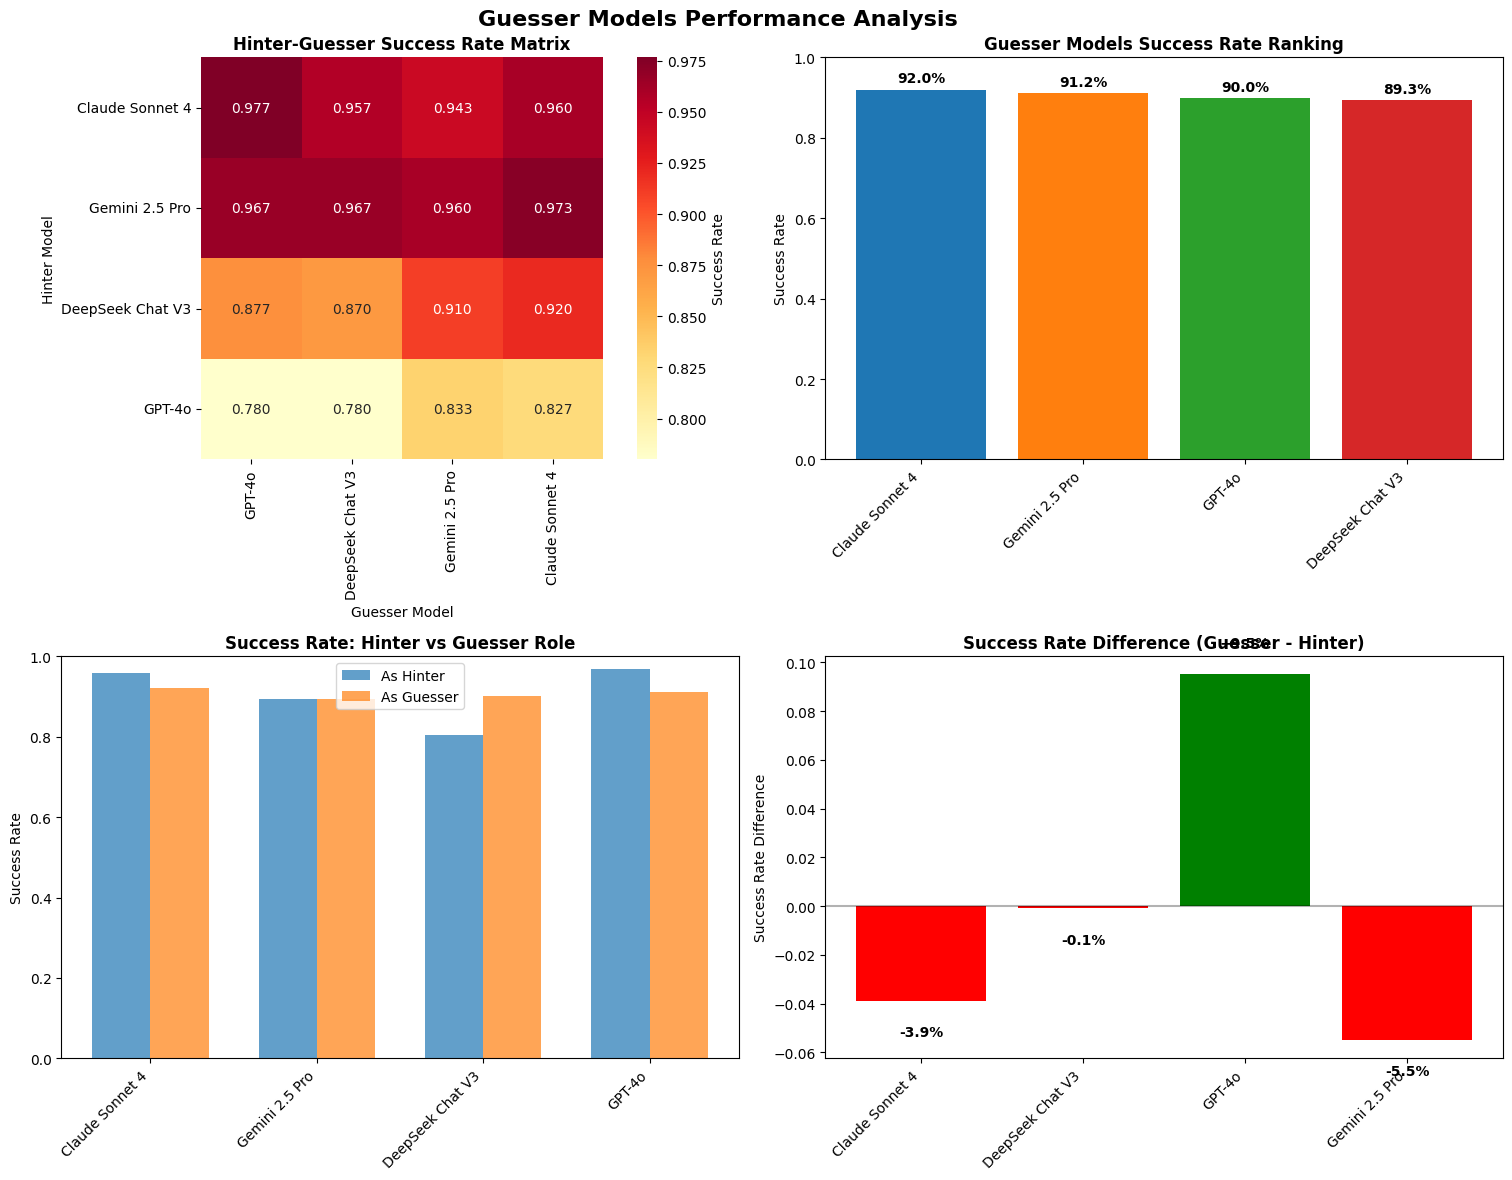


üîç ÂÖ≥ÈîÆÂèëÁé∞:
  ‚Ä¢ ÊúÄ‰Ω≥Guesser: Claude Sonnet 4 (92.0%)
  ‚Ä¢ ÊúÄÂ∑ÆGuesser: DeepSeek Chat V3 (89.3%)
  ‚Ä¢ GuesserÊÄßËÉΩÂ∑ÆË∑ù: 2.7%

üé≠ ËßíËâ≤ÈÄÇÂ∫îÊÄßÂàÜÊûê:
  ‚Ä¢ Claude Sonnet 4: Êõ¥ÈÄÇÂêàHinter (Hinter: 95.9%, Guesser: 92.0%, Â∑ÆÂºÇ: -3.9%)
  ‚Ä¢ Gemini 2.5 Pro: Êõ¥ÈÄÇÂêàHinter (Hinter: 96.7%, Guesser: 91.2%, Â∑ÆÂºÇ: -5.5%)
  ‚Ä¢ DeepSeek Chat V3: Âπ≥Ë°°Âûã (Hinter: 89.4%, Guesser: 89.3%, Â∑ÆÂºÇ: -0.1%)
  ‚Ä¢ GPT-4o: Êõ¥ÈÄÇÂêàGuesser (Hinter: 80.5%, Guesser: 90.0%, Â∑ÆÂºÇ: +9.5%)

üéØ ÊúÄ‰Ω≥Hinter-GuesserÁªÑÂêà:
Top 5 ÊúÄ‰Ω≥ÁªÑÂêà:
  1. Claude Sonnet 4 (Hinter) + GPT-4o (Guesser): 97.7%
  2. Gemini 2.5 Pro (Hinter) + Claude Sonnet 4 (Guesser): 97.3%
  3. Gemini 2.5 Pro (Hinter) + GPT-4o (Guesser): 96.7%
  4. Gemini 2.5 Pro (Hinter) + DeepSeek Chat V3 (Guesser): 96.7%
  5. Claude Sonnet 4 (Hinter) + Claude Sonnet 4 (Guesser): 96.0%
Bottom 5 ÊúÄÂ∑ÆÁªÑÂêà:
  1. DeepSeek Chat V3 (Hinter) + DeepSeek Chat V3 (Guesser): 87.0%
  2. GPT-4o (Hinter) + Gemini 2.5 Pro (Guesser): 

In [3]:
# ÈáçÊñ∞Âä†ËΩΩÊï∞ÊçÆÁî®‰∫éGuesserÁª¥Â∫¶ÂàÜÊûê
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import warnings
warnings.filterwarnings('ignore')

# Â∞ùËØïÂØºÂÖ•ÂèØÈÄâÂ∫ì
try:
    import seaborn as sns
    HAS_SEABORN = True
except ImportError:
    HAS_SEABORN = False

# ËÆæÁΩÆÈ¢úËâ≤
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

# Âä†ËΩΩÊï∞ÊçÆ
print("Âä†ËΩΩÂÆûÈ™åÊï∞ÊçÆ...")
with open('data/dataset.json', 'r', encoding='utf-8') as f:
    dataset = json.load(f)
dataset_df = pd.DataFrame(dataset)

results_df = pd.read_csv('results/taboo_experiment_20250712_004918/complete_experiment_results.csv')

# Ê∏ÖÁêÜÊ®°ÂûãÂêçÁß∞
model_name_mapping = {
    'anthropic/claude-sonnet-4': 'Claude Sonnet 4',
    'openai/gpt-4o': 'GPT-4o',
    'google/gemini-2.5-pro': 'Gemini 2.5 Pro',
    'deepseek/deepseek-chat-v3-0324': 'DeepSeek Chat V3'
}

results_df['hinter_model_clean'] = results_df['hinter_model'].map(model_name_mapping)
results_df['guesser_model_clean'] = results_df['guesser_model'].map(model_name_mapping)

# ÂêàÂπ∂Êï∞ÊçÆ
dataset_info = dataset_df[['target', 'part_of_speech']].copy()
dataset_info = dataset_info.rename(columns={'target': 'target_word'})
merged_df = results_df.merge(dataset_info, on='target_word', how='left')

print(f"‚úÖ Êï∞ÊçÆÂä†ËΩΩÂÆåÊàêÔºÅÊÄªÂÖ± {len(merged_df)} Êù°ËÆ∞ÂΩï")

# Guesser Áª¥Â∫¶ÊÄßËÉΩÂàÜÊûê
print("\nüéØ Guesser Ê®°ÂûãÊÄßËÉΩÂàÜÊûê")
print("="*60)

# 1. ÂàõÂª∫ 4x4 ÊàêÂäüÁéáË°®Ê†º (Hinter x Guesser)
print("\nüìä 4x4 ÊàêÂäüÁéáË°®Ê†º (Hinter vs Guesser)")
print("Ë°åÔºöHinterÊ®°Âûã ‚Üì | ÂàóÔºöGuesserÊ®°Âûã ‚Üí")

# ËÆ°ÁÆóÊØè‰∏™ hinter-guesser ÁªÑÂêàÁöÑÊàêÂäüÁéá
hinter_guesser_success = merged_df.groupby(['hinter_model_clean', 'guesser_model_clean'])['success'].mean().unstack()

# ËÆæÁΩÆÁõ∏ÂèçÁöÑËΩ¥È°∫Â∫è‰ª•‰æøÊõ¥Â•ΩÂú∞ËßÇÂØüÁü©ÈòµÂØπÁß∞ÊÄß
hinter_order = ['Claude Sonnet 4', 'Gemini 2.5 Pro', 'DeepSeek Chat V3', 'GPT-4o']
guesser_order = ['GPT-4o', 'DeepSeek Chat V3', 'Gemini 2.5 Pro', 'Claude Sonnet 4']  # Áõ∏ÂèçÈ°∫Â∫è

# ÈáçÊñ∞ÊéíÂ∫èË°åÂíåÂàó
hinter_guesser_table = hinter_guesser_success.reindex(hinter_order, columns=guesser_order)

print("\nÊàêÂäüÁéáÁü©Èòµ:")
print(hinter_guesser_table.round(3))

print(f"\nüìã Ë°®Ê†ºËØ¥Êòé:")
print(f"‚Ä¢ Ë°åÔºàÁ∫µËΩ¥ÔºâÔºöHinterÊ®°ÂûãÔºàÁªôÊèêÁ§∫ÁöÑÊ®°ÂûãÔºâ")  
print(f"‚Ä¢ ÂàóÔºàÊ®™ËΩ¥ÔºâÔºöGuesserÊ®°ÂûãÔºàÁåúËØçÁöÑÊ®°ÂûãÔºâ")
print(f"‚Ä¢ Êï∞ÂÄºÔºöËØ•Hinter-GuesserÁªÑÂêàÁöÑÊàêÂäüÁéá")
print(f"‚Ä¢ ËΩ¥È°∫Â∫èÁõ∏ÂèçËÆæËÆ°‰æø‰∫éËßÇÂØü‰∏çÂêåÁªÑÂêàÁöÑÂØπÊØîÊïàÊûú")

# 2. Guesser Ê®°ÂûãÊï¥‰ΩìË°®Áé∞
print(f"\nüéØ Guesser Ê®°ÂûãÊï¥‰ΩìË°®Áé∞:")
guesser_overall = merged_df.groupby('guesser_model_clean').agg({
    'success': ['count', 'mean'],
    'turns_used': lambda x: x[merged_df.loc[x.index, 'success']].mean(),
    'has_taboo_violation': 'mean'
}).round(3)

guesser_overall.columns = ['ÊÄªÊ∏∏ÊàèÊï∞', 'ÊàêÂäüÁéá', 'Âπ≥ÂùáËΩÆÊï∞', 'ËøùËßÑÁéá']
guesser_overall = guesser_overall.reindex(hinter_order)

print(guesser_overall)

# 3. ‰∏é Hinter Ë°®Áé∞ÂØπÊØî
print(f"\nüîÑ Hinter vs Guesser Ë°®Áé∞ÂØπÊØî:")
hinter_overall = merged_df.groupby('hinter_model_clean').agg({
    'success': 'mean',
    'turns_used': lambda x: x[merged_df.loc[x.index, 'success']].mean(),
}).round(3)

comparison_table = pd.DataFrame({
    'HinterÊàêÂäüÁéá': hinter_overall['success'],
    'GuesserÊàêÂäüÁéá': guesser_overall['ÊàêÂäüÁéá'],
    'HinterÂπ≥ÂùáËΩÆÊï∞': hinter_overall['turns_used'],
    'GuesserÂπ≥ÂùáËΩÆÊï∞': guesser_overall['Âπ≥ÂùáËΩÆÊï∞']
})

comparison_table['ÊàêÂäüÁéáÂ∑ÆÂºÇ'] = comparison_table['GuesserÊàêÂäüÁéá'] - comparison_table['HinterÊàêÂäüÁéá']
comparison_table['ËΩÆÊï∞Â∑ÆÂºÇ'] = comparison_table['GuesserÂπ≥ÂùáËΩÆÊï∞'] - comparison_table['HinterÂπ≥ÂùáËΩÆÊï∞']

print(comparison_table.round(3))

# 4. ÂèØËßÜÂåñÂàÜÊûê
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Guesser Models Performance Analysis', fontsize=16, fontweight='bold')

# 1. ÊàêÂäüÁéáÁÉ≠ÂäõÂõæ
import numpy as np
if HAS_SEABORN:
    sns.heatmap(hinter_guesser_table, annot=True, cmap='YlOrRd', ax=ax1, 
                cbar_kws={'label': 'Success Rate'}, fmt='.3f', square=True)
else:
    # Matplotlib fallback
    im = ax1.imshow(hinter_guesser_table.values, cmap='YlOrRd', aspect='auto')
    ax1.set_xticks(range(len(hinter_guesser_table.columns)))
    ax1.set_yticks(range(len(hinter_guesser_table.index)))
    ax1.set_xticklabels(hinter_guesser_table.columns, rotation=45, ha='right')
    ax1.set_yticklabels(hinter_guesser_table.index)
    
    # Add text annotations
    for i in range(len(hinter_guesser_table.index)):
        for j in range(len(hinter_guesser_table.columns)):
            if not pd.isna(hinter_guesser_table.iloc[i, j]):
                ax1.text(j, i, f'{hinter_guesser_table.iloc[i, j]:.3f}', 
                        ha='center', va='center', color='white' if hinter_guesser_table.iloc[i, j] < 0.5 else 'black')
    
    plt.colorbar(im, ax=ax1, label='Success Rate')

ax1.set_title('Hinter-Guesser Success Rate Matrix', fontweight='bold')
ax1.set_xlabel('Guesser Model')
ax1.set_ylabel('Hinter Model')

# 2. Guesser ÊàêÂäüÁéáÊéíÂêç
guesser_success_sorted = guesser_overall['ÊàêÂäüÁéá'].sort_values(ascending=False)
bars2 = ax2.bar(range(len(guesser_success_sorted)), guesser_success_sorted.values, 
                color=colors[:len(guesser_success_sorted)])
ax2.set_title('Guesser Models Success Rate Ranking', fontweight='bold')
ax2.set_ylabel('Success Rate')
ax2.set_xticks(range(len(guesser_success_sorted)))
ax2.set_xticklabels(guesser_success_sorted.index, rotation=45, ha='right')
ax2.set_ylim(0, 1)

for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.1%}', ha='center', va='bottom', fontweight='bold')

# 3. Hinter vs Guesser ÊàêÂäüÁéáÂØπÊØî
x_pos = np.arange(len(hinter_order))
width = 0.35

bars3a = ax3.bar(x_pos - width/2, comparison_table['HinterÊàêÂäüÁéá'], width, 
                 label='As Hinter', color=colors[0], alpha=0.7)
bars3b = ax3.bar(x_pos + width/2, comparison_table['GuesserÊàêÂäüÁéá'], width,
                 label='As Guesser', color=colors[1], alpha=0.7)

ax3.set_title('Success Rate: Hinter vs Guesser Role', fontweight='bold')
ax3.set_ylabel('Success Rate')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(hinter_order, rotation=45, ha='right')
ax3.legend()
ax3.set_ylim(0, 1)

# 4. ËßíËâ≤Â∑ÆÂºÇÂàÜÊûê
ax4.bar(range(len(comparison_table)), comparison_table['ÊàêÂäüÁéáÂ∑ÆÂºÇ'], 
        color=['green' if x > 0 else 'red' for x in comparison_table['ÊàêÂäüÁéáÂ∑ÆÂºÇ']])
ax4.set_title('Success Rate Difference (Guesser - Hinter)', fontweight='bold')
ax4.set_ylabel('Success Rate Difference')
ax4.set_xticks(range(len(comparison_table)))
ax4.set_xticklabels(comparison_table.index, rotation=45, ha='right')
ax4.axhline(y=0, color='black', linestyle='-', alpha=0.3)

for i, diff in enumerate(comparison_table['ÊàêÂäüÁéáÂ∑ÆÂºÇ']):
    ax4.text(i, diff + (0.01 if diff > 0 else -0.01), f'{diff:+.1%}', 
             ha='center', va='bottom' if diff > 0 else 'top', fontweight='bold')

plt.tight_layout()
plt.show()

# 5. ÂÖ≥ÈîÆÂèëÁé∞ÊÄªÁªì
print(f"\nüîç ÂÖ≥ÈîÆÂèëÁé∞:")

# ÊâæÂá∫ÊúÄ‰Ω≥ÂíåÊúÄÂ∑ÆÁöÑ guesser
best_guesser = guesser_overall['ÊàêÂäüÁéá'].idxmax()
worst_guesser = guesser_overall['ÊàêÂäüÁéá'].idxmin()
best_rate = guesser_overall.loc[best_guesser, 'ÊàêÂäüÁéá']
worst_rate = guesser_overall.loc[worst_guesser, 'ÊàêÂäüÁéá']

print(f"  ‚Ä¢ ÊúÄ‰Ω≥Guesser: {best_guesser} ({best_rate:.1%})")
print(f"  ‚Ä¢ ÊúÄÂ∑ÆGuesser: {worst_guesser} ({worst_rate:.1%})")
print(f"  ‚Ä¢ GuesserÊÄßËÉΩÂ∑ÆË∑ù: {best_rate - worst_rate:.1%}")

# ÂàÜÊûêËßíËâ≤ÈÄÇÂ∫îÊÄß
print(f"\nüé≠ ËßíËâ≤ÈÄÇÂ∫îÊÄßÂàÜÊûê:")
for model in hinter_order:
    hinter_rate = comparison_table.loc[model, 'HinterÊàêÂäüÁéá']
    guesser_rate = comparison_table.loc[model, 'GuesserÊàêÂäüÁéá']
    diff = comparison_table.loc[model, 'ÊàêÂäüÁéáÂ∑ÆÂºÇ']
    
    if abs(diff) < 0.02:
        role_pref = "Âπ≥Ë°°Âûã"
    elif diff > 0:
        role_pref = "Êõ¥ÈÄÇÂêàGuesser"
    else:
        role_pref = "Êõ¥ÈÄÇÂêàHinter"
    
    print(f"  ‚Ä¢ {model}: {role_pref} (Hinter: {hinter_rate:.1%}, Guesser: {guesser_rate:.1%}, Â∑ÆÂºÇ: {diff:+.1%})")

# ÊúÄ‰Ω≥ÁªÑÂêàÂàÜÊûê
print(f"\nüéØ ÊúÄ‰Ω≥Hinter-GuesserÁªÑÂêà:")
best_combinations = []
for hinter in hinter_order:
    for guesser in guesser_order:
        if not pd.isna(hinter_guesser_table.loc[hinter, guesser]):
            best_combinations.append((hinter, guesser, hinter_guesser_table.loc[hinter, guesser]))

best_combinations.sort(key=lambda x: x[2], reverse=True)

print("Top 5 ÊúÄ‰Ω≥ÁªÑÂêà:")
for i, (hinter, guesser, rate) in enumerate(best_combinations[:5], 1):
    print(f"  {i}. {hinter} (Hinter) + {guesser} (Guesser): {rate:.1%}")

print("Bottom 5 ÊúÄÂ∑ÆÁªÑÂêà:")
for i, (hinter, guesser, rate) in enumerate(best_combinations[-5:], 1):
    print(f"  {i}. {hinter} (Hinter) + {guesser} (Guesser): {rate:.1%}")

print(f"\n‚úÖ Guesser Áª¥Â∫¶ÂàÜÊûêÂÆåÊàêÔºÅ")


üîç ÂºÄÂßãBERTËØ≠‰πâÁõ∏‰ººÂ∫¶ÂàÜÊûê...
‚úÖ ‰ΩøÁî®MPSÂä†ÈÄü
‚úÖ BERTÊ®°ÂûãÂ∑≤Âä†ËΩΩÂà∞ mps
‚úÖ Êï∞ÊçÆÂä†ËΩΩÂÆåÊàê: 4800 Êù°ËÆ∞ÂΩï
üìä ÊèêÂèñÁåúÊµãÊï∞ÊçÆ...
Â§ÑÁêÜËøõÂ∫¶: 0/4800
Â§ÑÁêÜËøõÂ∫¶: 100/4800
Â§ÑÁêÜËøõÂ∫¶: 200/4800
Â§ÑÁêÜËøõÂ∫¶: 300/4800
Â§ÑÁêÜËøõÂ∫¶: 400/4800
Â§ÑÁêÜËøõÂ∫¶: 500/4800
Â§ÑÁêÜËøõÂ∫¶: 600/4800
Â§ÑÁêÜËøõÂ∫¶: 700/4800
Â§ÑÁêÜËøõÂ∫¶: 800/4800
Â§ÑÁêÜËøõÂ∫¶: 900/4800
Â§ÑÁêÜËøõÂ∫¶: 1000/4800
Â§ÑÁêÜËøõÂ∫¶: 1100/4800
Â§ÑÁêÜËøõÂ∫¶: 1200/4800
Â§ÑÁêÜËøõÂ∫¶: 1300/4800
Â§ÑÁêÜËøõÂ∫¶: 1400/4800
Â§ÑÁêÜËøõÂ∫¶: 1500/4800
Â§ÑÁêÜËøõÂ∫¶: 1600/4800
Â§ÑÁêÜËøõÂ∫¶: 1700/4800
Â§ÑÁêÜËøõÂ∫¶: 1800/4800
Â§ÑÁêÜËøõÂ∫¶: 1900/4800
Â§ÑÁêÜËøõÂ∫¶: 2000/4800
Â§ÑÁêÜËøõÂ∫¶: 2100/4800
Â§ÑÁêÜËøõÂ∫¶: 2200/4800
Â§ÑÁêÜËøõÂ∫¶: 2300/4800
Â§ÑÁêÜËøõÂ∫¶: 2400/4800
Â§ÑÁêÜËøõÂ∫¶: 2500/4800
Â§ÑÁêÜËøõÂ∫¶: 2600/4800
Â§ÑÁêÜËøõÂ∫¶: 2700/4800
Â§ÑÁêÜËøõÂ∫¶: 2800/4800
Â§ÑÁêÜËøõÂ∫¶: 2900/4800
Â§ÑÁêÜËøõÂ∫¶: 3000/4800
Â§ÑÁêÜËøõÂ∫¶: 3100/4800
Â§ÑÁêÜËøõÂ∫¶: 3200/4800
Â§ÑÁêÜËøõÂ∫¶: 3300/4800
Â§ÑÁêÜËøõÂ∫¶: 3400/4800
Â§ÑÁêÜËøõÂ∫¶: 3

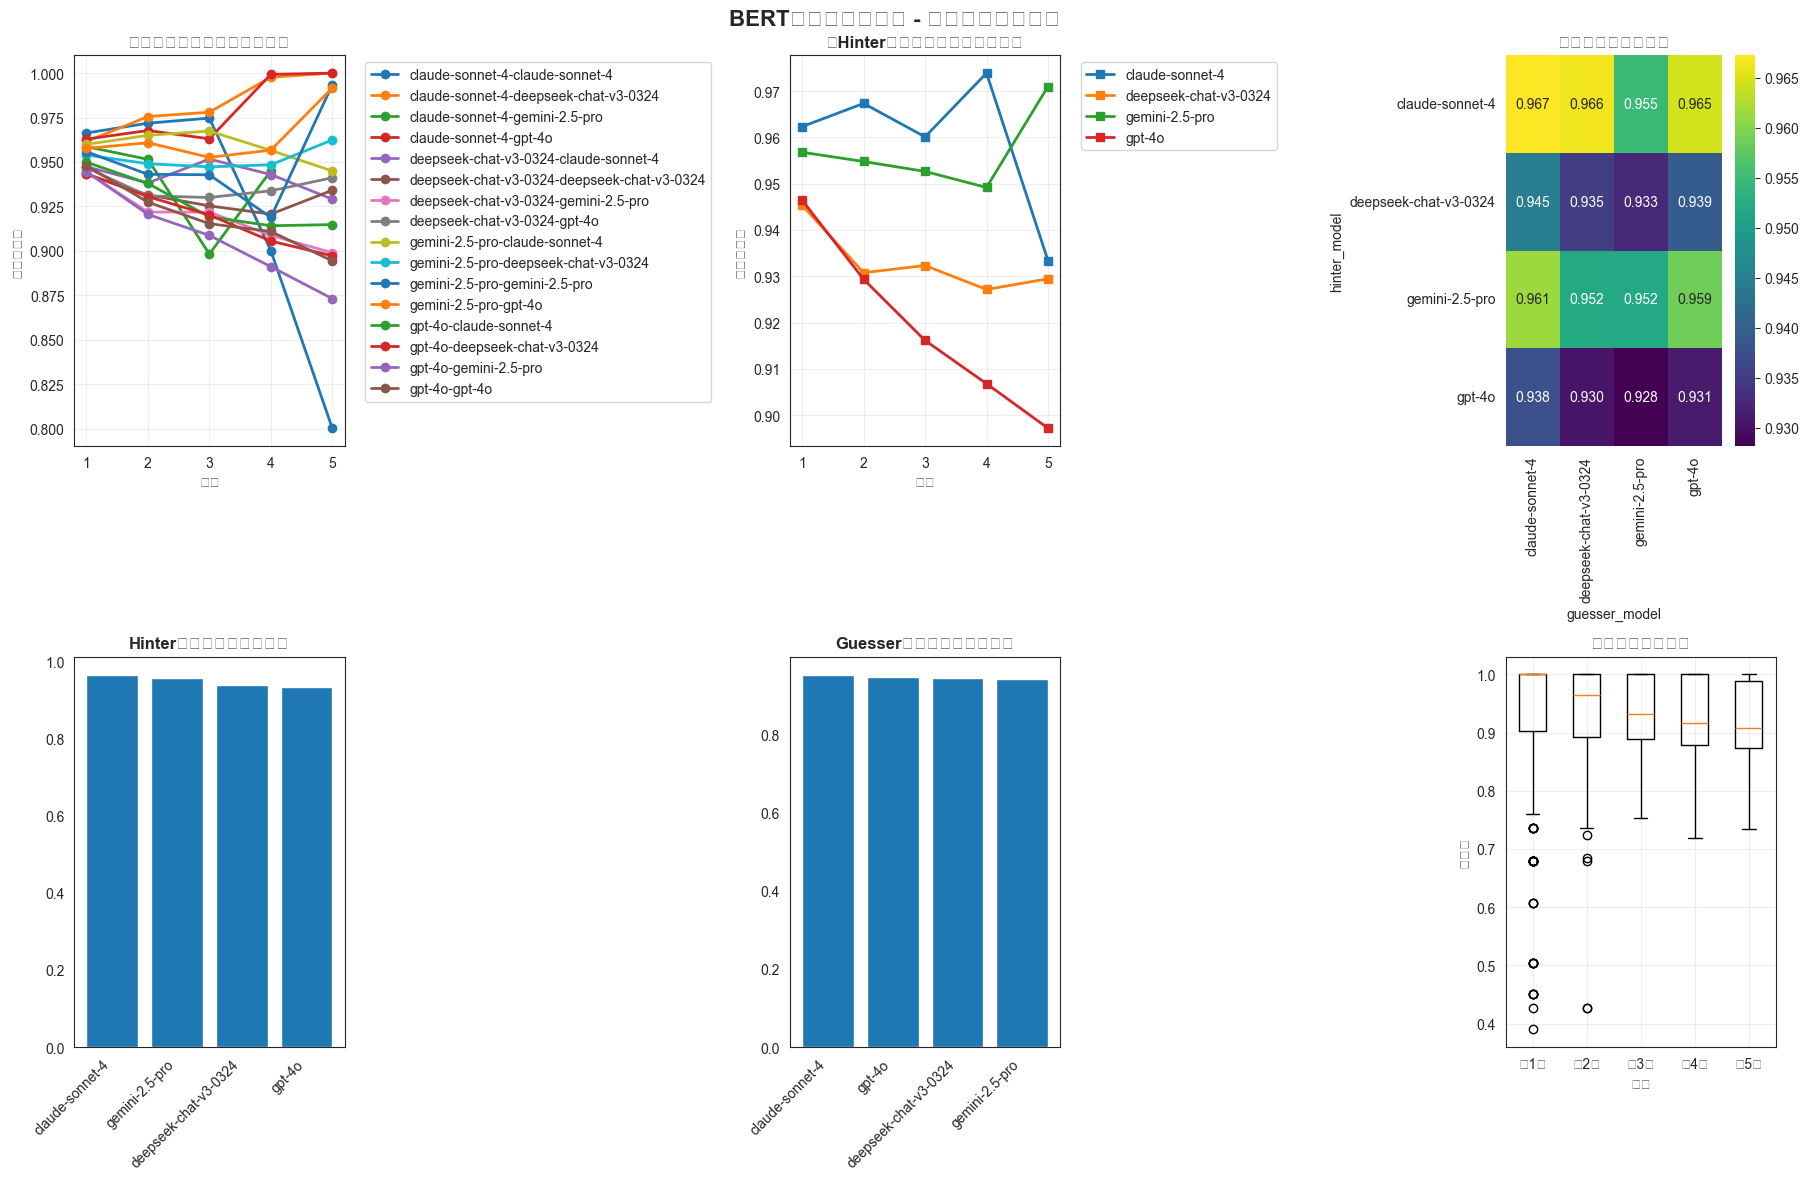


          BERTËØ≠‰πâÁõ∏‰ººÂ∫¶ÂàÜÊûêÊä•Âëä - Â§öÊ®°ÂûãÂ§öËΩÆÊ¨°ÁâàÊú¨

üìä Âü∫Á°ÄÁªüËÆ°:
  ‚Ä¢ ÊÄªÁåúÊµãÊï∞: 8,243
  ‚Ä¢ Âπ≥ÂùáÁõ∏‰ººÂ∫¶: 0.9454

ü§ñ Ê®°ÂûãÂØπÂàÜÊûê:
  ‚Ä¢ gpt-4o-gpt-4o: Áõ∏‰ººÂ∫¶ 0.9311, ÊàêÂäüÁéá 0.5793 (618 Ê¨°)
  ‚Ä¢ gpt-4o-gemini-2.5-pro: Áõ∏‰ººÂ∫¶ 0.9282, ÊàêÂäüÁéá 0.6992 (532 Ê¨°)
  ‚Ä¢ gpt-4o-deepseek-chat-v3-0324: Áõ∏‰ººÂ∫¶ 0.9302, ÊàêÂäüÁéá 0.6006 (626 Ê¨°)
  ‚Ä¢ gpt-4o-claude-sonnet-4: Áõ∏‰ººÂ∫¶ 0.9378, ÊàêÂäüÁéá 0.6627 (590 Ê¨°)
  ‚Ä¢ gemini-2.5-pro-gpt-4o: Áõ∏‰ººÂ∫¶ 0.9586, ÊàêÂäüÁéá 0.9513 (472 Ê¨°)
  ‚Ä¢ gemini-2.5-pro-gemini-2.5-pro: Áõ∏‰ººÂ∫¶ 0.9518, ÊàêÂäüÁéá 0.9571 (420 Ê¨°)
  ‚Ä¢ gemini-2.5-pro-deepseek-chat-v3-0324: Áõ∏‰ººÂ∫¶ 0.9520, ÊàêÂäüÁéá 0.9417 (515 Ê¨°)
  ‚Ä¢ gemini-2.5-pro-claude-sonnet-4: Áõ∏‰ººÂ∫¶ 0.9614, ÊàêÂäüÁéá 0.9607 (458 Ê¨°)
  ‚Ä¢ deepseek-chat-v3-0324-gpt-4o: Áõ∏‰ººÂ∫¶ 0.9394, ÊàêÂäüÁéá 0.7732 (604 Ê¨°)
  ‚Ä¢ deepseek-chat-v3-0324-gemini-2.5-pro: Áõ∏‰ººÂ∫¶ 0.9326, ÊàêÂäüÁéá 0.8346 (538 Ê¨°)
  ‚Ä¢ deepseek-chat-v3-0324-deepseek-

In [3]:
# BERTËØ≠‰πâÁõ∏‰ººÂ∫¶ÂàÜÊûê - Â§öÊ®°ÂûãÂ§öËΩÆÊ¨°ÁâàÊú¨
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity
import json
import warnings
warnings.filterwarnings('ignore')

# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

class BERTSimilarityAnalyzer:
    """BERTËØ≠‰πâÁõ∏‰ººÂ∫¶ÂàÜÊûêÂô®"""
    
    def __init__(self, model_name='bert-base-chinese'):
        """ÂàùÂßãÂåñBERTÊ®°Âûã"""
        # Â∞ÜÂéüÊù•ÁöÑËøôË°åÔºö

        # ÊõøÊç¢‰∏∫Ôºö
        if torch.backends.mps.is_available():
            self.device = torch.device('mps')
            print("‚úÖ ‰ΩøÁî®MPSÂä†ÈÄü")
        elif torch.cuda.is_available():
            self.device = torch.device('cuda')
            print("‚úÖ ‰ΩøÁî®CUDAÂä†ÈÄü")
        else:
            self.device = torch.device('cpu')
            print("‚ö†Ô∏è ‰ΩøÁî®CPUÔºåÂª∫ËÆÆ‰ΩøÁî®GPUÂä†ÈÄü")
        self.tokenizer = BertTokenizer.from_pretrained(model_name)
        self.model = BertModel.from_pretrained(model_name)
        self.model.to(self.device)
        self.model.eval()
        print(f"‚úÖ BERTÊ®°ÂûãÂ∑≤Âä†ËΩΩÂà∞ {self.device}")
    
    def get_embedding(self, text, max_length=10):
        """Ëé∑ÂèñÊñáÊú¨ÁöÑBERTÂµåÂÖ•ÂêëÈáè"""
        try:
            inputs = self.tokenizer(
                text, 
                return_tensors='pt', 
                truncation=True, 
                max_length=max_length,
                padding=True
            )
            inputs = {k: v.to(self.device) for k, v in inputs.items()}
            
            with torch.no_grad():
                outputs = self.model(**inputs)
                embedding = outputs.last_hidden_state[:, 0, :].cpu().numpy()
            
            return embedding
        except Exception as e:
            print(f"Ëé∑ÂèñÂµåÂÖ•ÂêëÈáèÂ§±Ë¥•: {text}, ÈîôËØØ: {e}")
            return np.zeros((1, 768))
    
    def calculate_similarity(self, text1, text2):
        """ËÆ°ÁÆó‰∏§‰∏™ÊñáÊú¨ÁöÑ‰ΩôÂº¶Áõ∏‰ººÂ∫¶"""
        emb1 = self.get_embedding(text1)
        emb2 = self.get_embedding(text2)
        similarity = cosine_similarity(emb1, emb2)[0][0]
        return similarity
    
    def analyze_game_similarities(self, game_data):
        """ÂàÜÊûêÂçïÂú∫Ê∏∏ÊàèÁöÑÁõ∏‰ººÂ∫¶ÂèòÂåñ"""
        target_word = game_data['target_word']
        all_guesses = game_data['all_guesses']
        
        similarities = []
        for i, guess in enumerate(all_guesses):
            similarity = self.calculate_similarity(guess, target_word)
            similarities.append({
                'turn_number': i + 1,
                'guess': guess,
                'target': target_word,
                'similarity': similarity
            })
        
        return similarities

def load_experiment_data():
    """Âä†ËΩΩÂÆûÈ™åÊï∞ÊçÆ"""
    try:
        with open('data/dataset.json', 'r', encoding='utf-8') as f:
            dataset = json.load(f)
        
        results_df = pd.read_csv('results/taboo_experiment_20250712_004918/complete_experiment_results.csv')
        
        dataset_df = pd.DataFrame(dataset)
        dataset_info = dataset_df[['target', 'part_of_speech']].copy()
        dataset_info = dataset_info.rename(columns={'target': 'target_word'})
        
        merged_df = results_df.merge(dataset_info, on='target_word', how='left')
        
        print(f"‚úÖ Êï∞ÊçÆÂä†ËΩΩÂÆåÊàê: {len(merged_df)} Êù°ËÆ∞ÂΩï")
        return merged_df
    except Exception as e:
        print(f"‚ùå Êï∞ÊçÆÂä†ËΩΩÂ§±Ë¥•: {e}")
        return None

import re

def extract_guesses_from_all_guesses(all_guesses_str):
    """‰ªéall_guessesÂ≠óÊÆµÊèêÂèñÊØèËΩÆÁåúÊµãËØç"""
    if pd.isna(all_guesses_str):
        return []
    items = all_guesses_str.split('|')
    guesses = []
    for item in items:
        match = re.search(r'\[GUESS\]\s*(.+)', item)
        if match:
            guess = match.group(1).strip()
            if guess and guess not in ['INVALID_FORMAT', 'FORMAT_ERROR']:
                guesses.append(guess)
    return guesses

def run_bert_similarity_analysis():
    """ËøêË°åBERTÁõ∏‰ººÂ∫¶ÂàÜÊûêÔºàÊîØÊåÅÂ§öÊ®°ÂûãÂ§öËΩÆÊ¨°ÂàÜÊûêÔºâ"""
    print("üîç ÂºÄÂßãBERTËØ≠‰πâÁõ∏‰ººÂ∫¶ÂàÜÊûê...")
    
    analyzer = BERTSimilarityAnalyzer()
    merged_df = load_experiment_data()
    if merged_df is None:
        return None
    
    print("üìä ÊèêÂèñÁåúÊµãÊï∞ÊçÆ...")
    game_analyses = []
    
    for idx, row in merged_df.iterrows():
        if idx % 100 == 0:
            print(f"Â§ÑÁêÜËøõÂ∫¶: {idx}/{len(merged_df)}")
        
        guesses = extract_guesses_from_all_guesses(row['all_guesses'])
        
        if guesses:
            similarities = analyzer.analyze_game_similarities({
                'target_word': row['target_word'],
                'all_guesses': guesses
            })
            for sim in similarities:
                # ‰øÆÊ≠£Â≠óÊÆµÂêçÔºö‰ΩøÁî®ÂÆûÈôÖÁöÑCSVÂ≠óÊÆµÂêç
                hinter_model = row.get('hinter_model', 'Unknown')
                guesser_model = row.get('guesser_model', 'Unknown')
                
                # Ê∏ÖÁêÜÊ®°ÂûãÂêçÁß∞ÔºàÂéªÊéâopenai/ÂâçÁºÄÁ≠âÔºâ
                if isinstance(hinter_model, str) and '/' in hinter_model:
                    hinter_model = hinter_model.split('/')[-1]
                if isinstance(guesser_model, str) and '/' in guesser_model:
                    guesser_model = guesser_model.split('/')[-1]
                
                sim.update({
                    'game_id': row.get('game_id', f'game_{idx}'),
                    'hinter_model': hinter_model,
                    'guesser_model': guesser_model,
                    'model_pair': f"{hinter_model}-{guesser_model}",
                    'success': row.get('success', False),
                    'turns_used': row.get('turns_used', 0),
                    'part_of_speech': row.get('part_of_speech', 'unknown'),
                    'category': row.get('category', 'unknown')
                })
            game_analyses.extend(similarities)
    
    if game_analyses:
        similarity_df = pd.DataFrame(game_analyses)
        print(f"‚úÖ Áõ∏‰ººÂ∫¶ÂàÜÊûêÂÆåÊàê: {len(similarity_df)} Êù°ËÆ∞ÂΩï")
        return similarity_df
    else:
        print("‚ùå Ê≤°ÊúâÊâæÂà∞ÊúâÊïàÁöÑÁåúÊµãÊï∞ÊçÆ")
        return None

def analyze_multi_model_similarity_trends(similarity_df):
    """ÂàÜÊûêÂ§öÊ®°ÂûãÂ§öËΩÆÊ¨°Áõ∏‰ººÂ∫¶Ë∂ãÂäø"""
    if similarity_df is None or len(similarity_df) == 0:
        print("‚ùå Ê≤°ÊúâÊï∞ÊçÆÂèØ‰æõÂàÜÊûê")
        return None
    
    print("\nüîç Â§öÊ®°ÂûãÂ§öËΩÆÊ¨°Áõ∏‰ººÂ∫¶Ë∂ãÂäøÂàÜÊûê")
    
    # ÊåâÊ®°ÂûãÂØπÂíåËΩÆÊï∞ÂàÜÊûê
    model_turn_similarity = similarity_df.groupby(['model_pair', 'turn_number'])['similarity'].agg(['mean', 'std', 'count']).round(4)
    print("\nÂêÑÊ®°ÂûãÂØπÂêÑËΩÆÂπ≥ÂùáÁõ∏‰ººÂ∫¶:")
    print(model_turn_similarity)
    
    # ÊåâHinterÊ®°ÂûãÂíåËΩÆÊï∞ÂàÜÊûê
    hinter_turn_similarity = similarity_df.groupby(['hinter_model', 'turn_number'])['similarity'].agg(['mean', 'std', 'count']).round(4)
    print("\nÂêÑHinterÊ®°ÂûãÂêÑËΩÆÂπ≥ÂùáÁõ∏‰ººÂ∫¶:")
    print(hinter_turn_similarity)
    
    # ÊåâGuesserÊ®°ÂûãÂíåËΩÆÊï∞ÂàÜÊûê
    guesser_turn_similarity = similarity_df.groupby(['guesser_model', 'turn_number'])['similarity'].agg(['mean', 'std', 'count']).round(4)
    print("\nÂêÑGuesserÊ®°ÂûãÂêÑËΩÆÂπ≥ÂùáÁõ∏‰ººÂ∫¶:")
    print(guesser_turn_similarity)
    
    return {
        'model_turn': model_turn_similarity,
        'hinter_turn': hinter_turn_similarity,
        'guesser_turn': guesser_turn_similarity
    }

def visualize_multi_model_similarity_analysis(similarity_df):
    """ÂèØËßÜÂåñÂ§öÊ®°ÂûãÂ§öËΩÆÊ¨°Áõ∏‰ººÂ∫¶ÂàÜÊûê"""
    if similarity_df is None or len(similarity_df) == 0:
        print("‚ùå Ê≤°ÊúâÊï∞ÊçÆÂèØ‰æõÂèØËßÜÂåñ")
        return
    
    sns.set_style("white")
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('BERTËØ≠‰πâÁõ∏‰ººÂ∫¶ÂàÜÊûê - Â§öÊ®°ÂûãÂ§öËΩÆÊ¨°ÂØπÊØî', fontsize=16, fontweight='bold')
    
    # 1. ÂêÑÊ®°ÂûãÂØπÊåâËΩÆÊï∞ÁöÑÁõ∏‰ººÂ∫¶ÂèòÂåñ
    model_turn_data = similarity_df.groupby(['model_pair', 'turn_number'])['similarity'].mean().unstack(level=0)
    model_turn_data.plot(kind='line', ax=axes[0, 0], marker='o', linewidth=2)
    axes[0, 0].set_title('ÂêÑÊ®°ÂûãÂØπÊåâËΩÆÊï∞ÁöÑÁõ∏‰ººÂ∫¶ÂèòÂåñ', fontweight='bold')
    axes[0, 0].set_xlabel('ËΩÆÊï∞')
    axes[0, 0].set_ylabel('Âπ≥ÂùáÁõ∏‰ººÂ∫¶')
    axes[0, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. HinterÊ®°ÂûãÊåâËΩÆÊï∞ÁöÑÁõ∏‰ººÂ∫¶ÂèòÂåñ
    hinter_turn_data = similarity_df.groupby(['hinter_model', 'turn_number'])['similarity'].mean().unstack(level=0)
    hinter_turn_data.plot(kind='line', ax=axes[0, 1], marker='s', linewidth=2)
    axes[0, 1].set_title('ÂêÑHinterÊ®°ÂûãÊåâËΩÆÊï∞ÁöÑÁõ∏‰ººÂ∫¶ÂèòÂåñ', fontweight='bold')
    axes[0, 1].set_xlabel('ËΩÆÊï∞')
    axes[0, 1].set_ylabel('Âπ≥ÂùáÁõ∏‰ººÂ∫¶')
    axes[0, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Ê®°ÂûãÂØπÁõ∏‰ººÂ∫¶ÁÉ≠ÂäõÂõæ
    heatmap_data = similarity_df.groupby(['hinter_model', 'guesser_model'])['similarity'].mean().unstack()
    sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='viridis', ax=axes[0, 2])
    axes[0, 2].set_title('Ê®°ÂûãÂØπÁõ∏‰ººÂ∫¶ÁÉ≠ÂäõÂõæ', fontweight='bold')
    
    # 4. HinterÊ®°ÂûãÊï¥‰ΩìË°®Áé∞ÂØπÊØî
    hinter_means = similarity_df.groupby('hinter_model')['similarity'].mean().sort_values(ascending=False)
    bars = axes[1, 0].bar(range(len(hinter_means)), hinter_means.values)
    axes[1, 0].set_title('HinterÊ®°ÂûãÂπ≥ÂùáÁõ∏‰ººÂ∫¶ÂØπÊØî', fontweight='bold')
    axes[1, 0].set_xticks(range(len(hinter_means)))
    axes[1, 0].set_xticklabels(hinter_means.index, rotation=45, ha='right')
    
    # 5. GuesserÊ®°ÂûãÊï¥‰ΩìË°®Áé∞ÂØπÊØî
    guesser_means = similarity_df.groupby('guesser_model')['similarity'].mean().sort_values(ascending=False)
    bars = axes[1, 1].bar(range(len(guesser_means)), guesser_means.values)
    axes[1, 1].set_title('GuesserÊ®°ÂûãÂπ≥ÂùáÁõ∏‰ººÂ∫¶ÂØπÊØî', fontweight='bold')
    axes[1, 1].set_xticks(range(len(guesser_means)))
    axes[1, 1].set_xticklabels(guesser_means.index, rotation=45, ha='right')
    
    # 6. ÂêÑËΩÆÊ¨°Êï¥‰ΩìÁõ∏‰ººÂ∫¶ÂàÜÂ∏É
    turn_data = [similarity_df[similarity_df['turn_number'] == turn]['similarity'].values 
                 for turn in sorted(similarity_df['turn_number'].unique())]
    turn_labels = [f'Á¨¨{turn}ËΩÆ' for turn in sorted(similarity_df['turn_number'].unique())]
    
    axes[1, 2].boxplot(turn_data, labels=turn_labels)
    axes[1, 2].set_title('ÂêÑËΩÆÊ¨°Áõ∏‰ººÂ∫¶ÂàÜÂ∏É', fontweight='bold')
    axes[1, 2].set_xlabel('ËΩÆÊ¨°')
    axes[1, 2].set_ylabel('Áõ∏‰ººÂ∫¶')
    axes[1, 2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def generate_multi_model_similarity_report(similarity_df):
    """ÁîüÊàêÂ§öÊ®°ÂûãÂ§öËΩÆÊ¨°Áõ∏‰ººÂ∫¶ÂàÜÊûêÊä•Âëä"""
    if similarity_df is None or len(similarity_df) == 0:
        print("‚ùå Ê≤°ÊúâÊï∞ÊçÆÂèØ‰æõÂàÜÊûê")
        return
    
    print("\n" + "="*80)
    print("          BERTËØ≠‰πâÁõ∏‰ººÂ∫¶ÂàÜÊûêÊä•Âëä - Â§öÊ®°ÂûãÂ§öËΩÆÊ¨°ÁâàÊú¨")
    print("="*80)
    
    # Âü∫Á°ÄÁªüËÆ°
    total_guesses = len(similarity_df)
    avg_similarity = similarity_df['similarity'].mean()
    
    print(f"\nüìä Âü∫Á°ÄÁªüËÆ°:")
    print(f"  ‚Ä¢ ÊÄªÁåúÊµãÊï∞: {total_guesses:,}")
    print(f"  ‚Ä¢ Âπ≥ÂùáÁõ∏‰ººÂ∫¶: {avg_similarity:.4f}")
    
    # Ê®°ÂûãÂØπÂàÜÊûê
    print(f"\nü§ñ Ê®°ÂûãÂØπÂàÜÊûê:")
    for model_pair in similarity_df['model_pair'].unique():
        data = similarity_df[similarity_df['model_pair'] == model_pair]
        avg_sim = data['similarity'].mean()
        count = len(data)
        success_rate = data['success'].mean()
        print(f"  ‚Ä¢ {model_pair}: Áõ∏‰ººÂ∫¶ {avg_sim:.4f}, ÊàêÂäüÁéá {success_rate:.4f} ({count} Ê¨°)")
    
    # ËΩÆÊï∞ÂàÜÊûê
    print(f"\nüìà ËΩÆÊï∞ÂàÜÊûê:")
    for turn in sorted(similarity_df['turn_number'].unique()):
        turn_data = similarity_df[similarity_df['turn_number'] == turn]
        avg_sim = turn_data['similarity'].mean()
        count = len(turn_data)
        print(f"  ‚Ä¢ Á¨¨{turn}ËΩÆ: Âπ≥ÂùáÁõ∏‰ººÂ∫¶ {avg_sim:.4f} ({count} Ê¨°ÁåúÊµã)")
    
    print("\n" + "="*80)

def save_multi_model_similarity_results(similarity_df, analysis_results):
    """‰øùÂ≠òÂ§öÊ®°ÂûãÁõ∏‰ººÂ∫¶ÂàÜÊûêÁªìÊûú"""
    if similarity_df is not None:
        similarity_df.to_csv('bert_multi_model_similarity_analysis.csv', index=False, encoding='utf-8')
        print(f"‚úÖ Áõ∏‰ººÂ∫¶ÂàÜÊûêÁªìÊûúÂ∑≤‰øùÂ≠ò")
        
        if analysis_results:
            with pd.ExcelWriter('bert_multi_model_stats.xlsx') as writer:
                analysis_results['model_turn'].to_excel(writer, sheet_name='Ê®°ÂûãÂØπËΩÆÊï∞ÁªüËÆ°')
                analysis_results['hinter_turn'].to_excel(writer, sheet_name='HinterËΩÆÊï∞ÁªüËÆ°')
                analysis_results['guesser_turn'].to_excel(writer, sheet_name='GuesserËΩÆÊï∞ÁªüËÆ°')
            print(f"‚úÖ ÁªüËÆ°ÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞ExcelÊñá‰ª∂")

# ‰∏ªÂáΩÊï∞
if __name__ == "__main__":
    # ËøêË°åBERTÁõ∏‰ººÂ∫¶ÂàÜÊûê
    similarity_df = run_bert_similarity_analysis()
    
    if similarity_df is not None:
        # ÂàÜÊûêË∂ãÂäø
        analysis_results = analyze_multi_model_similarity_trends(similarity_df)
        
        # ÂèØËßÜÂåñÂàÜÊûê
        visualize_multi_model_similarity_analysis(similarity_df)
        
        # ÁîüÊàêÊä•Âëä
        generate_multi_model_similarity_report(similarity_df)
        
        # ‰øùÂ≠òÁªìÊûú
        save_multi_model_similarity_results(similarity_df, analysis_results)
        
        print("üéâ BERTÂ§öÊ®°ÂûãÂ§öËΩÆÊ¨°ËØ≠‰πâÁõ∏‰ººÂ∫¶ÂàÜÊûêÂÆåÊàêÔºÅ")
    else:
        print("‚ùå ÂàÜÊûêÂ§±Ë¥•ÔºåËØ∑Ê£ÄÊü•Êï∞ÊçÆÊñá‰ª∂")


üîç Starting BERT similarity result analysis...
‚úÖ Successfully loaded BERT similarity results: 8243 records
Data columns: ['turn_number', 'guess', 'target', 'similarity', 'game_id', 'hinter_model', 'guesser_model', 'model_pair', 'success', 'turns_used', 'part_of_speech', 'category']

üìä Basic Statistics:
  ‚Ä¢ Total guesses: 8,243
  ‚Ä¢ Average similarity: 0.9454
  ‚Ä¢ Similarity range: 0.3899 - 1.0000
  ‚Ä¢ Number of model pairs: 16
  ‚Ä¢ Model pairs: ['gpt-4o-gpt-4o', 'gpt-4o-gemini-2.5-pro', 'gpt-4o-deepseek-chat-v3-0324', 'gpt-4o-claude-sonnet-4', 'gemini-2.5-pro-gpt-4o', 'gemini-2.5-pro-gemini-2.5-pro', 'gemini-2.5-pro-deepseek-chat-v3-0324', 'gemini-2.5-pro-claude-sonnet-4', 'deepseek-chat-v3-0324-gpt-4o', 'deepseek-chat-v3-0324-gemini-2.5-pro', 'deepseek-chat-v3-0324-deepseek-chat-v3-0324', 'deepseek-chat-v3-0324-claude-sonnet-4', 'claude-sonnet-4-gpt-4o', 'claude-sonnet-4-gemini-2.5-pro', 'claude-sonnet-4-deepseek-chat-v3-0324', 'claude-sonnet-4-claude-sonnet-4']

üîç Mod

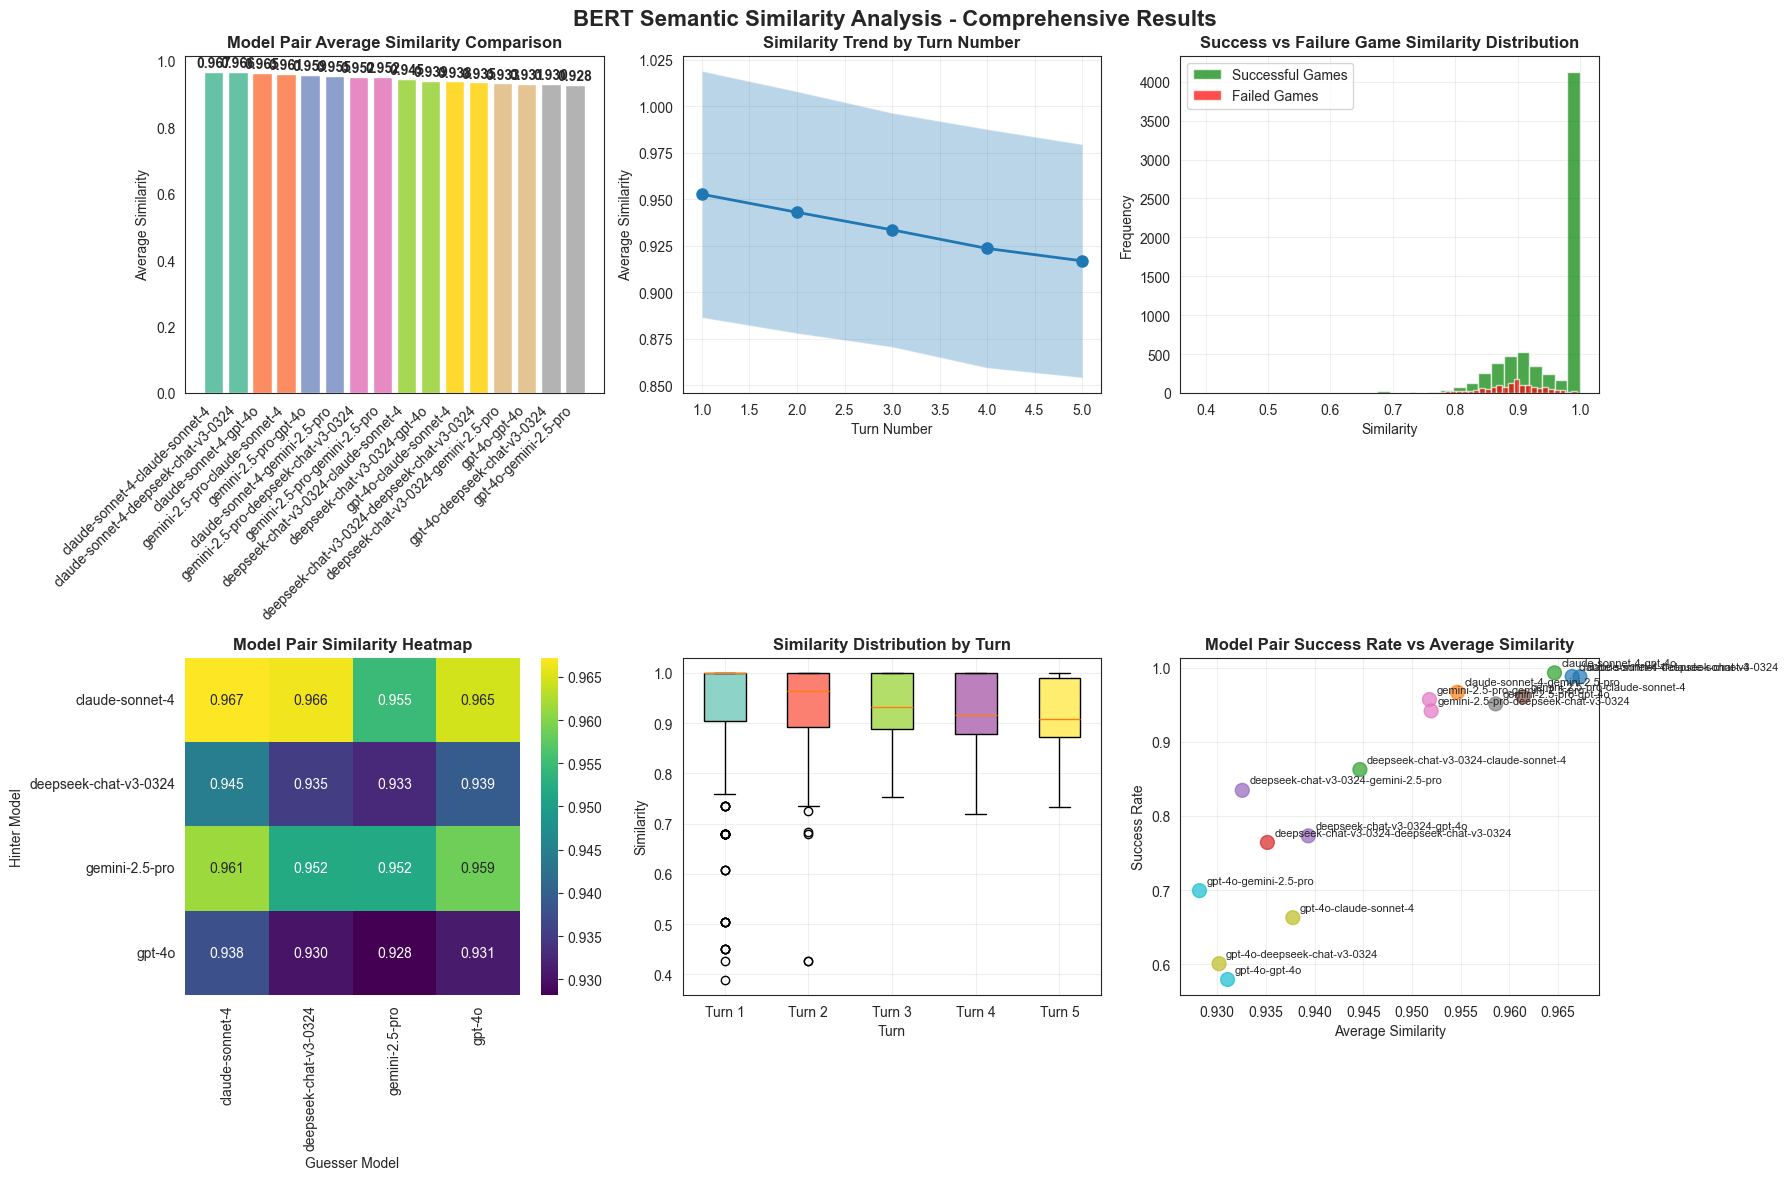


                    BERT Semantic Similarity Comprehensive Analysis Report

üìä Basic Statistics:
  ‚Ä¢ Total guesses: 8,243
  ‚Ä¢ Average similarity: 0.9454
  ‚Ä¢ Similarity standard deviation: 0.0662
  ‚Ä¢ Similarity range: 0.3899 - 1.0000

üèÜ Model Pair Performance Ranking:
  1. claude-sonnet-4-claude-sonnet-4: Similarity 0.9673, Success rate: 0.9878
  2. claude-sonnet-4-deepseek-chat-v3-0324: Similarity 0.9665, Success rate: 0.9883
  3. claude-sonnet-4-gpt-4o: Similarity 0.9646, Success rate: 0.9931
  4. gemini-2.5-pro-claude-sonnet-4: Similarity 0.9614, Success rate: 0.9607
  5. gemini-2.5-pro-gpt-4o: Similarity 0.9586, Success rate: 0.9513
  6. claude-sonnet-4-gemini-2.5-pro: Similarity 0.9547, Success rate: 0.9669
  7. gemini-2.5-pro-deepseek-chat-v3-0324: Similarity 0.9520, Success rate: 0.9417
  8. gemini-2.5-pro-gemini-2.5-pro: Similarity 0.9518, Success rate: 0.9571
  9. deepseek-chat-v3-0324-claude-sonnet-4: Similarity 0.9447, Success rate: 0.8626
  10. deepseek-chat-v3

In [4]:
# BERT Semantic Similarity Result Analyzer - Direct analysis of saved result files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set font for better display
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

def load_bert_similarity_results(filepath):
    """Load BERT similarity analysis results"""
    try:
        similarity_df = pd.read_csv(filepath, encoding='utf-8')
        print(f"‚úÖ Successfully loaded BERT similarity results: {len(similarity_df)} records")
        print(f"Data columns: {list(similarity_df.columns)}")
        
        # Display basic statistics
        print(f"\nüìä Basic Statistics:")
        print(f"  ‚Ä¢ Total guesses: {len(similarity_df):,}")
        print(f"  ‚Ä¢ Average similarity: {similarity_df['similarity'].mean():.4f}")
        print(f"  ‚Ä¢ Similarity range: {similarity_df['similarity'].min():.4f} - {similarity_df['similarity'].max():.4f}")
        
        if 'model_pair' in similarity_df.columns:
            print(f"  ‚Ä¢ Number of model pairs: {similarity_df['model_pair'].nunique()}")
            print(f"  ‚Ä¢ Model pairs: {list(similarity_df['model_pair'].unique())}")
        
        return similarity_df
    except Exception as e:
        print(f"‚ùå Failed to load result file: {e}")
        return None

def analyze_model_performance(similarity_df):
    """Analyze model performance"""
    if similarity_df is None or len(similarity_df) == 0:
        return None
    
    print("\nüîç Model Performance Analysis")
    
    # 1. Analysis by model pairs
    if 'model_pair' in similarity_df.columns:
        model_pair_stats = similarity_df.groupby('model_pair').agg({
            'similarity': ['mean', 'std', 'count'],
            'success': 'mean' if 'success' in similarity_df.columns else lambda x: None
        }).round(4)
        print("\nModel Pair Performance:")
        print(model_pair_stats)
    
    # 2. Analysis by Hinter model
    if 'hinter_model' in similarity_df.columns:
        hinter_stats = similarity_df.groupby('hinter_model').agg({
            'similarity': ['mean', 'std', 'count'],
            'success': 'mean' if 'success' in similarity_df.columns else lambda x: None
        }).round(4)
        print("\nHinter Model Performance:")
        print(hinter_stats)
    
    # 3. Analysis by Guesser model
    if 'guesser_model' in similarity_df.columns:
        guesser_stats = similarity_df.groupby('guesser_model').agg({
            'similarity': ['mean', 'std', 'count'],
            'success': 'mean' if 'success' in similarity_df.columns else lambda x: None
        }).round(4)
        print("\nGuesser Model Performance:")
        print(guesser_stats)
    
    return {
        'model_pair': model_pair_stats if 'model_pair' in similarity_df.columns else None,
        'hinter': hinter_stats if 'hinter_model' in similarity_df.columns else None,
        'guesser': guesser_stats if 'guesser_model' in similarity_df.columns else None
    }

def analyze_turn_patterns(similarity_df):
    """Analyze turn patterns"""
    if 'turn_number' not in similarity_df.columns:
        print("‚ùå Missing turn information")
        return None
    
    print("\nüìà Turn Pattern Analysis")
    
    # 1. Overall performance by turn
    turn_stats = similarity_df.groupby('turn_number')['similarity'].agg(['mean', 'std', 'count']).round(4)
    print("\nOverall Performance by Turn:")
    print(turn_stats)
    
    # 2. Model pair performance by turn
    if 'model_pair' in similarity_df.columns:
        model_turn_stats = similarity_df.groupby(['model_pair', 'turn_number'])['similarity'].mean().round(4)
        print("\nModel Pair Performance by Turn:")
        print(model_turn_stats.unstack(level=0))
    
    return {
        'turn_overall': turn_stats,
        'model_turn': model_turn_stats if 'model_pair' in similarity_df.columns else None
    }

def create_comprehensive_visualization(similarity_df):
    """Create comprehensive visualization"""
    if similarity_df is None or len(similarity_df) == 0:
        print("‚ùå No data available for visualization")
        return
    
    sns.set_style("white")
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('BERT Semantic Similarity Analysis - Comprehensive Results', fontsize=16, fontweight='bold')
    
    # 1. Model pair overall performance comparison
    if 'model_pair' in similarity_df.columns:
        model_means = similarity_df.groupby('model_pair')['similarity'].mean().sort_values(ascending=False)
        bars = axes[0, 0].bar(range(len(model_means)), model_means.values, 
                              color=plt.cm.Set2(np.linspace(0, 1, len(model_means))))
        axes[0, 0].set_title('Model Pair Average Similarity Comparison', fontweight='bold')
        axes[0, 0].set_ylabel('Average Similarity')
        axes[0, 0].set_xticks(range(len(model_means)))
        axes[0, 0].set_xticklabels(model_means.index, rotation=45, ha='right')
        
        # Add value labels
        for i, bar in enumerate(bars):
            height = bar.get_height()
            axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.005,
                            f'{height:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # 2. Similarity trend by turn
    if 'turn_number' in similarity_df.columns:
        turn_means = similarity_df.groupby('turn_number')['similarity'].mean()
        turn_stds = similarity_df.groupby('turn_number')['similarity'].std()
        
        axes[0, 1].plot(turn_means.index, turn_means.values, 'o-', linewidth=2, markersize=8)
        axes[0, 1].fill_between(turn_means.index, 
                                turn_means.values - turn_stds.values,
                                turn_means.values + turn_stds.values, 
                                alpha=0.3)
        axes[0, 1].set_title('Similarity Trend by Turn Number', fontweight='bold')
        axes[0, 1].set_xlabel('Turn Number')
        axes[0, 1].set_ylabel('Average Similarity')
        axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Success vs failure game similarity distribution
    if 'success' in similarity_df.columns:
        success_data = similarity_df[similarity_df['success'] == True]['similarity']
        failure_data = similarity_df[similarity_df['success'] == False]['similarity']
        
        if len(success_data) > 0:
            axes[0, 2].hist(success_data, bins=30, alpha=0.7, label='Successful Games', color='green')
        if len(failure_data) > 0:
            axes[0, 2].hist(failure_data, bins=30, alpha=0.7, label='Failed Games', color='red')
        axes[0, 2].set_title('Success vs Failure Game Similarity Distribution', fontweight='bold')
        axes[0, 2].set_xlabel('Similarity')
        axes[0, 2].set_ylabel('Frequency')
        axes[0, 2].legend()
        axes[0, 2].grid(True, alpha=0.3)
    
    # 4. Model pair similarity heatmap
    if 'hinter_model' in similarity_df.columns and 'guesser_model' in similarity_df.columns:
        heatmap_data = similarity_df.groupby(['hinter_model', 'guesser_model'])['similarity'].mean().unstack()
        sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='viridis', ax=axes[1, 0])
        axes[1, 0].set_title('Model Pair Similarity Heatmap', fontweight='bold')
        axes[1, 0].set_xlabel('Guesser Model')
        axes[1, 0].set_ylabel('Hinter Model')
    
    # 5. Similarity distribution by turn (boxplot)
    if 'turn_number' in similarity_df.columns:
        turn_data = [similarity_df[similarity_df['turn_number'] == turn]['similarity'].values 
                     for turn in sorted(similarity_df['turn_number'].unique())]
        turn_labels = [f'Turn {turn}' for turn in sorted(similarity_df['turn_number'].unique())]
        
        box_plot = axes[1, 1].boxplot(turn_data, labels=turn_labels, patch_artist=True)
        colors = plt.cm.Set3(np.linspace(0, 1, len(turn_data)))
        for patch, color in zip(box_plot['boxes'], colors):
            patch.set_facecolor(color)
        
        axes[1, 1].set_title('Similarity Distribution by Turn', fontweight='bold')
        axes[1, 1].set_xlabel('Turn')
        axes[1, 1].set_ylabel('Similarity')
        axes[1, 1].grid(True, alpha=0.3)
    
    # 6. Model pair success rate vs average similarity scatter plot
    if 'model_pair' in similarity_df.columns and 'success' in similarity_df.columns:
        model_stats = similarity_df.groupby('model_pair').agg({
            'similarity': 'mean',
            'success': 'mean'
        }).reset_index()
        
        scatter = axes[1, 2].scatter(model_stats['similarity'], model_stats['success'], 
                                   s=100, alpha=0.7, c=range(len(model_stats)), cmap='tab10')
        
        for i, row in model_stats.iterrows():
            axes[1, 2].annotate(row['model_pair'], 
                              (row['similarity'], row['success']),
                              xytext=(5, 5), textcoords='offset points',
                              fontsize=8, ha='left')
        
        axes[1, 2].set_title('Model Pair Success Rate vs Average Similarity', fontweight='bold')
        axes[1, 2].set_xlabel('Average Similarity')
        axes[1, 2].set_ylabel('Success Rate')
        axes[1, 2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def generate_comprehensive_report(similarity_df):
    """Generate comprehensive analysis report"""
    if similarity_df is None or len(similarity_df) == 0:
        print("‚ùå No data available for analysis")
        return
    
    print("\n" + "="*80)
    print("                    BERT Semantic Similarity Comprehensive Analysis Report")
    print("="*80)
    
    # Basic statistics
    total_guesses = len(similarity_df)
    avg_similarity = similarity_df['similarity'].mean()
    std_similarity = similarity_df['similarity'].std()
    
    print(f"\nüìä Basic Statistics:")
    print(f"  ‚Ä¢ Total guesses: {total_guesses:,}")
    print(f"  ‚Ä¢ Average similarity: {avg_similarity:.4f}")
    print(f"  ‚Ä¢ Similarity standard deviation: {std_similarity:.4f}")
    print(f"  ‚Ä¢ Similarity range: {similarity_df['similarity'].min():.4f} - {similarity_df['similarity'].max():.4f}")
    
    # Model performance ranking
    if 'model_pair' in similarity_df.columns:
        print(f"\nüèÜ Model Pair Performance Ranking:")
        model_ranking = similarity_df.groupby('model_pair').agg({
            'similarity': 'mean',
            'success': 'mean' if 'success' in similarity_df.columns else lambda x: None
        }).round(4).sort_values('similarity', ascending=False)
        
        for i, (model_pair, stats) in enumerate(model_ranking.iterrows(), 1):
            success_info = f", Success rate: {stats['success']:.4f}" if 'success' in stats and not pd.isna(stats['success']) else ""
            print(f"  {i}. {model_pair}: Similarity {stats['similarity']:.4f}{success_info}")
    
    # Turn analysis
    if 'turn_number' in similarity_df.columns:
        print(f"\nüìà Turn Performance Analysis:")
        turn_analysis = similarity_df.groupby('turn_number')['similarity'].agg(['mean', 'count']).round(4)
        for turn, stats in turn_analysis.iterrows():
            print(f"  ‚Ä¢ Turn {turn}: Average similarity {stats['mean']:.4f} ({int(stats['count'])} guesses)")
    
    print("\n" + "="*80)

def save_analysis_results(similarity_df, model_stats, turn_stats, output_prefix='bert_analysis'):
    """Save analysis results"""
    try:
        # Save summary statistics
        with pd.ExcelWriter(f'{output_prefix}_summary.xlsx') as writer:
            if model_stats and model_stats['model_pair'] is not None:
                model_stats['model_pair'].to_excel(writer, sheet_name='Model_Pair_Stats')
            if model_stats and model_stats['hinter'] is not None:
                model_stats['hinter'].to_excel(writer, sheet_name='Hinter_Stats')
            if model_stats and model_stats['guesser'] is not None:
                model_stats['guesser'].to_excel(writer, sheet_name='Guesser_Stats')
            if turn_stats and turn_stats['turn_overall'] is not None:
                turn_stats['turn_overall'].to_excel(writer, sheet_name='Turn_Stats')
        
        print(f"‚úÖ Analysis results saved to: {output_prefix}_summary.xlsx")
        
    except Exception as e:
        print(f"‚ùå Failed to save results: {e}")

def main(result_filepath):
    """Main analysis function"""
    print("üîç Starting BERT similarity result analysis...")
    
    # 1. Load result data
    similarity_df = load_bert_similarity_results(result_filepath)
    if similarity_df is None:
        return
    
    # 2. Model performance analysis
    model_stats = analyze_model_performance(similarity_df)
    
    # 3. Turn pattern analysis
    turn_stats = analyze_turn_patterns(similarity_df)
    
    # 4. Create visualization
    create_comprehensive_visualization(similarity_df)
    
    # 5. Generate comprehensive report
    generate_comprehensive_report(similarity_df)
    
    # 6. Save analysis results
    save_analysis_results(similarity_df, model_stats, turn_stats)
    
    print("üéâ BERT similarity result analysis completed!")

if __name__ == "__main__":
    # Usage example
    result_file = "bert_multi_model_similarity_analysis.csv"  # Replace with your result file path
    main(result_file)


Loaded 8243 BERT similarity records
Target words: 300
Hinter models: ['gpt-4o' 'gemini-2.5-pro' 'deepseek-chat-v3-0324' 'claude-sonnet-4']
Guesser models: ['gpt-4o' 'gemini-2.5-pro' 'deepseek-chat-v3-0324' 'claude-sonnet-4']

BERT Similarity by Hinter Model (Clue Quality):


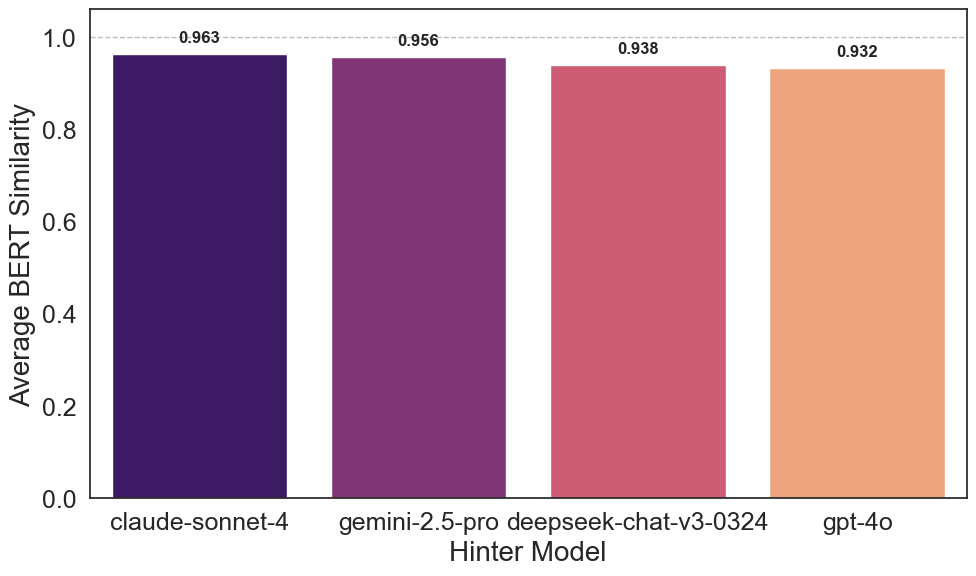

hinter_model
claude-sonnet-4          0.963389
gemini-2.5-pro           0.955930
deepseek-chat-v3-0324    0.937974
gpt-4o                   0.931863
Name: similarity, dtype: float64

BERT Similarity by Guesser Model (Guessing Accuracy):


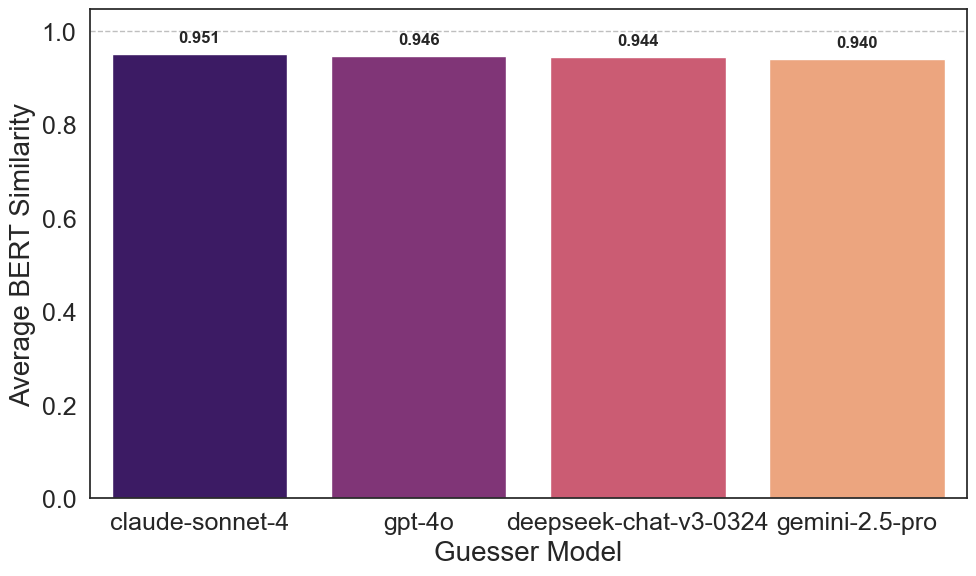

guesser_model
claude-sonnet-4          0.950986
gpt-4o                   0.946382
deepseek-chat-v3-0324    0.943748
gemini-2.5-pro           0.940235
Name: similarity, dtype: float64

Correlation Analysis: BERT Similarity vs Success Rate

Hinter Model - Similarity vs Success:
                       similarity  success
hinter_model                              
claude-sonnet-4            0.9634   0.9844
deepseek-chat-v3-0324      0.9380   0.8067
gemini-2.5-pro             0.9559   0.9523
gpt-4o                     0.9319   0.6327

Guesser Model - Similarity vs Success:
                       similarity  success
guesser_model                             
claude-sonnet-4            0.9510   0.8519
deepseek-chat-v3-0324      0.9437   0.8026
gemini-2.5-pro             0.9402   0.8513
gpt-4o                     0.9464   0.8013
‚Üí BERT similarity bar charts saved to figures/ directory


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pathlib

# ---------- Load BERT Similarity Results ----------
def load_bert_results(filepath):
    """Load BERT similarity analysis results"""
    bert_results = pd.read_csv(filepath, encoding='utf-8')
    print(f"Loaded {len(bert_results)} BERT similarity records")
    print(f"Target words: {bert_results['target'].nunique()}")
    print(f"Hinter models: {bert_results['hinter_model'].unique()}")
    print(f"Guesser models: {bert_results['guesser_model'].unique()}")
    return bert_results

# ---------- Model Name Mapping ----------
# "Full name ‚Üí Short name" mapping
label_map = {
    "openai/gpt-4o":                  "gpt-4o",
    "google/gemini-2.5-flash":        "gemini-2.5-flash", 
    "deepseek/deepseek-chat-v3-0324": "deepseek-v3",
    "moonshotai/kimi-k2":             "kimi-k2",
    "gpt-4o":                         "gpt-4o",
    "gemini-2.5-flash":               "gemini-2.5-flash",
    "deepseek-v3":                    "deepseek-v3",
    "kimi-k2":                        "kimi-k2"
}

# Set theme
sns.set_theme(style="white", font_scale=1.2)
out_dir = pathlib.Path("figures")
out_dir.mkdir(exist_ok=True)

def plot_bert_similarity_bar(df, group_key, fname, palette="magma"):
    """Plot BERT similarity by group_key and save (with short model names)"""
    similarity_mean = (
        df.groupby(group_key)["similarity"]
          .mean()
          .sort_values(ascending=False)
    )
    
    # Replace index with short names
    short_idx = similarity_mean.index.map(lambda x: label_map.get(x, x))
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=short_idx, y=similarity_mean.values,
        palette=sns.color_palette(palette, n_colors=len(similarity_mean))
    )
    
    # Set y-axis limits with some headroom
    max_val = similarity_mean.max()
    plt.ylim(0, max_val * 1.1)
    plt.axhline(1, ls="--", c="gray", lw=1, alpha=0.5)
    
    plt.ylabel("Average BERT Similarity", fontsize=20)
    plt.xlabel(f"{group_key.split('_')[0].title()} Model", fontsize=20)
    
    # Tick settings: horizontal, font size 18
    plt.xticks(rotation=0, fontsize=18)
    plt.yticks(fontsize=18)
    
    # Add value labels on bars
    for idx, val in enumerate(similarity_mean.values):
        plt.text(idx, val + max_val * 0.02, f"{val:.3f}", ha="center", va="bottom",
                 fontsize=12, weight="bold")
    
    plt.tight_layout()
    plt.savefig(out_dir / f"{fname}.pdf", bbox_inches="tight")
    plt.savefig(out_dir / f"{fname}.png", dpi=300, bbox_inches="tight")
    plt.show()
    return similarity_mean

def analyze_bert_similarity_by_models(filepath):
    """Main analysis function for BERT similarity by models"""
    # Load data
    bert_results = load_bert_results(filepath)
    
    # 1) By Hinter Model (Clue Quality Perspective)
    print("\nBERT Similarity by Hinter Model (Clue Quality):")
    similarity_hinter = plot_bert_similarity_bar(
        bert_results,
        group_key="hinter_model", 
        fname="BERT_Similarity_by_Hinter"
    )
    print(similarity_hinter)
    
    # 2) By Guesser Model (Guessing Accuracy Perspective)  
    print("\nBERT Similarity by Guesser Model (Guessing Accuracy):")
    similarity_guesser = plot_bert_similarity_bar(
        bert_results,
        group_key="guesser_model",
        fname="BERT_Similarity_by_Guesser" 
    )
    print(similarity_guesser)
    
    # 3) Combined analysis: Similarity vs Success Rate
    if 'success' in bert_results.columns:
        print("\nCorrelation Analysis: BERT Similarity vs Success Rate")
        
        # By Hinter
        hinter_combined = bert_results.groupby('hinter_model').agg({
            'similarity': 'mean',
            'success': 'mean'
        }).round(4)
        print("\nHinter Model - Similarity vs Success:")
        print(hinter_combined)
        
        # By Guesser
        guesser_combined = bert_results.groupby('guesser_model').agg({
            'similarity': 'mean', 
            'success': 'mean'
        }).round(4)
        print("\nGuesser Model - Similarity vs Success:")
        print(guesser_combined)
    
    print("‚Üí BERT similarity bar charts saved to figures/ directory")
    
    return {
        'hinter_similarity': similarity_hinter,
        'guesser_similarity': similarity_guesser
    }

# Usage
if __name__ == "__main__":
    # Replace with your BERT similarity result file path
    bert_file = "bert_multi_model_similarity_analysis.csv"
    results = analyze_bert_similarity_by_models(bert_file)


üîç Generating BERT Similarity Analysis Figures...
Loaded 8243 BERT similarity records
Overall average similarity: 0.945
Standard deviation: 0.066

Overall Statistics:
  Average similarity: 0.9%
  Standard deviation: 0.066
  Range: 0.4% - 1.0%



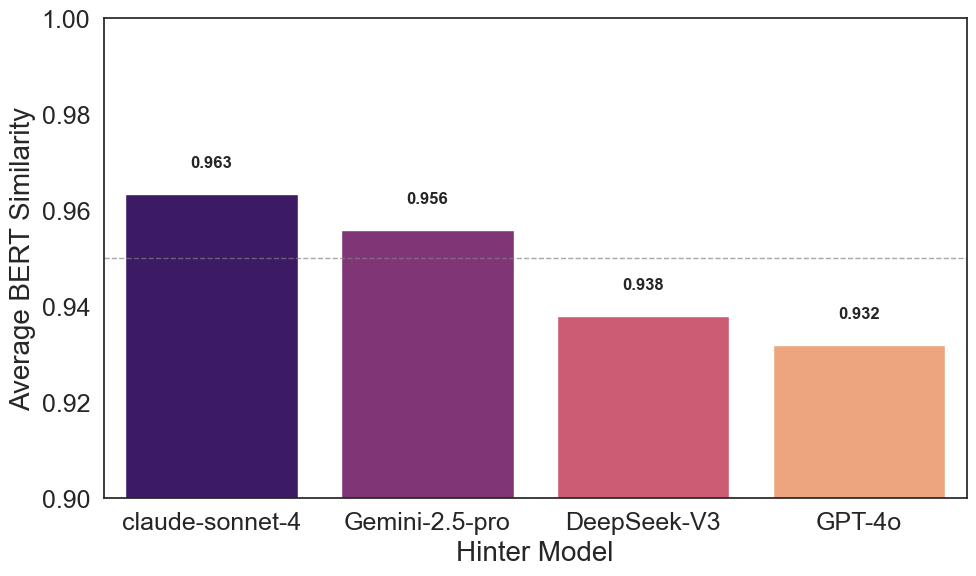

Figure 4-5: Hinter Model Average Similarity
  claude-sonnet-4: 0.963
  Gemini-2.5-pro: 0.956
  DeepSeek-V3: 0.938
  GPT-4o: 0.932



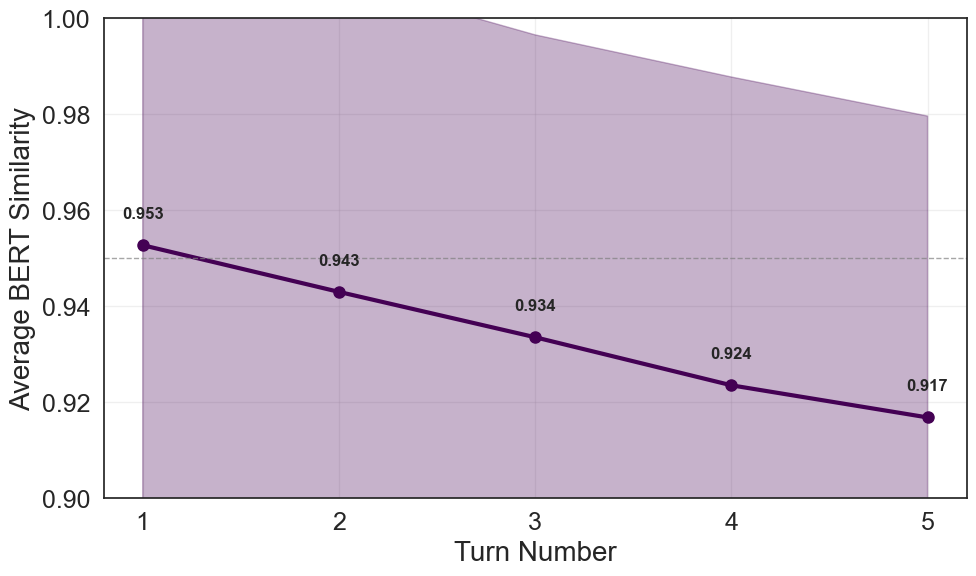

Figure 4-6: Similarity by Turn Number
  Turn 1: 0.953
  Turn 2: 0.943
  Turn 3: 0.934
  Turn 4: 0.924
  Turn 5: 0.917



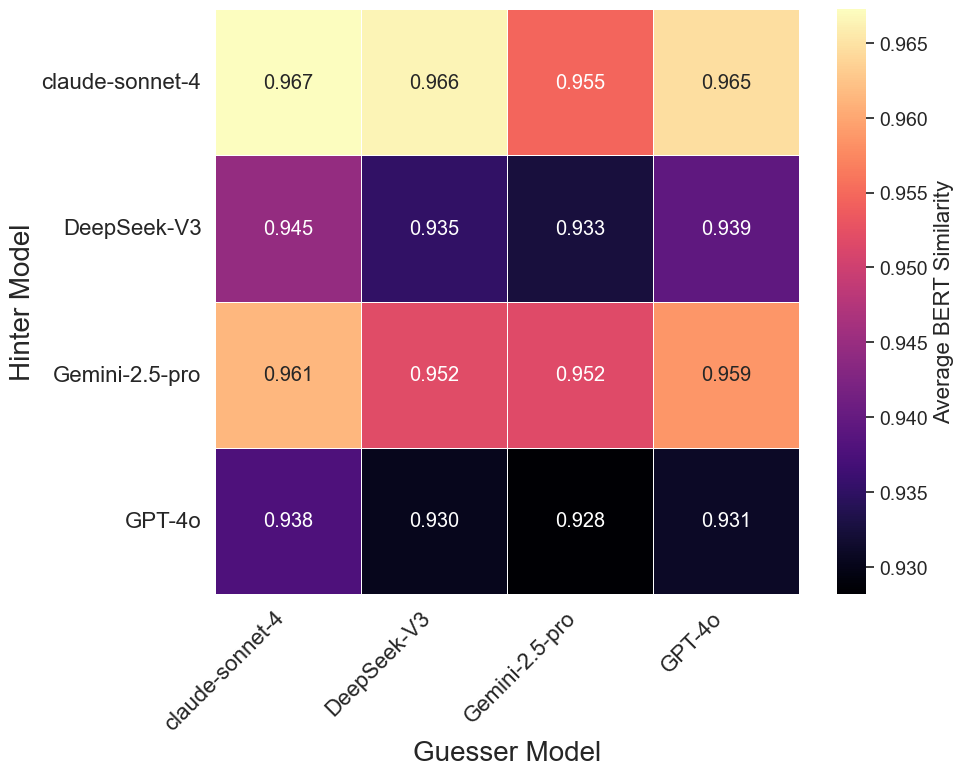

Figure 4-7: Hinter-Guesser Combination Similarity
guesser_model    claude-sonnet-4  DeepSeek-V3  Gemini-2.5-pro  GPT-4o
hinter_model                                                         
claude-sonnet-4            0.967        0.966           0.955   0.965
DeepSeek-V3                0.945        0.935           0.933   0.939
Gemini-2.5-pro             0.961        0.952           0.952   0.959
GPT-4o                     0.938        0.930           0.928   0.931

‚Üí All three figures saved to figures/ directory
  - Figure_4-5_Hinter_Similarity.pdf/png
  - Figure_4-6_Turn_Similarity.pdf/png
  - Figure_4-7_Hinter_Guesser_Heatmap.pdf/png


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pathlib

# ---------- Load BERT Similarity Results ----------
def load_bert_results(filepath):
    """Load BERT similarity analysis results"""
    bert_results = pd.read_csv(filepath, encoding='utf-8')
    print(f"Loaded {len(bert_results)} BERT similarity records")
    print(f"Overall average similarity: {bert_results['similarity'].mean():.3f}")
    print(f"Standard deviation: {bert_results['similarity'].std():.3f}")
    return bert_results

# ---------- Model Name Mapping ----------
# "Full name ‚Üí Short name" mapping
label_map = {
    "gpt-4o":                  "GPT-4o",
    "gemini-2.5-pro":        "Gemini-2.5-pro", 
    "deepseek-chat-v3-0324": "DeepSeek-V3",
    "moonshotai/kimi-k2":             "Claude-Sonnet-4",  # Based on your text description
    "gpt-4o":                         "GPT-4o",
    "gemini-2.5-flash":               "Gemini-2.5-Pro",
    "deepseek-v3":                    "DeepSeek-V3", 
    "kimi-k2":                        "Claude-Sonnet-4"
}

# Set theme
sns.set_theme(style="white", font_scale=1.2)
out_dir = pathlib.Path("figures")
out_dir.mkdir(exist_ok=True)

def plot_figure_4_5_hinter_similarity(df):
    """Figure 4-5: Average similarity by Hinter model"""
    # Calculate average similarity by hinter model
    hinter_similarity = (
        df.groupby('hinter_model')['similarity']
          .mean()
          .sort_values(ascending=False)
    )
    
    # Map to short names
    short_names = hinter_similarity.index.map(lambda x: label_map.get(x, x))
    
    plt.figure(figsize=(10, 6))
    bars = sns.barplot(
        x=short_names, y=hinter_similarity.values,
        palette=sns.color_palette("magma", n_colors=len(hinter_similarity))
    )
    
    plt.ylim(0.90, 1.0)  # Focus on the high similarity range
    plt.axhline(0.95, ls="--", c="gray", lw=1, alpha=0.7)  # Reference line
    plt.ylabel("Average BERT Similarity", fontsize=20)
    plt.xlabel("Hinter Model", fontsize=20)
    plt.xticks(rotation=0, fontsize=18)
    plt.yticks(fontsize=18)
    
    # Add value labels on bars
    for idx, val in enumerate(hinter_similarity.values):
        plt.text(idx, val + 0.005, f"{val:.3f}", ha="center", va="bottom",
                 fontsize=12, weight="bold")
    
    plt.tight_layout()
    plt.savefig(out_dir / "Figure_4-5_Hinter_Similarity.pdf", bbox_inches="tight")
    plt.savefig(out_dir / "Figure_4-5_Hinter_Similarity.png", dpi=300, bbox_inches="tight")
    plt.show()
    
    print("Figure 4-5: Hinter Model Average Similarity")
    for model, sim in zip(short_names, hinter_similarity.values):
        print(f"  {model}: {sim:.3f}")
    
    return hinter_similarity

def plot_figure_4_6_turn_similarity(df):
    """Figure 4-6: Similarity trend by turn number"""
    # Calculate average similarity by turn
    turn_similarity = (
        df.groupby('turn_number')['similarity']
          .mean()
          .sort_index()
    )
    
    plt.figure(figsize=(10, 6))
    plt.plot(turn_similarity.index, turn_similarity.values, 'o-', 
             linewidth=3, markersize=8, color='#440154')  # Dark purple from magma
    
    # Add error bars (standard deviation)
    turn_std = df.groupby('turn_number')['similarity'].std()
    plt.fill_between(turn_similarity.index, 
                     turn_similarity.values - turn_std.values,
                     turn_similarity.values + turn_std.values, 
                     alpha=0.3, color='#440154')
    
    plt.ylim(0.90, 1.0)  # Focus on the high similarity range
    plt.axhline(0.95, ls="--", c="gray", lw=1, alpha=0.7)  # Reference line
    plt.ylabel("Average BERT Similarity", fontsize=20)
    plt.xlabel("Turn Number", fontsize=20)
    plt.xticks(turn_similarity.index, fontsize=18)
    plt.yticks(fontsize=18)
    plt.grid(True, alpha=0.3)
    
    # Add value labels on points
    for turn, val in zip(turn_similarity.index, turn_similarity.values):
        plt.text(turn, val + 0.005, f"{val:.3f}", ha="center", va="bottom",
                 fontsize=12, weight="bold")
    
    plt.tight_layout()
    plt.savefig(out_dir / "Figure_4-6_Turn_Similarity.pdf", bbox_inches="tight")
    plt.savefig(out_dir / "Figure_4-6_Turn_Similarity.png", dpi=300, bbox_inches="tight")
    plt.show()
    
    print("Figure 4-6: Similarity by Turn Number")
    for turn, sim in turn_similarity.items():
        print(f"  Turn {turn}: {sim:.3f}")
    
    return turn_similarity

def plot_figure_4_7_heatmap(df):
    """Figure 4-7: Hinter-Guesser combination similarity heatmap"""
    # Calculate similarity by hinter-guesser combination
    heatmap_data = (
        df.groupby(['hinter_model', 'guesser_model'])['similarity']
          .mean()
          .unstack()
    )
    
    # Map to short names
    heatmap_data.index = heatmap_data.index.map(lambda x: label_map.get(x, x))
    heatmap_data.columns = heatmap_data.columns.map(lambda x: label_map.get(x, x))
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, 
                annot=True, 
                fmt='.3f', 
                cmap='magma',
                cbar_kws={'label': 'Average BERT Similarity'},
                square=True,
                linewidths=0.5)
    
    plt.ylabel("Hinter Model", fontsize=20)
    plt.xlabel("Guesser Model", fontsize=20)
    plt.xticks(fontsize=16, rotation=45, ha='right')
    plt.yticks(fontsize=16, rotation=0)
    
    # Adjust colorbar
    cbar = plt.gca().collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.set_label('Average BERT Similarity', fontsize=16)
    
    plt.tight_layout()
    plt.savefig(out_dir / "Figure_4-7_Hinter_Guesser_Heatmap.pdf", bbox_inches="tight")
    plt.savefig(out_dir / "Figure_4-7_Hinter_Guesser_Heatmap.png", dpi=300, bbox_inches="tight")
    plt.show()
    
    print("Figure 4-7: Hinter-Guesser Combination Similarity")
    print(heatmap_data.round(3))
    
    return heatmap_data

def generate_bert_analysis_figures(filepath):
    """Generate all three BERT analysis figures"""
    print("üîç Generating BERT Similarity Analysis Figures...")
    
    # Load data
    bert_results = load_bert_results(filepath)
    
    # Convert similarity to percentage scale (0-1 to 0-100) if needed
    if bert_results['similarity'].max() <= 1.0:
        print("Converting similarity to percentage scale...")
        bert_results['similarity'] = bert_results['similarity'] * 100
    
    print(f"\nOverall Statistics:")
    print(f"  Average similarity: {bert_results['similarity'].mean():.1f}%")
    print(f"  Standard deviation: {bert_results['similarity'].std():.3f}")
    print(f"  Range: {bert_results['similarity'].min():.1f}% - {bert_results['similarity'].max():.1f}%")
    
    # Generate Figure 4-5: Hinter Model Similarity
    print("\n" + "="*50)
    hinter_sim = plot_figure_4_5_hinter_similarity(bert_results)
    
    # Generate Figure 4-6: Turn-wise Similarity
    print("\n" + "="*50)
    turn_sim = plot_figure_4_6_turn_similarity(bert_results)
    
    # Generate Figure 4-7: Hinter-Guesser Heatmap
    print("\n" + "="*50)
    heatmap_data = plot_figure_4_7_heatmap(bert_results)
    
    print("\n" + "="*50)
    print("‚Üí All three figures saved to figures/ directory")
    print("  - Figure_4-5_Hinter_Similarity.pdf/png")
    print("  - Figure_4-6_Turn_Similarity.pdf/png") 
    print("  - Figure_4-7_Hinter_Guesser_Heatmap.pdf/png")
    
    return {
        'hinter_similarity': hinter_sim,
        'turn_similarity': turn_sim,
        'heatmap_data': heatmap_data
    }

# Usage
if __name__ == "__main__":
    # Replace with your BERT similarity result file path
    bert_file = "bert_multi_model_similarity_analysis.csv"
    results = generate_bert_analysis_figures(bert_file)
